# Sparkling
For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [1]:
##
##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
##
## lets bring in the dataset

from google.colab import files
uploaded = files.upload()

Saving Sparkling.csv to Sparkling.csv


## 1) Lets read the raw data as a univariate time series dataframe and plot it.

In [3]:
##
## lets read the file using pandas

spark1 = pd.read_csv('Sparkling.csv', parse_dates = True, index_col = 0)
spark1.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [4]:
##
##

spark1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [5]:
##
##

spark1.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

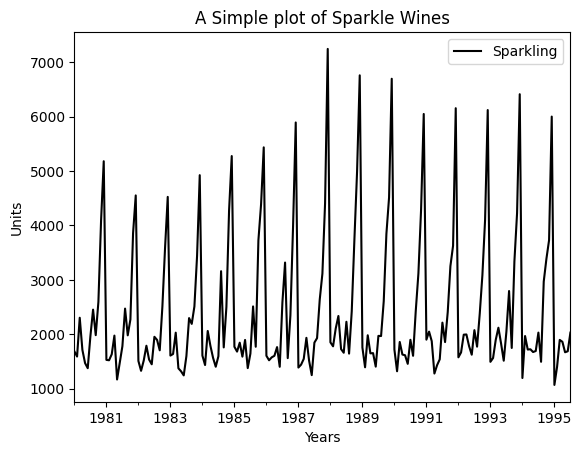

In [6]:
##
## Lets do a simple plot


spark1.plot(color = 'black')
plt.title("A Simple plot of Sparkle Wines")
plt.ylabel('Units')
plt.xlabel('Years')
plt.show()

## 2) EDA and Decomposition

- The data starts from January 1980, this seems to be a monthly seris.
- The data ends July 1995, so 15 years and 7 months(187 instances)
- Data does not have any null values
- We do have some duplicates in the parameter - sparkling.
- There seems to be no trend or very slight upward trend within the date ranges, but we do have seasonality.
- There also seems to be some minor spikes or two peaks before 1985 and 1987.
- Broadly, years before 1988 we can see some false peaks while post 1988 it is quite stable.

In [7]:
##
##

spark1.head()


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [8]:
##
##

spark1.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [9]:
##
##

spark1.isnull().sum()

Sparkling    0
dtype: int64

In [10]:
##
##

spark1[spark1.duplicated()]

Sparkling
YearMonth            
1984-01-01       1609
1985-09-01       1771
1986-02-01       1523
1987-05-01       1518
1988-08-01       1645
1990-08-01       1605
1992-01-01       1577
1994-02-01       1968
1994-03-01       1720
1995-03-01       1897
1995-07-01       2031

In [11]:
##
##

spark1.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [12]:
##
##

print(spark1[spark1.index.month == 1].mean())
print(spark1[spark1.index.month == 12].mean())

Sparkling    1580.0
dtype: float64
Sparkling    5813.133333
dtype: float64


In [13]:
##
##

print(spark1[spark1.index.month == 12])

            Sparkling
YearMonth            
1980-12-01       5179
1981-12-01       4551
1982-12-01       4524
1983-12-01       4923
1984-12-01       5274
1985-12-01       5434
1986-12-01       5891
1987-12-01       7242
1988-12-01       6757
1989-12-01       6694
1990-12-01       6047
1991-12-01       6153
1992-12-01       6119
1993-12-01       6410
1994-12-01       5999


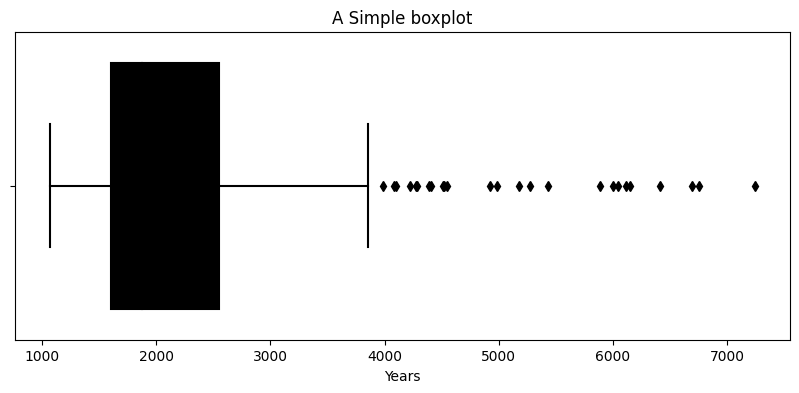

In [14]:
##
## a normal boxplot

fig, ax = plt.subplots(figsize = (10, 4))
sns.boxplot(data = spark1, x = spark1['Sparkling'], color = 'black', ax = ax)
plt.title('A Simple boxplot')
plt.xlabel('Years')
plt.show()

## from the boxplot we can see that we have some outliers in the data.
## The mean is at less than 2000 units.
## Most of the values fall between 1000 and 4000.

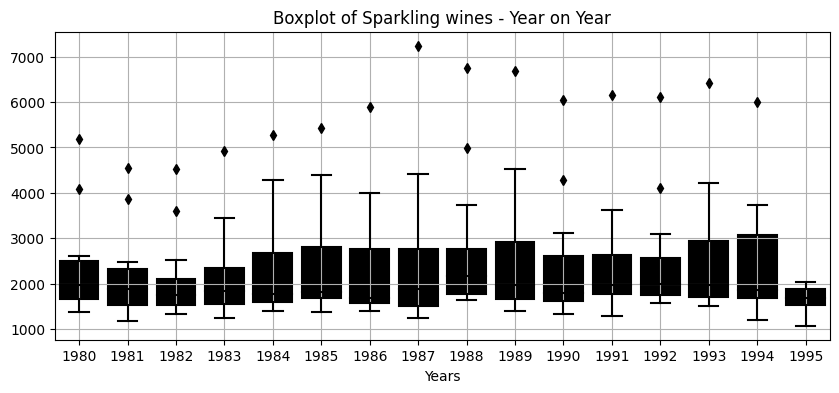

In [15]:
##
## Lets create a boxplot - year on year

fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x = spark1.index.year,y = spark1.values[:,0],ax=ax, color = 'black')
plt.title('Boxplot of Sparkling wines - Year on Year')
plt.xlabel('Years')
plt.grid()
plt.show();


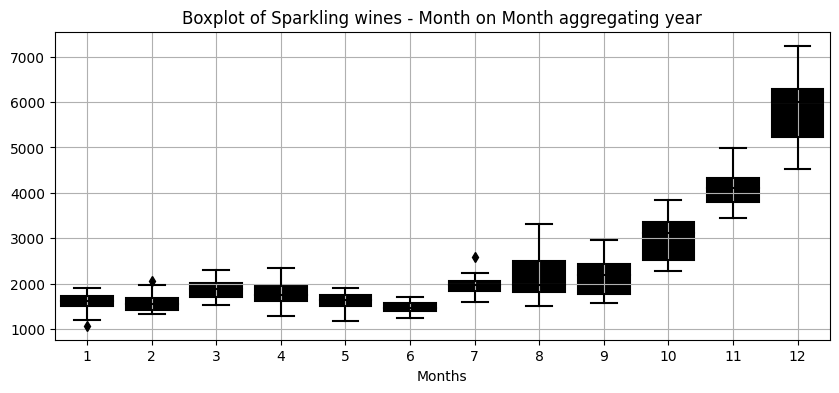

In [16]:
##
## Lets create a boxplot - Month on Month aggregating year

fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x = spark1.index.month,y = spark1.values[:,0],ax=ax, color = 'black')
plt.title('Boxplot of Sparkling wines - Month on Month aggregating year')
plt.xlabel('Months')
plt.grid()
plt.show();

## We do have some outliers in the montsh January, Februaru nad July
## The month of december is way ahead of everyone in terms of sales
## Months Janaury and June are at the bottom, very minor difference between them



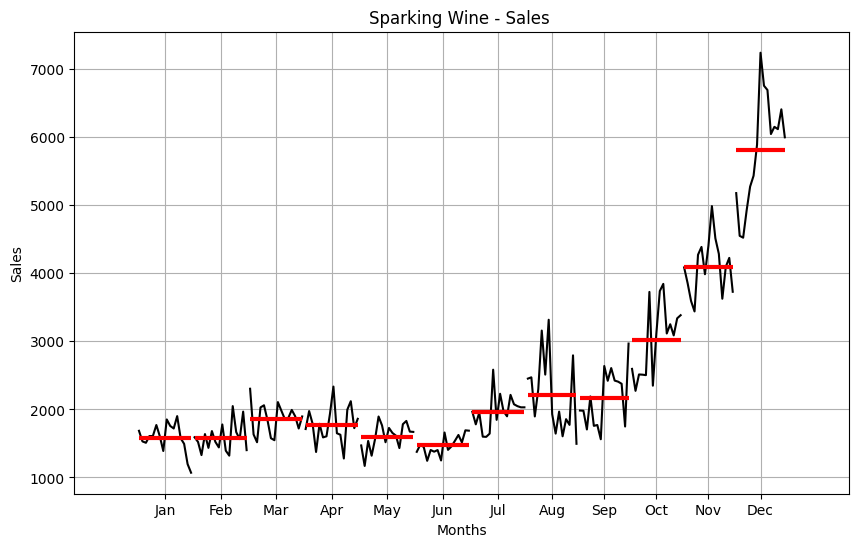

In [17]:
##
##

from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize = (10, 6))

month_plot(spark1, ylabel = 'Sales', ax = ax)
plt.grid()
plt.title("Sparking Wine - Sales ")
plt.xlabel('Months')
plt.show()


## this plot shows a lot of information, but confirms that as we near holiday season the sales increase drastically *_*
## Dont forget to calculate the percentgae difference in sales
## we also see the most variation in the month of december, arund 2000 units of variance.
## From january to June, the sales are more or less constant. from July it picks up a growth trend *_*
## we have to keep in mind that this is seasonality is done for each year.
## the months from august to december we see a lot of variance.

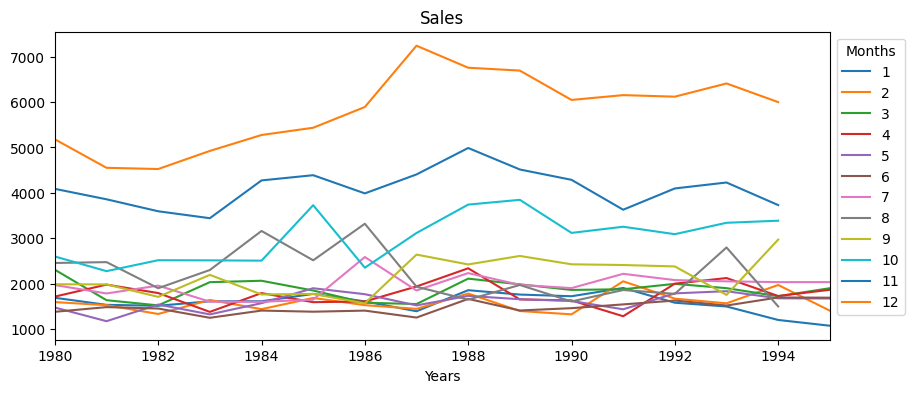

In [18]:
##
## lets create a pivot table and then plot it

MOM_sales = pd.pivot_table(spark1, values = 'Sparkling', columns = spark1.index.month, index = spark1.index.year)

fig, ax = plt.subplots(figsize = (10, 4))
MOM_sales.plot(ax = ax)
plt.title("Sales")
plt.xlim(1980, 1995)
plt.xlabel("Years")
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1), title = 'Months')
plt.show()


## this is mirroring the month plot we had above, but we can see the variations more clearly.
## it is important to note that for certains months we have only data uptil 1994. hence the gap in some of the values.

In [19]:
##
## lets decompose the dataset on both additive and multiplicative models

from statsmodels.tsa.seasonal import seasonal_decompose


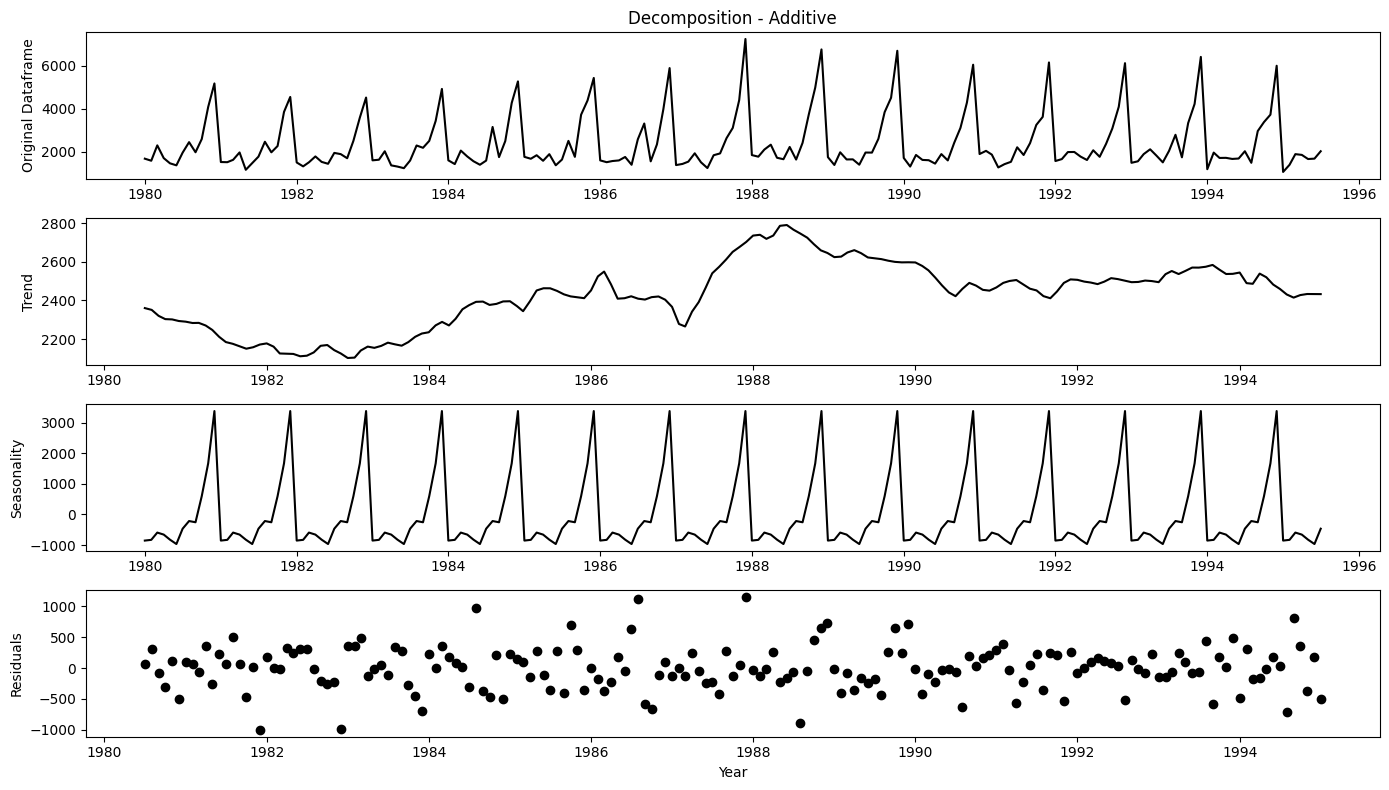

In [20]:
##
## Additive Decomposition

add_decompose = seasonal_decompose(spark1, model = 'additive')
add_decompose_residuals = add_decompose.resid.dropna()

plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(spark1['Sparkling'], color = 'black')
plt.title("Decomposition - Additive")
plt.ylabel('Original Dataframe')

plt.subplot(412)
plt.plot(add_decompose.trend, color = 'black')
plt.ylabel('Trend')

plt.subplot(413)
plt.plot(add_decompose.seasonal, color = 'black')
plt.ylabel('Seasonality')

plt.subplot(414)
plt.scatter(add_decompose_residuals.index, add_decompose_residuals, color='black')
plt.xlabel('Year')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

## The residuals are somewhat scattered but we can also slightly see a pattern.
## Seasonality is consitent to we have seen, but the variance in the values is quite high and hence we have seasonality dominating over trend
## Trend shows a slight gradual increase, but also a gradual decrease, Trend is not actively present.

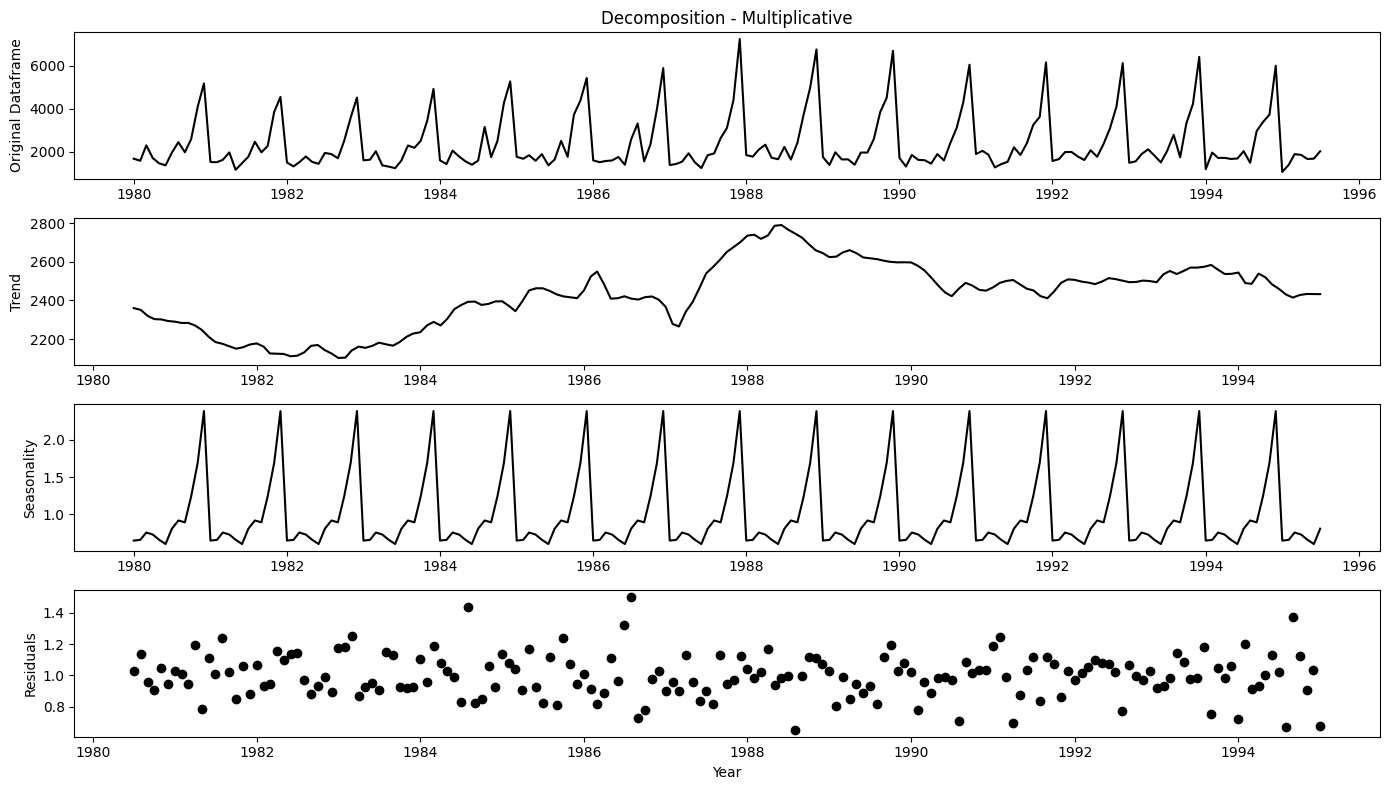

In [21]:
##
## Multiplicative Decomposition

mul_decompose = seasonal_decompose(spark1, model = 'multiplicative')
mul_decompose_residuals = mul_decompose.resid.dropna()

# Plotting the decomposed components for both additive and multiplicative models
plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(spark1['Sparkling'], color = 'black')
plt.title('Decomposition - Multiplicative')
plt.ylabel('Original Dataframe')

plt.subplot(412)
plt.plot(mul_decompose.trend, color = 'black')
plt.ylabel('Trend')

plt.subplot(413)
plt.plot(mul_decompose.seasonal, color = 'black')
plt.ylabel('Seasonality')

plt.subplot(414)
plt.scatter(mul_decompose_residuals.index, mul_decompose_residuals, color='black')
plt.xlabel('Year')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


## the residual points are somewhat in a line showing a pattern.

## 3) Split the data into training and test. The test data should start in 1991

In [22]:
##
## lets split the data into test and training dataframes

spark1_train = spark1[spark1.index < '1991']
spark1_test = spark1[spark1.index >= '1991']

print(spark1_train.head())
print(spark1_test.head())

            Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
            Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432


In [23]:
##
##

print(spark1_train.tail())
print(spark1_test.head())

            Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047
            Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432


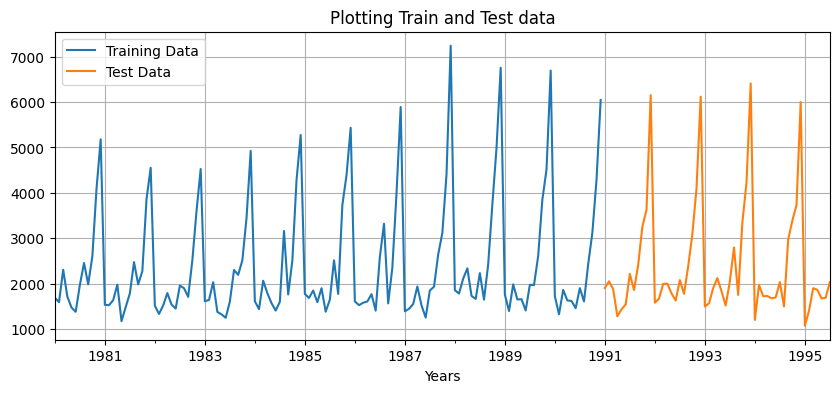

In [24]:
##
## lets plot the train and test dataset

spark1_train['Sparkling'].plot(figsize = (10, 4), fontsize = 10)
spark1_test['Sparkling'].plot(figsize = (10, 4), fontsize = 10)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.xlabel('Years')
plt.title('Plotting Train and Test data')
plt.show()



In [25]:
##
##

print(spark1_train.shape)
print(spark1_test.shape)


(132, 1)
(55, 1)


## 4) Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Model 1) Linear Regression

In [26]:
##
## lets use regression on the sparling wines sales values and see how the model performs


train_index = [i+1 for i in range(len(spark1_train))]
test_index = [i+133 for i in range(len(spark1_test))]

print('Train_index', '\n', train_index)
print('Test_index', '\n', test_index)


Train_index 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test_index 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [27]:
##
## Lets create a separate copy for Linear Regression train and test

LR_train = spark1_train.copy()
LR_test = spark1_test.copy()



In [28]:
##
## Lets add the new time index to train and test

LR_train['Time_index'] = train_index
LR_test['Time_index'] = test_index

print(LR_train.tail())
print(LR_test.head())


            Sparkling  Time_index
YearMonth                        
1990-08-01       1605         128
1990-09-01       2424         129
1990-10-01       3116         130
1990-11-01       4286         131
1990-12-01       6047         132
            Sparkling  Time_index
YearMonth                        
1991-01-01       1902         133
1991-02-01       2049         134
1991-03-01       1874         135
1991-04-01       1279         136
1991-05-01       1432         137


In [29]:
##
## Lets build the linear regression model


from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(LR_train[['Time_index']], LR_train['Sparkling'].values)

LinearRegression()

In [30]:
##
## Now lets predict the test values

LR_pred = linreg.predict(LR_test[['Time_index']])

LR_test['Predictions'] = LR_pred


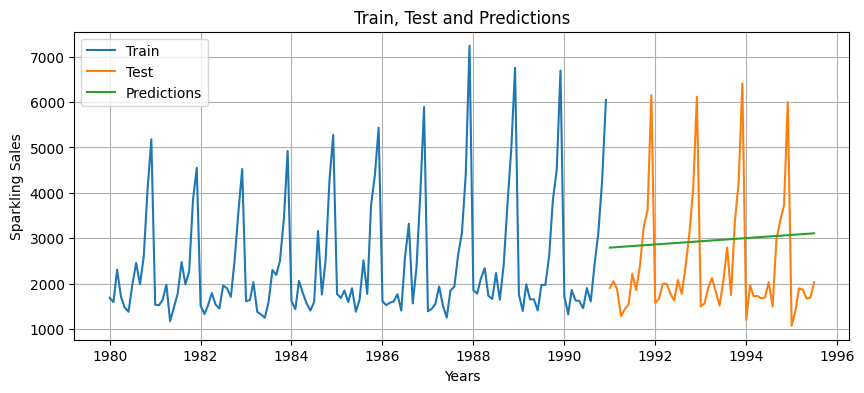

In [31]:
##
## Lets now plot the dataset

plt.figure(figsize = (10, 4))
plt.plot(spark1_train['Sparkling'], label = 'Train')
plt.plot(spark1_test['Sparkling'], label = 'Test')
plt.plot(LR_test['Predictions'], label = 'Predictions')
plt.title("Train, Test and Predictions")
plt.grid()
plt.xlabel('Years')
plt.ylabel('Sparkling Sales')
plt.legend(loc = 'best')
plt.show()

In [32]:
##
## lets evalueate the model

from sklearn import metrics

## Test data root mean square error

rmse_linreg_test = metrics.mean_squared_error(spark1_test['Sparkling'], LR_test['Predictions'],
                                              squared = False).round(3)

print('Linear Regression RMSE = ', rmse_linreg_test)



Linear Regression RMSE =  1389.135


In [33]:
##
## Now lets create a new DF having Description and RMSE values

Results = pd.DataFrame({'Model': 'Linear Regression', 'Root Mean Square Error': [rmse_linreg_test]})
Results.head()

Model  Root Mean Square Error
0  Linear Regression                1389.135

### Model 2) Moving Average

In [34]:
##
## For starters we have to average the entire data
## hence copying the dataframe as a whole

momean_spark1 = spark1.copy()
momean_spark1.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [35]:
##
## Now lets start to trail the dataframe by 2, 4, 6, 9, 12, 15

momean_spark1['Trail_2'] = momean_spark1['Sparkling'].rolling(2).mean()
momean_spark1['Trail_4'] = momean_spark1['Sparkling'].rolling(4).mean()
momean_spark1['Trail_6'] = momean_spark1['Sparkling'].rolling(6).mean()
momean_spark1['Trail_9'] = momean_spark1['Sparkling'].rolling(9).mean()
momean_spark1['Trail_12'] = momean_spark1['Sparkling'].rolling(12).mean()
momean_spark1['Trail_15'] = momean_spark1['Sparkling'].rolling(15).mean()

momean_spark1.head()

Sparkling  Trail_2  Trail_4  Trail_6  Trail_9  Trail_12  Trail_15
YearMonth                                                                    
1980-01-01       1686      NaN      NaN      NaN      NaN       NaN       NaN
1980-02-01       1591   1638.5      NaN      NaN      NaN       NaN       NaN
1980-03-01       2304   1947.5      NaN      NaN      NaN       NaN       NaN
1980-04-01       1712   2008.0  1823.25      NaN      NaN       NaN       NaN
1980-05-01       1471   1591.5  1769.50      NaN      NaN       NaN       NaN

In [36]:
##
##

momean_spark1.head(20)

Sparkling  Trail_2  Trail_4      Trail_6      Trail_9  \
YearMonth                                                           
1980-01-01       1686      NaN      NaN          NaN          NaN   
1980-02-01       1591   1638.5      NaN          NaN          NaN   
1980-03-01       2304   1947.5      NaN          NaN          NaN   
1980-04-01       1712   2008.0  1823.25          NaN          NaN   
1980-05-01       1471   1591.5  1769.50          NaN          NaN   
1980-06-01       1377   1424.0  1716.00  1690.166667          NaN   
1980-07-01       1966   1671.5  1631.50  1736.833333          NaN   
1980-08-01       2453   2209.5  1816.75  1880.500000          NaN   
1980-09-01       1984   2218.5  1945.00  1827.166667  1838.222222   
1980-10-01       2596   2290.0  2249.75  1974.500000  1939.333333   
1980-11-01       4087   3341.5  2780.00  2410.500000  2216.666667   
1980-12-01       5179   4633.0  3461.50  3044.166667  2536.111111   
1981-01-01       1530   3354.5  3348.00  2971.500000  2515.888889   
1981-02-01       1523   1526.5  3079.75  2816.500000  2521.666667   
1981-03-01       1633   1578.0  2466.25  2758.000000  2550.111111   
1981-04-01       1976   1804.5  1665.50  2654.666667  2551.222222   
1981-05-01       1170   1573.0  1575.50  2168.500000  2408.666667   
1981-06-01       1480   1325.0  1564.75  1552.000000  2352.666667   
1981-07-01       1781   1630.5  1601.75  1593.833333  2262.111111   
1981-08-01       2472   2126.5  1725.75  1752.000000  2082.666667   

               Trail_12     Trail_15  
YearMonth                             
1980-01-01          NaN          NaN  
1980-02-01          NaN          NaN  
1980-03-01          NaN          NaN  
1980-04-01          NaN          NaN  
1980-05-01          NaN          NaN  
1980-06-01          NaN          NaN  
1980-07-01          NaN          NaN  
1980-08-01          NaN          NaN  
1980-09-01          NaN          NaN  
1980-10-01          NaN          NaN  
1980-11-01          NaN          NaN  
1980-12-01  2367.166667          NaN  
1981-01-01  2354.166667          NaN  
1981-02-01  2348.500000          NaN  
1981-03-01  2292.583333  2206.133333  
1981-04-01  2314.583333  2225.466667  
1981-05-01  2289.500000  2197.400000  
1981-06-01  2298.083333  2142.466667  
1981-07-01  2282.666667  2147.066667  
1981-08-01  2284.250000  2213.800000

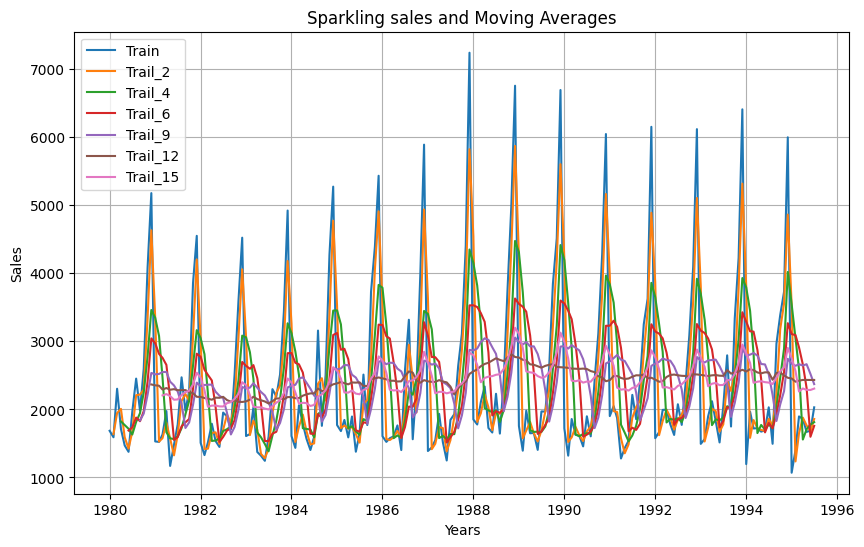

In [37]:
##
## lets do a plot


plt.figure(figsize = (10, 6))
plt.plot(momean_spark1['Sparkling'], label = 'Train')
plt.plot(momean_spark1['Trail_2'], label = 'Trail_2')
plt.plot(momean_spark1['Trail_4'], label = 'Trail_4')
plt.plot(momean_spark1['Trail_6'], label = 'Trail_6')
plt.plot(momean_spark1['Trail_9'], label = 'Trail_9')
plt.plot(momean_spark1['Trail_12'], label = 'Trail_12')
plt.plot(momean_spark1['Trail_15'], label = 'Trail_15')

plt.legend(loc = 'best')
plt.grid()
plt.title('Sparkling sales and Moving Averages')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

In [38]:
##
## Now lets prepare the train and test dataframes

momean_spark1_train = momean_spark1[momean_spark1.index < '1991']
momean_spark1_test = momean_spark1[momean_spark1.index >= '1991']

print(momean_spark1_train.shape)
print(momean_spark1_test.shape)

(132, 7)
(55, 7)


In [39]:
##
##

print(momean_spark1_train.tail())
print(momean_spark1_test.head())

            Sparkling  Trail_2  Trail_4      Trail_6      Trail_9  \
YearMonth                                                           
1990-08-01       1605   1752.0  1644.00  1677.166667  2199.777778   
1990-09-01       2424   2014.5  1846.25  1771.333333  1725.333333   
1990-10-01       3116   2770.0  2261.00  2019.333333  1880.444444   
1990-11-01       4286   3701.0  2857.75  2464.500000  2209.888889   
1990-12-01       6047   5166.5  3968.25  3229.500000  2675.222222   

               Trail_12     Trail_15  
YearMonth                             
1990-08-01  2563.750000  2407.333333  
1990-09-01  2548.416667  2475.200000  
1990-10-01  2487.666667  2551.533333  
1990-11-01  2468.666667  2706.066667  
1990-12-01  2414.750000  2935.333333  
            Sparkling  Trail_2  Trail_4      Trail_6      Trail_9  \
YearMonth                                                           
1991-01-01       1902   3974.5  3837.75  3230.000000  2705.666667   
1991-02-01       2049   1975.5  3571

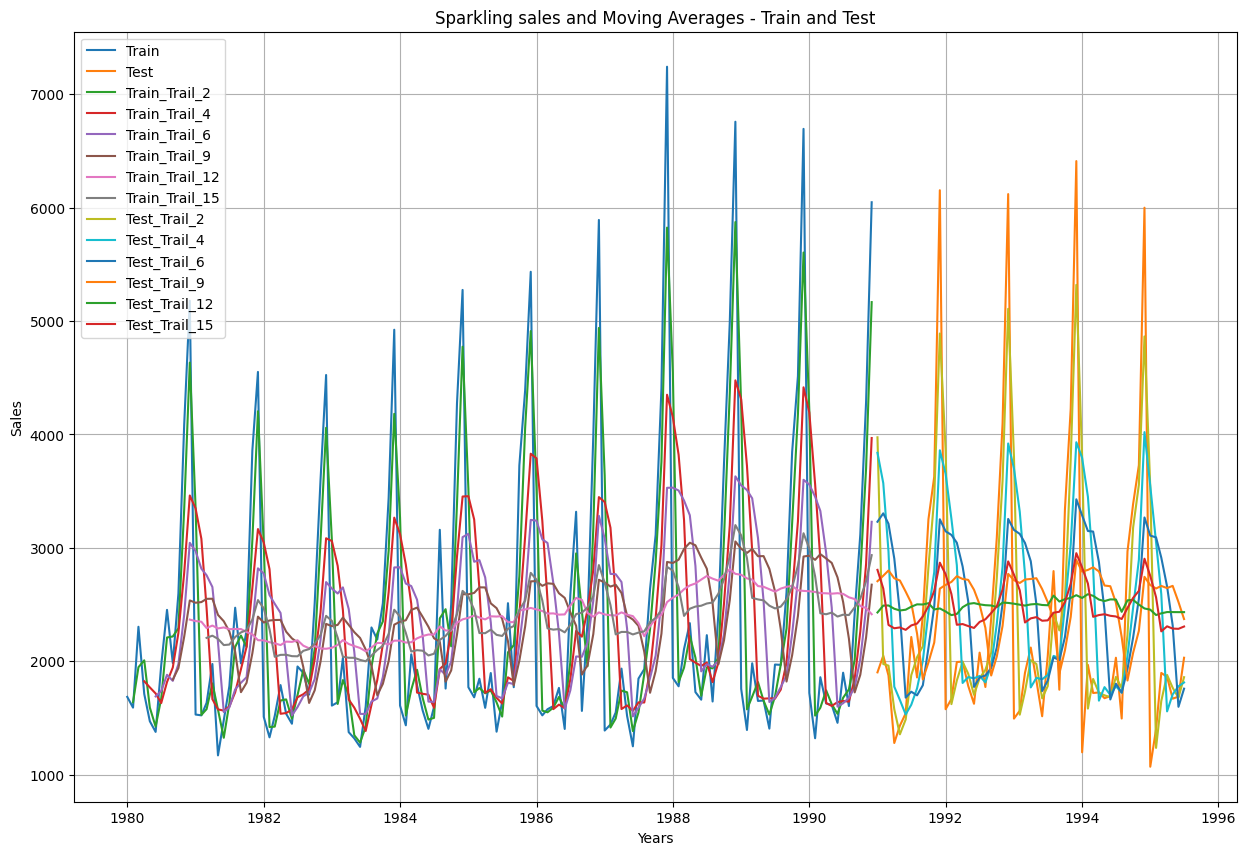

In [40]:
##
## now lets plot the test and train data


plt.figure(figsize = (15, 10))
plt.plot(momean_spark1_train['Sparkling'], label = 'Train')
plt.plot(momean_spark1_test['Sparkling'], label = 'Test')

plt.plot(momean_spark1_train['Trail_2'], label = 'Train_Trail_2')
plt.plot(momean_spark1_train['Trail_4'], label = 'Train_Trail_4')
plt.plot(momean_spark1_train['Trail_6'], label = 'Train_Trail_6')
plt.plot(momean_spark1_train['Trail_9'], label = 'Train_Trail_9')
plt.plot(momean_spark1_train['Trail_12'], label = 'Train_Trail_12')
plt.plot(momean_spark1_train['Trail_15'], label = 'Train_Trail_15')

plt.plot(momean_spark1_test['Trail_2'], label = 'Test_Trail_2')
plt.plot(momean_spark1_test['Trail_4'], label = 'Test_Trail_4')
plt.plot(momean_spark1_test['Trail_6'], label = 'Test_Trail_6')
plt.plot(momean_spark1_test['Trail_9'], label = 'Test_Trail_9')
plt.plot(momean_spark1_test['Trail_12'], label = 'Test_Trail_12')
plt.plot(momean_spark1_test['Trail_15'], label = 'Test_Trail_15')

plt.legend(loc = 'best')
plt.grid()
plt.title('Sparkling sales and Moving Averages - Train and Test')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

In [41]:
##
## now that we have the predictions lets see how they fare up
## lets focus on MAPE

## Mape for trail 2
mape_momean_spark1_trail_2 = np.mean(np.abs((momean_spark1_test['Sparkling'] - momean_spark1_test['Trail_2']) / momean_spark1_test['Sparkling'])) * 100
print("MAPE for Trail 2 is :", mape_momean_spark1_trail_2)

## Mape for trail 4
mape_momean_spark1_trail_4 = np.mean(np.abs((momean_spark1_test['Sparkling'] - momean_spark1_test['Trail_4']) / momean_spark1_test['Sparkling'])) * 100
print("MAPE for Trail 4 is :", mape_momean_spark1_trail_4)

## Mape for trail 6
mape_momean_spark1_trail_6 = np.mean(np.abs((momean_spark1_test['Sparkling'] - momean_spark1_test['Trail_6']) / momean_spark1_test['Sparkling'])) * 100
print("MAPE for Trail 6 is :", mape_momean_spark1_trail_6)

## Mape for trail 9
mape_momean_spark1_trail_9 = np.mean(np.abs((momean_spark1_test['Sparkling'] - momean_spark1_test['Trail_9']) / momean_spark1_test['Sparkling'])) * 100
print("MAPE for Trail 9 is :", mape_momean_spark1_trail_9)

## Mape for trail 12
mape_momean_spark1_trail_12 = np.mean(np.abs((momean_spark1_test['Sparkling'] - momean_spark1_test['Trail_12']) / momean_spark1_test['Sparkling'])) * 100
print("MAPE for Trail 12 is :", mape_momean_spark1_trail_12)

## Mape for trail 15
mape_momean_spark1_trail_15 = np.mean(np.abs((momean_spark1_test['Sparkling'] - momean_spark1_test['Trail_15']) / momean_spark1_test['Sparkling'])) * 100
print("MAPE for Trail 15 is :", mape_momean_spark1_trail_15)


MAPE for Trail 2 is : 24.711353839319024
MAPE for Trail 4 is : 41.08365171108757
MAPE for Trail 6 is : 48.40037563823118
MAPE for Trail 9 is : 50.071571402167734
MAPE for Trail 12 is : 41.84174593908897
MAPE for Trail 15 is : 39.590729747265236


In [42]:
##
## now lets find the root mean square error


## RMSE for trail 2
rmse_momean_spark1_trail_2 = metrics.mean_squared_error(momean_spark1_test['Sparkling'], momean_spark1_test['Trail_2'],
                                              squared = False).round(3)
print('Root mean square error for trail 2', rmse_momean_spark1_trail_2)

## RMSE for trail 4
rmse_momean_spark1_trail_4 = metrics.mean_squared_error(momean_spark1_test['Sparkling'], momean_spark1_test['Trail_4'],
                                              squared = False).round(3)
print('Root mean square error for trail 4', rmse_momean_spark1_trail_4)

## RMSE for trail 6
rmse_momean_spark1_trail_6 = metrics.mean_squared_error(momean_spark1_test['Sparkling'], momean_spark1_test['Trail_6'],
                                              squared = False).round(3)
print('Root mean square error for trail 6', rmse_momean_spark1_trail_6)

## RMSE for trail 9
rmse_momean_spark1_trail_9 = metrics.mean_squared_error(momean_spark1_test['Sparkling'], momean_spark1_test['Trail_9'],
                                              squared = False).round(3)
print('Root mean square error for trail 9', rmse_momean_spark1_trail_9)

## RMSE for trail 12
rmse_momean_spark1_trail_12 = metrics.mean_squared_error(momean_spark1_test['Sparkling'], momean_spark1_test['Trail_12'],
                                              squared = False).round(3)
print('Root mean square error for trail 12', rmse_momean_spark1_trail_12)

## RMSE for trail 15
rmse_momean_spark1_trail_15 = metrics.mean_squared_error(momean_spark1_test['Sparkling'], momean_spark1_test['Trail_15'],
                                              squared = False).round(3)
print('Root mean square error for trail 15', rmse_momean_spark1_trail_15)


## surprisingly 15 is better than 6, 9, and 12

Root mean square error for trail 2 813.401
Root mean square error for trail 4 1156.59
Root mean square error for trail 6 1283.927
Root mean square error for trail 9 1346.278
Root mean square error for trail 12 1267.925
Root mean square error for trail 15 1173.813


In [43]:
##
## Results dataframe

Results_momean = pd.DataFrame({'Model': ['Moving_Average_Trailing_by_2_points',
                                         'Moving_Average_Trailing_by_4_points',
                                         'Moving_Average_Trailing_by_6_points',
                                         'Moving_Average_Trailing_by_9_points',
                                         'Moving_Average_Trailing_by_12_points',
                                         'Moving_Average_Trailing_by_15_points'],
                               'Root Mean Square Error': [rmse_momean_spark1_trail_2,
                                                          rmse_momean_spark1_trail_4,
                                                          rmse_momean_spark1_trail_6,
                                                          rmse_momean_spark1_trail_9,
                                                          rmse_momean_spark1_trail_12,
                                                          rmse_momean_spark1_trail_15]})
Results_momean.head()

Model  Root Mean Square Error
0   Moving_Average_Trailing_by_2_points                 813.401
1   Moving_Average_Trailing_by_4_points                1156.590
2   Moving_Average_Trailing_by_6_points                1283.927
3   Moving_Average_Trailing_by_9_points                1346.278
4  Moving_Average_Trailing_by_12_points                1267.925

In [44]:
##
## Lets add the values to the original results dataframe

Results = pd.concat([Results, Results_momean])
Results.head()

Model  Root Mean Square Error
0                    Linear Regression                1389.135
0  Moving_Average_Trailing_by_2_points                 813.401
1  Moving_Average_Trailing_by_4_points                1156.590
2  Moving_Average_Trailing_by_6_points                1283.927
3  Moving_Average_Trailing_by_9_points                1346.278

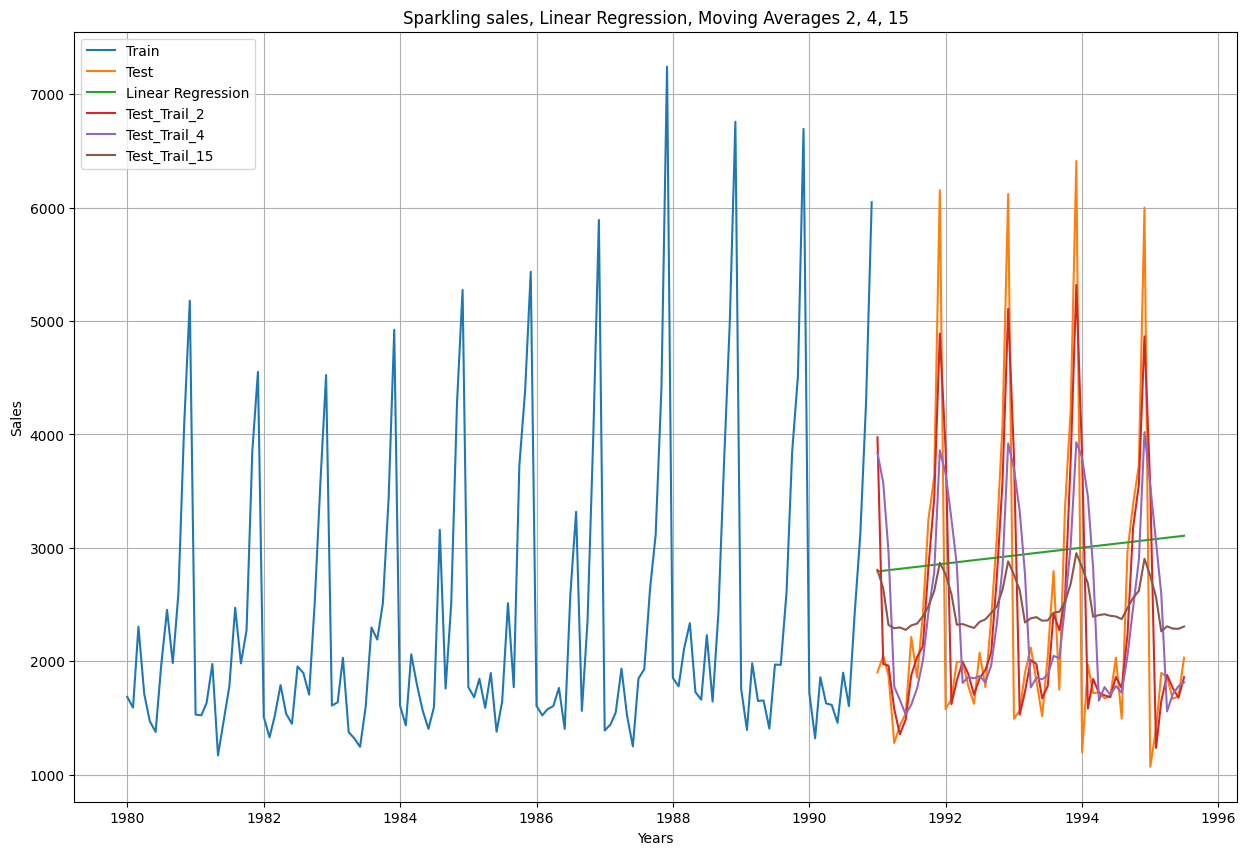

In [45]:
##
## before going lets just plot train, test, linreg, trail 2, 4 and 15
## infer the model below


plt.figure(figsize = (15, 10))
plt.plot(spark1_train['Sparkling'], label = 'Train')
plt.plot(spark1_test['Sparkling'], label = 'Test')

plt.plot(LR_test['Predictions'], label = 'Linear Regression')
plt.plot(momean_spark1_test['Trail_2'], label = 'Test_Trail_2')
plt.plot(momean_spark1_test['Trail_4'], label = 'Test_Trail_4')
plt.plot(momean_spark1_test['Trail_15'], label = 'Test_Trail_15')

plt.legend(loc = 'best')
plt.grid()
plt.title('Sparkling sales, Linear Regression, Moving Averages 2, 4, 15')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()




### Model 3) Simple Exponential Smoothing



In [46]:
##
## lets import the package

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


In [47]:
##
## Copy the train and test dataframes

SES_spark1_train = spark1_train.copy()
SES_spark1_test = spark1_test.copy()

print(SES_spark1_train.shape)
print(SES_spark1_test.shape)

(132, 1)
(55, 1)


In [48]:
##
##

print(SES_spark1_train.tail())
print(SES_spark1_test.head())

            Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047
            Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432


In [49]:
##
## Lets instantiate the model and see how the model performs

SES = SimpleExpSmoothing(SES_spark1_train['Sparkling'])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [50]:
##
##

SES_Autofit = SES.fit(optimized = True)


In [51]:
##
## Now lets see the parameters

SES_Autofit.params


## Our level is below 0.0

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
##
## lets predict

SES_spark1_test['Predictions'] = SES_Autofit.forecast(steps = len(SES_spark1_test))
SES_spark1_test.head()

Sparkling  Predictions
YearMonth                         
1991-01-01       1902  2676.676366
1991-02-01       2049  2676.676366
1991-03-01       1874  2676.676366
1991-04-01       1279  2676.676366
1991-05-01       1432  2676.676366

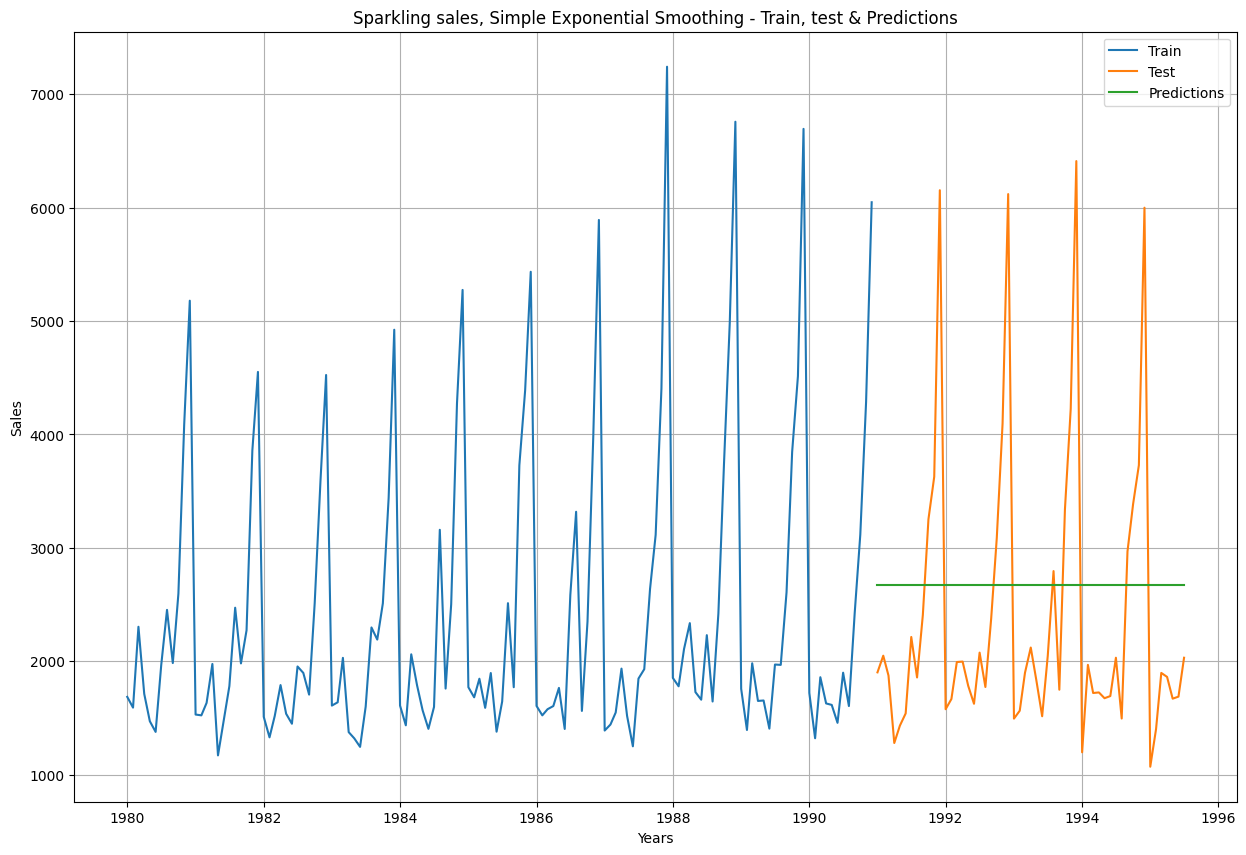

In [53]:
##
## now lets plot the train and test values

plt.figure(figsize = (15, 10))
plt.plot(SES_spark1_train['Sparkling'], label = 'Train')
plt.plot(SES_spark1_test['Sparkling'], label = 'Test')

plt.plot(SES_spark1_test['Predictions'], label = 'Predictions')


plt.legend(loc = 'best')
plt.grid()
plt.title('Sparkling sales, Simple Exponential Smoothing - Train, test & Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

Model Evaluation for alpha as 0.03 in Simple Exponential Smoothing

In [54]:
##
## now lets find the root mean square error


rmse_SES_spark1_test = metrics.mean_squared_error(SES_spark1_test['Sparkling'], SES_spark1_test['Predictions'],
                                              squared = False).round(3)
print('Root mean square error for SES, where alpha is 0.03', rmse_SES_spark1_test)

Root mean square error for SES, where alpha is 0.03 1304.927


In [55]:
##
## Results dataframe

Results_SES = pd.DataFrame({'Model': 'Simple_Exponentail_Smoothing_Alpha_0.03', 'Root Mean Square Error': [rmse_SES_spark1_test]})
Results_SES.head()

Model  Root Mean Square Error
0  Simple_Exponentail_Smoothing_Alpha_0.03                1304.927

In [56]:
##
## Lets add the values to the original results dataframe

Results = pd.concat([Results, Results_SES])
Results.head(10)

Model  Root Mean Square Error
0                        Linear Regression                1389.135
0      Moving_Average_Trailing_by_2_points                 813.401
1      Moving_Average_Trailing_by_4_points                1156.590
2      Moving_Average_Trailing_by_6_points                1283.927
3      Moving_Average_Trailing_by_9_points                1346.278
4     Moving_Average_Trailing_by_12_points                1267.925
5     Moving_Average_Trailing_by_15_points                1173.813
0  Simple_Exponentail_Smoothing_Alpha_0.03                1304.927

Now let us setup different alpha values and see how the model performs.

Higher alpha values will give more weights to recent observations and vice versa.

In [57]:
##
## Lets setup containers

SES_results_2 = pd.DataFrame({'Alpha_values': [], 'Train_RMSE': [], 'Test_RMSE': []})
SES_results_2


Empty DataFrame
Columns: [Alpha_values, Train_RMSE, Test_RMSE]
Index: []

In [58]:
##
## the for loop below

for i in np.arange(0.3, 1, 0.1):
    SES_alpha_i = SES.fit(smoothing_level = i, optimized = False, use_brute = True)
    SES_spark1_train['Predictions_2', i] = SES_alpha_i.fittedvalues
    SES_spark1_test['Predictions_2', i] = SES_alpha_i.forecast(steps = int(len(SES_spark1_test)))
    rmse_SES_spark1_train_i = metrics.mean_squared_error(SES_spark1_train['Sparkling'], SES_spark1_train['Predictions_2', i],
                                              squared = False).round(3)
    rmse_SES_spark1_test_i = metrics.mean_squared_error(SES_spark1_test['Sparkling'], SES_spark1_test['Predictions_2', i],
                                              squared = False).round(3)
    SES_results_2 = SES_results_2.append({'Alpha_values': i, 'Train_RMSE': rmse_SES_spark1_train_i,
                                          'Test_RMSE': rmse_SES_spark1_test_i}, ignore_index = True)



<ipython-input-58-4587931997fc>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SES_results_2 = SES_results_2.append({'Alpha_values': i, 'Train_RMSE': rmse_SES_spark1_train_i,
<ipython-input-58-4587931997fc>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SES_results_2 = SES_results_2.append({'Alpha_values': i, 'Train_RMSE': rmse_SES_spark1_train_i,
<ipython-input-58-4587931997fc>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SES_results_2 = SES_results_2.append({'Alpha_values': i, 'Train_RMSE': rmse_SES_spark1_train_i,
<ipython-input-58-4587931997fc>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SES_results_2 = SES_results_

In [59]:
##
## now lets evaluate the model

SES_results_2.sort_values(by = ['Test_RMSE'], ascending = True)


Alpha_values  Train_RMSE  Test_RMSE
0           0.3    1359.512   1935.507
1           0.4    1352.589   2311.920
2           0.5    1344.004   2666.351
3           0.6    1338.805   2979.204
4           0.7    1338.844   3249.944
5           0.8    1344.462   3483.801
6           0.9    1355.724   3686.794

In [60]:
##
##

SES_spark1_test.head()

Sparkling  Predictions  (Predictions_2, 0.3)  \
YearMonth                                                  
1991-01-01       1902  2676.676366           3855.296454   
1991-02-01       2049  2676.676366           3855.296454   
1991-03-01       1874  2676.676366           3855.296454   
1991-04-01       1279  2676.676366           3855.296454   
1991-05-01       1432  2676.676366           3855.296454   

            (Predictions_2, 0.4)  (Predictions_2, 0.5)  \
YearMonth                                                
1991-01-01           4327.657882           4740.858018   
1991-02-01           4327.657882           4740.858018   
1991-03-01           4327.657882           4740.858018   
1991-04-01           4327.657882           4740.858018   
1991-05-01           4327.657882           4740.858018   

            (Predictions_2, 0.6000000000000001)  \
YearMonth                                         
1991-01-01                          5091.699384   
1991-02-01                          5091.699384   
1991-03-01                          5091.699384   
1991-04-01                          5091.699384   
1991-05-01                          5091.699384   

            (Predictions_2, 0.7000000000000002)  \
YearMonth                                         
1991-01-01                          5388.514029   
1991-02-01                          5388.514029   
1991-03-01                          5388.514029   
1991-04-01                          5388.514029   
1991-05-01                          5388.514029   

            (Predictions_2, 0.8000000000000003)  \
YearMonth                                         
1991-01-01                          5641.221537   
1991-02-01                          5641.221537   
1991-03-01                          5641.221537   
1991-04-01                          5641.221537   
1991-05-01                          5641.221537   

            (Predictions_2, 0.9000000000000001)  
YearMonth                                        
1991-01-01                          5858.428614  
1991-02-01                          5858.428614  
1991-03-01                          5858.428614  
1991-04-01                          5858.428614  
1991-05-01                          5858.428614

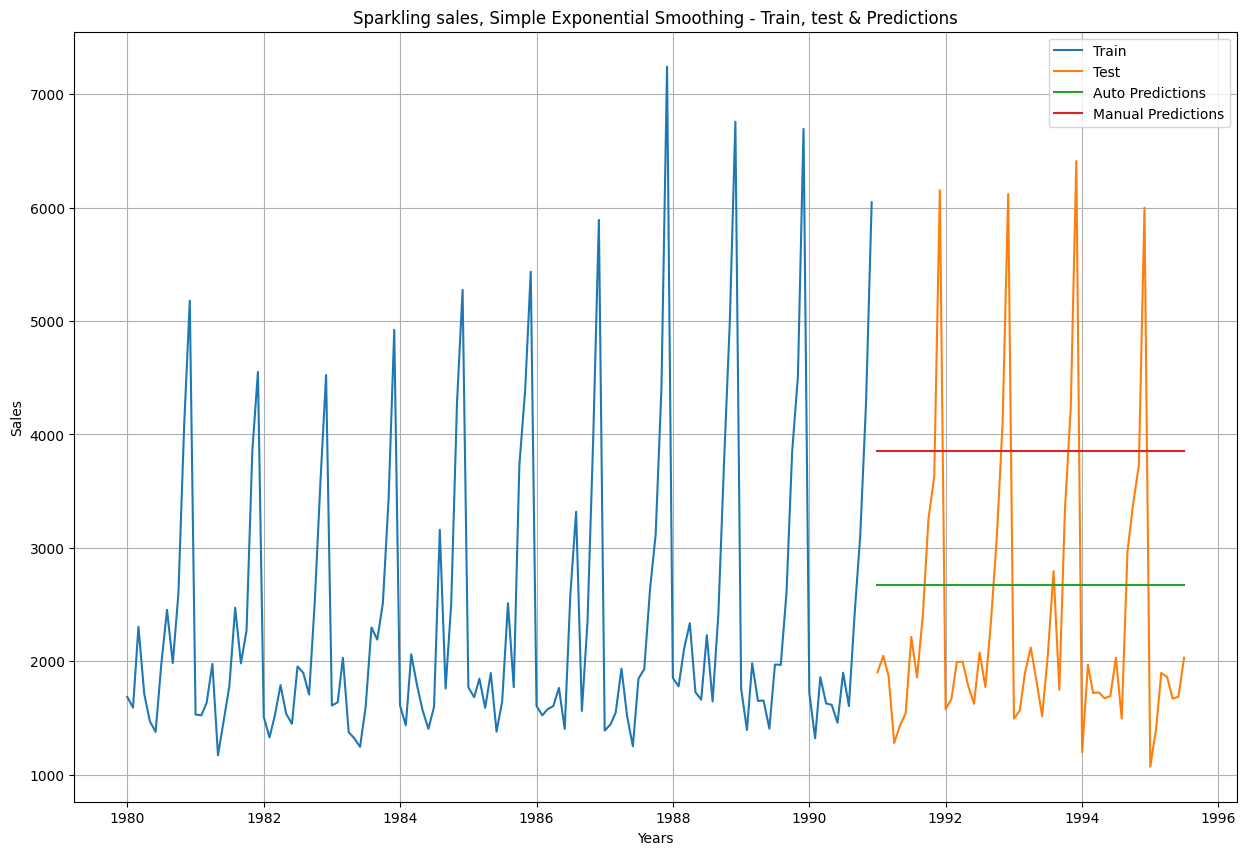

In [61]:
##
## now lets plot the train and test values

plt.figure(figsize = (15, 10))
plt.plot(SES_spark1_train['Sparkling'], label = 'Train')
plt.plot(SES_spark1_test['Sparkling'], label = 'Test')

plt.plot(SES_spark1_test['Predictions'], label = 'Auto Predictions')
plt.plot(SES_spark1_test['Predictions_2', 0.3], label = 'Manual Predictions')


plt.legend(loc = 'best')
plt.grid()
plt.title('Sparkling sales, Simple Exponential Smoothing - Train, test & Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

In [62]:
##
## now lets find the root mean square error


rmse_SES_spark1_test_2 = metrics.mean_squared_error(SES_spark1_test['Sparkling'], SES_spark1_test['Predictions_2', 0.3],
                                              squared = False).round(3)
print('Root mean square error for SES, where alpha is 0.3', rmse_SES_spark1_test_2)

Root mean square error for SES, where alpha is 0.3 1935.507


In [63]:
##
## Results dataframe

Results_SES_2 = pd.DataFrame({'Model': 'Simple_Exponentail_Smoothing_Alpha_0.3', 'Root Mean Square Error': [rmse_SES_spark1_test_2]})
Results_SES_2.head()

Model  Root Mean Square Error
0  Simple_Exponentail_Smoothing_Alpha_0.3                1935.507

In [64]:
##
## Lets add the values to the original results dataframe

Results = pd.concat([Results, Results_SES_2])
Results.head(10)

Model  Root Mean Square Error
0                        Linear Regression                1389.135
0      Moving_Average_Trailing_by_2_points                 813.401
1      Moving_Average_Trailing_by_4_points                1156.590
2      Moving_Average_Trailing_by_6_points                1283.927
3      Moving_Average_Trailing_by_9_points                1346.278
4     Moving_Average_Trailing_by_12_points                1267.925
5     Moving_Average_Trailing_by_15_points                1173.813
0  Simple_Exponentail_Smoothing_Alpha_0.03                1304.927
0   Simple_Exponentail_Smoothing_Alpha_0.3                1935.507

### Model 4) Double Exponential Smoothing

In [65]:
##
##

DES_spark1_train = spark1_train.copy()
DES_spark1_test = spark1_test.copy()

In [66]:
##
##

DES = Holt(DES_spark1_train['Sparkling'])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [67]:
##
##

DES_Autofit = DES.fit(optimized = True)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [68]:
##
## Now lets see the parameters

DES_Autofit.params


{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
##
## lets predict

DES_spark1_test['Auto_Predictions'] = DES_Autofit.forecast(steps = len(DES_spark1_test))
DES_spark1_test.head()

Sparkling  Auto_Predictions
YearMonth                              
1991-01-01       1902       5221.278699
1991-02-01       2049       5127.886554
1991-03-01       1874       5034.494409
1991-04-01       1279       4941.102264
1991-05-01       1432       4847.710119

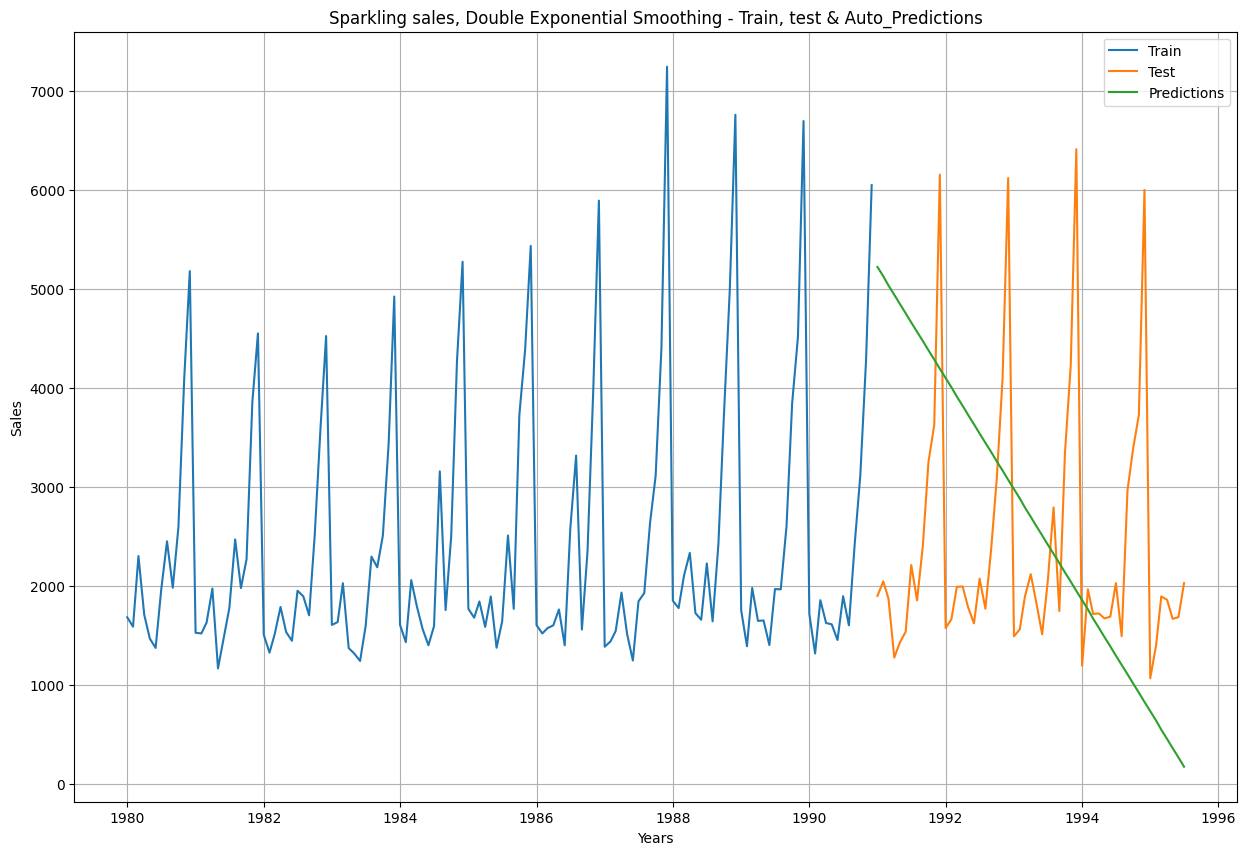

In [70]:
##
## now lets plot the train and test values

plt.figure(figsize = (15, 10))
plt.plot(DES_spark1_train['Sparkling'], label = 'Train')
plt.plot(DES_spark1_test['Sparkling'], label = 'Test')

plt.plot(DES_spark1_test['Auto_Predictions'], label = 'Predictions')


plt.legend(loc = 'best')
plt.grid()
plt.title('Sparkling sales, Double Exponential Smoothing - Train, test & Auto_Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

In [71]:
##
## now lets find the root mean square error


rmse_DES_spark1_test = metrics.mean_squared_error(DES_spark1_test['Sparkling'], DES_spark1_test['Auto_Predictions'],
                                              squared = False).round(3)
print('Root mean square error for SES, where alpha is 0.68 and beta is 9.99e-05', rmse_DES_spark1_test)

Root mean square error for SES, where alpha is 0.68 and beta is 9.99e-05 2007.239


In [72]:
##
## Results dataframe

Results_DES = pd.DataFrame({'Model': 'Double_Exponentail_Smoothing_Alpha_0.68_Beta_9.99e-05', 'Root Mean Square Error': [rmse_DES_spark1_test]})
Results_DES.head()

Model  Root Mean Square Error
0  Double_Exponentail_Smoothing_Alpha_0.68_Beta_9...                2007.239

In [73]:
##
## Lets add the values to the original results dataframe

Results = pd.concat([Results, Results_DES])
Results.head(10)

Model  Root Mean Square Error
0                                  Linear Regression                1389.135
0                Moving_Average_Trailing_by_2_points                 813.401
1                Moving_Average_Trailing_by_4_points                1156.590
2                Moving_Average_Trailing_by_6_points                1283.927
3                Moving_Average_Trailing_by_9_points                1346.278
4               Moving_Average_Trailing_by_12_points                1267.925
5               Moving_Average_Trailing_by_15_points                1173.813
0            Simple_Exponentail_Smoothing_Alpha_0.03                1304.927
0             Simple_Exponentail_Smoothing_Alpha_0.3                1935.507
0  Double_Exponentail_Smoothing_Alpha_0.68_Beta_9...                2007.239

In [74]:
##
## Lets setup containers

DES_results = pd.DataFrame({'Alpha_values': [], 'Beta_Values': [], 'Train_RMSE': [], 'Test_RMSE': []})
DES_results


Empty DataFrame
Columns: [Alpha_values, Beta_Values, Train_RMSE, Test_RMSE]
Index: []

In [75]:
##
## the for loop below

for i in np.arange(0.3, 1.1, 0.1):
    for j in np.arange(0.3, 1.1, 0.1):
        DES_alpha_i_j = DES.fit(smoothing_level = i, smoothing_trend = j, optimized = False, use_brute = True)
        DES_spark1_train['Predictions', i, j] = DES_alpha_i_j.fittedvalues
        DES_spark1_test['Predictions', i, j] = DES_alpha_i_j.forecast(steps = int(len(DES_spark1_test)))
        rmse_DES_spark1_train = metrics.mean_squared_error(DES_spark1_train['Sparkling'], DES_spark1_train['Predictions', i, j],
                                                  squared = False).round(3)
        rmse_DES_spark1_test = metrics.mean_squared_error(DES_spark1_test['Sparkling'], DES_spark1_test['Predictions', i, j],
                                                  squared = False).round(3)
        DES_results = DES_results.append({'Alpha_values': i, 'Beta_Values': j, 'Train_RMSE': rmse_DES_spark1_train,
                                              'Test_RMSE': rmse_DES_spark1_test}, ignore_index = True)



<ipython-input-75-60153feff9ca>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DES_results = DES_results.append({'Alpha_values': i, 'Beta_Values': j, 'Train_RMSE': rmse_DES_spark1_train,
<ipython-input-75-60153feff9ca>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DES_results = DES_results.append({'Alpha_values': i, 'Beta_Values': j, 'Train_RMSE': rmse_DES_spark1_train,
<ipython-input-75-60153feff9ca>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DES_results = DES_results.append({'Alpha_values': i, 'Beta_Values': j, 'Train_RMSE': rmse_DES_spark1_train,
<ipython-input-75-60153feff9ca>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

In [76]:
##
## now lets evaluate the model

DES_results.sort_values(by = ['Test_RMSE'], ascending = True)


Alpha_values  Beta_Values  Train_RMSE  Test_RMSE
0            0.3          0.3    1592.293  18259.111
8            0.4          0.3    1569.339  23878.497
1            0.3          0.4    1682.574  26069.841
16           0.5          0.3    1530.576  27095.532
24           0.6          0.3    1506.450  29070.723
..           ...          ...         ...        ...
39           0.7          1.0    1817.043  57297.154
62           1.0          0.9    1985.368  57823.177
47           0.8          1.0    1872.711  57990.118
55           0.9          1.0    1948.021  59008.254
63           1.0          1.0    2077.672  59877.077

[64 rows x 4 columns]

In [77]:
##
##

DES_spark1_test.head()

Sparkling  Auto_Predictions  (Predictions, 0.3, 0.3)  \
YearMonth                                                          
1991-01-01       1902       5221.278699              4375.375370   
1991-02-01       2049       5127.886554              4902.217809   
1991-03-01       1874       5034.494409              5429.060248   
1991-04-01       1279       4941.102264              5955.902688   
1991-05-01       1432       4847.710119              6482.745127   

            (Predictions, 0.3, 0.4)  (Predictions, 0.3, 0.5)  \
YearMonth                                                      
1991-01-01              4723.520613              5171.733539   
1991-02-01              5490.624497              6192.691077   
1991-03-01              6257.728381              7213.648614   
1991-04-01              7024.832265              8234.606152   
1991-05-01              7791.936149              9255.563690   

            (Predictions, 0.3, 0.6000000000000001)  \
YearMonth                                            
1991-01-01                             5686.460595   
1991-02-01                             6941.054339   
1991-03-01                             8195.648083   
1991-04-01                             9450.241827   
1991-05-01                            10704.835571   

            (Predictions, 0.3, 0.7000000000000002)  \
YearMonth                                            
1991-01-01                             6188.198696   
1991-02-01                             7609.893574   
1991-03-01                             9031.588451   
1991-04-01                            10453.283329   
1991-05-01                            11874.978207   

            (Predictions, 0.3, 0.8000000000000003)  \
YearMonth                                            
1991-01-01                             6568.425438   
1991-02-01                             8055.379391   
1991-03-01                             9542.333343   
1991-04-01                            11029.287296   
1991-05-01                            12516.241249   

            (Predictions, 0.3, 0.9000000000000001)  \
YearMonth                                            
1991-01-01                             6756.116964   
1991-02-01                             8212.466170   
1991-03-01                             9668.815377   
1991-04-01                            11125.164584   
1991-05-01                            12581.513790   

            (Predictions, 0.3, 1.0000000000000002)  ...  \
YearMonth                                           ...   
1991-01-01                             6764.087912  ...   
1991-02-01                             8139.264554  ...   
1991-03-01                             9514.441197  ...   
1991-04-01                            10889.617839  ...   
1991-05-01                            12264.794482  ...   

            (Predictions, 0.9000000000000001, 0.9000000000000001)  \
YearMonth                                                           
1991-01-01                                        7649.109760       
1991-02-01                                        9321.287881       
1991-03-01                                       10993.466002       
1991-04-01                                       12665.644123       
1991-05-01                                       14337.822244       

            (Predictions, 0.9000000000000001, 1.0000000000000002)  \
YearMonth                                                           
1991-01-01                                        7716.730979       
1991-02-01                                        9452.535902       
1991-03-01                                       11188.340825       
1991-04-01                                       12924.145748       
1991-05-01                                       14659.950671       

            (Predictions, 1.0000000000000002, 0.3)  \
YearMonth                                            
1991-01-01                             6986.301520   
1991-02-01                

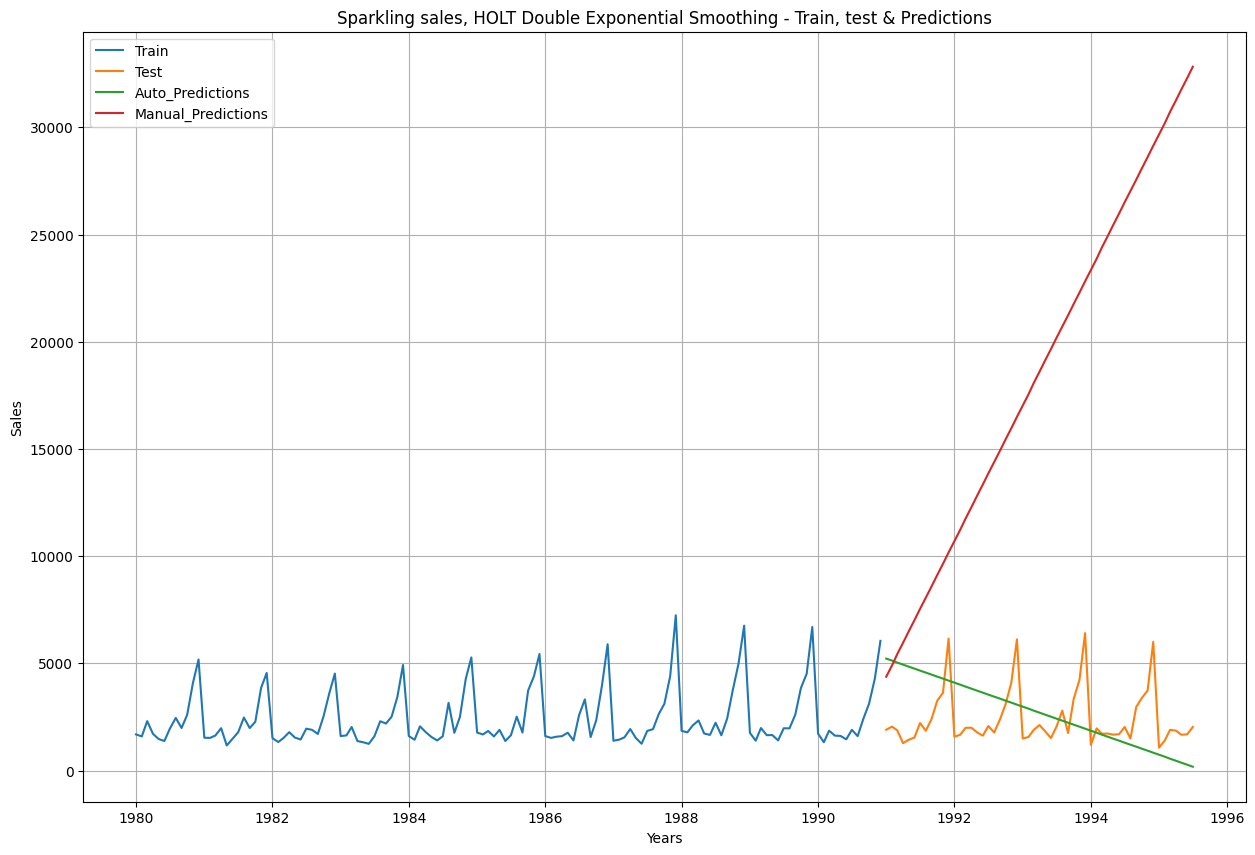

In [78]:
##
## now lets plot the train and test values

plt.figure(figsize = (15, 10))
plt.plot(DES_spark1_train['Sparkling'], label = 'Train')
plt.plot(DES_spark1_test['Sparkling'], label = 'Test')

plt.plot(DES_spark1_test['Auto_Predictions'], label = 'Auto_Predictions')
plt.plot(DES_spark1_test['Predictions', 0.3, 0.3], label = 'Manual_Predictions')


plt.legend(loc = 'best')
plt.grid()
plt.title('Sparkling sales, HOLT Double Exponential Smoothing - Train, test & Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

In [79]:
##
## now lets find the root mean square error


rmse_DES_spark1_test = metrics.mean_squared_error(DES_spark1_test['Sparkling'], DES_spark1_test['Predictions', 0.3, 0.3],
                                              squared = False).round(3)
print('Root mean square error for DES, where alpha is 0.3 and Beta is 0.3', rmse_DES_spark1_test)

Root mean square error for DES, where alpha is 0.3 and Beta is 0.3 18259.111


In [80]:
##
## Results dataframe

Results_DES = pd.DataFrame({'Model': 'Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3', 'Root Mean Square Error': [rmse_DES_spark1_test]})
Results_DES.head()

Model  Root Mean Square Error
0  Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3               18259.111

In [81]:
##
## Lets add the values to the original results dataframe

Results = pd.concat([Results, Results_DES])
Results.head(11)

Model  Root Mean Square Error
0                                  Linear Regression                1389.135
0                Moving_Average_Trailing_by_2_points                 813.401
1                Moving_Average_Trailing_by_4_points                1156.590
2                Moving_Average_Trailing_by_6_points                1283.927
3                Moving_Average_Trailing_by_9_points                1346.278
4               Moving_Average_Trailing_by_12_points                1267.925
5               Moving_Average_Trailing_by_15_points                1173.813
0            Simple_Exponentail_Smoothing_Alpha_0.03                1304.927
0             Simple_Exponentail_Smoothing_Alpha_0.3                1935.507
0  Double_Exponentail_Smoothing_Alpha_0.68_Beta_9...                2007.239
0    Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3               18259.111

### Model 5) Triple Exponential Smoothing (Holt - Winter's Model)

In [82]:
##
##

TES_spark1_train = spark1_train.copy()
TES_spark1_test = spark1_test.copy()

In [83]:
##
##

TES_spark1_train.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [84]:
##
##

TES = ExponentialSmoothing(TES_spark1_train['Sparkling'], trend = 'additive', seasonal = 'multiplicative', freq = 'MS')


In [85]:
##
##

TES_Autofit = TES.fit()

In [86]:
##
##

TES_Autofit.params

{'smoothing_level': 0.11119949831569428,
 'smoothing_trend': 0.049430920023313805,
 'smoothing_seasonal': 0.3620525701498937,
 'damping_trend': nan,
 'initial_level': 2356.5264391986907,
 'initial_trend': -9.443690175376352,
 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
        0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
        1.86941738, 2.3734461 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [87]:
##
##

TES_spark1_test['Auto_Predictions'] = TES_Autofit.forecast(steps = int(len(TES_spark1_test)))
TES_spark1_test.head()

Sparkling  Auto_Predictions
YearMonth                              
1991-01-01       1902       1587.685845
1991-02-01       2049       1356.590237
1991-03-01       1874       1763.121866
1991-04-01       1279       1656.379813
1991-05-01       1432       1542.186697

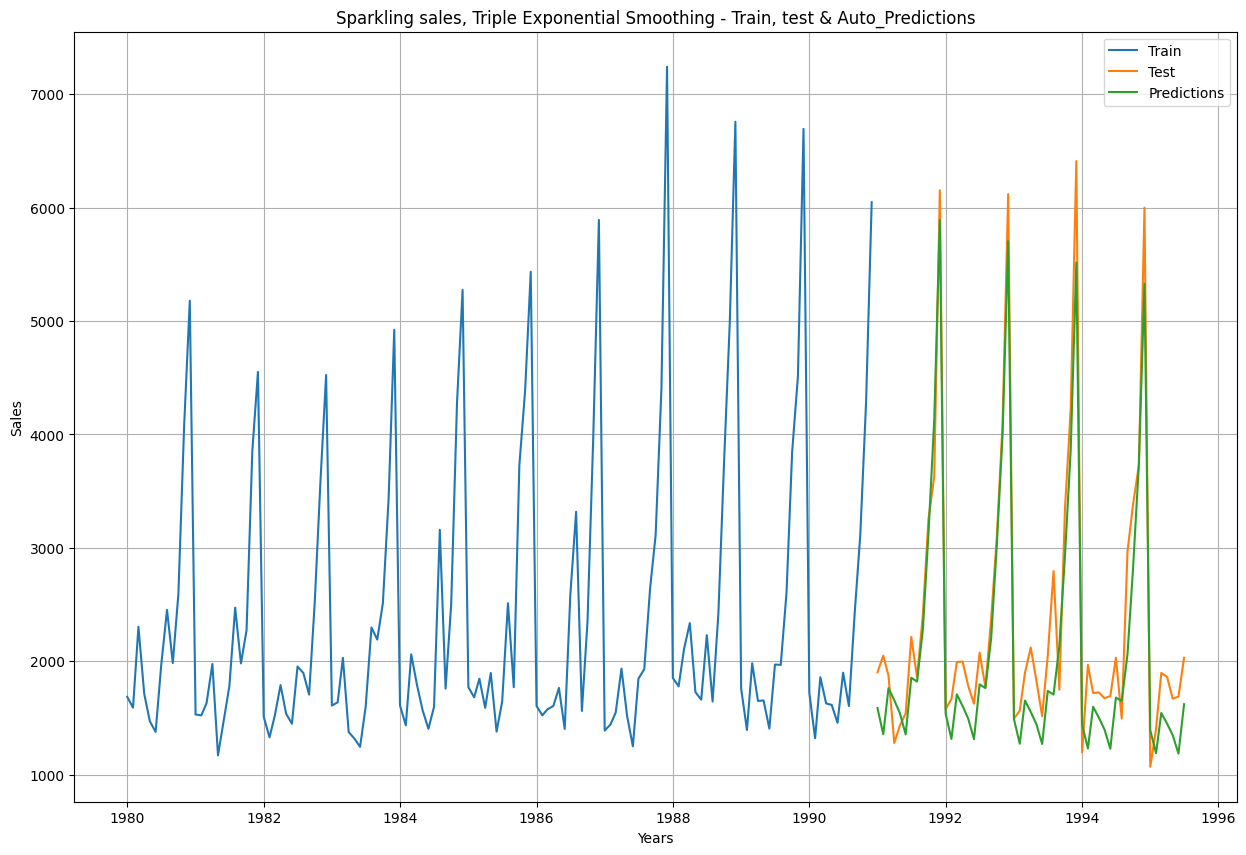

In [88]:
##
## now lets plot the train and test values

plt.figure(figsize = (15, 10))
plt.plot(TES_spark1_train['Sparkling'], label = 'Train')
plt.plot(TES_spark1_test['Sparkling'], label = 'Test')

plt.plot(TES_spark1_test['Auto_Predictions'], label = 'Predictions')


plt.legend(loc = 'best')
plt.grid()
plt.title('Sparkling sales, Triple Exponential Smoothing - Train, test & Auto_Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

In [89]:
##
## now lets find the root mean square error


rmse_TES_spark1_test = metrics.mean_squared_error(TES_spark1_test['Sparkling'], TES_spark1_test['Auto_Predictions'],
                                              squared = False).round(3)
print('Root mean square error for TES, where alpha is 0.11, beta is 0.04 and gamma is 0.36', rmse_TES_spark1_test)

Root mean square error for TES, where alpha is 0.11, beta is 0.04 and gamma is 0.36 403.706


In [90]:
##
## Results dataframe

Results_TES = pd.DataFrame({'Model': 'Triple_Exponentail_Smoothing_Alpha_0.11_Beta_0.04_Gamma_0.36', 'Root Mean Square Error': [rmse_TES_spark1_test]})
Results_TES.head()

Model  Root Mean Square Error
0  Triple_Exponentail_Smoothing_Alpha_0.11_Beta_0...                 403.706

In [91]:
##
## Lets add the values to the original results dataframe

Results = pd.concat([Results, Results_TES])
Results.head(20)

Model  Root Mean Square Error
0                                  Linear Regression                1389.135
0                Moving_Average_Trailing_by_2_points                 813.401
1                Moving_Average_Trailing_by_4_points                1156.590
2                Moving_Average_Trailing_by_6_points                1283.927
3                Moving_Average_Trailing_by_9_points                1346.278
4               Moving_Average_Trailing_by_12_points                1267.925
5               Moving_Average_Trailing_by_15_points                1173.813
0            Simple_Exponentail_Smoothing_Alpha_0.03                1304.927
0             Simple_Exponentail_Smoothing_Alpha_0.3                1935.507
0  Double_Exponentail_Smoothing_Alpha_0.68_Beta_9...                2007.239
0    Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3               18259.111
0  Triple_Exponentail_Smoothing_Alpha_0.11_Beta_0...                 403.706

In [92]:
##
## Lets setup containers

TES_results = pd.DataFrame({'Alpha_values': [], 'Beta_Values': [], 'Gamma_values': [], 'Train_RMSE': [], 'Test_RMSE': []})
TES_results


Empty DataFrame
Columns: [Alpha_values, Beta_Values, Gamma_values, Train_RMSE, Test_RMSE]
Index: []

In [93]:
##
## the for loop below

for i in np.arange(0.3, 1.1, 0.1):
    for j in np.arange(0.3, 1.1, 0.1):
        for k in np.arange(0.3, 1.1, 0.1):
            TES_alpha_i_j_k = TES.fit(smoothing_level = i, smoothing_trend = j, smoothing_seasonal = k, optimized = False, use_brute = True)
            TES_spark1_train['Predictions', i, j, k] = TES_alpha_i_j_k.fittedvalues
            TES_spark1_test['Predictions', i, j, k] = TES_alpha_i_j_k.forecast(steps = int(len(TES_spark1_test)))
            rmse_TES_spark1_train = metrics.mean_squared_error(TES_spark1_train['Sparkling'], TES_spark1_train['Predictions', i, j, k],
                                                      squared = False).round(3)
            rmse_TES_spark1_test = metrics.mean_squared_error(TES_spark1_test['Sparkling'], TES_spark1_test['Predictions', i, j, k],
                                                      squared = False).round(3)
            TES_results = TES_results.append({'Alpha_values': i, 'Beta_Values': j, 'Gamma_values': k, 'Train_RMSE': rmse_TES_spark1_train,
                                                  'Test_RMSE': rmse_TES_spark1_test}, ignore_index = True)



<ipython-input-93-36db95848b52>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TES_results = TES_results.append({'Alpha_values': i, 'Beta_Values': j, 'Gamma_values': k, 'Train_RMSE': rmse_TES_spark1_train,
<ipython-input-93-36db95848b52>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TES_results = TES_results.append({'Alpha_values': i, 'Beta_Values': j, 'Gamma_values': k, 'Train_RMSE': rmse_TES_spark1_train,
<ipython-input-93-36db95848b52>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TES_results = TES_results.append({'Alpha_values': i, 'Beta_Values': j, 'Gamma_values': k, 'Train_RMSE': rmse_TES_spark1_train,
<ipython-input-93-36db95848b52>:14: FutureWarning: The frame.append method is deprecated and will be remov

In [94]:
##
## now lets evaluate the model

TES_results.sort_values(by = ['Test_RMSE'], ascending = True)


Alpha_values  Beta_Values  Gamma_values   Train_RMSE     Test_RMSE
0             0.3          0.3           0.3      397.797  3.613970e+02
17            0.3          0.5           0.4      452.801  5.125430e+02
376           0.8          1.0           0.3      790.741  5.802660e+02
66            0.4          0.3           0.5      448.661  5.921530e+02
8             0.3          0.4           0.3      415.172  6.051100e+02
..            ...          ...           ...          ...           ...
406           0.9          0.5           0.9     6346.125  7.893556e+06
508           1.0          1.0           0.7   266001.473  8.649577e+06
373           0.8          0.9           0.8  1894001.907  9.023204e+06
474           1.0          0.6           0.5     5298.638  1.016607e+07
159           0.5          0.6           1.0     7880.631  2.102770e+07

[512 rows x 5 columns]

In [95]:
##
##

TES_spark1_test.head()

Sparkling  Auto_Predictions  (Predictions, 0.3, 0.3, 0.3)  \
YearMonth                                                               
1991-01-01       1902       1587.685845                   1431.113547   
1991-02-01       2049       1356.590237                   1242.623016   
1991-03-01       1874       1763.121866                   1633.044125   
1991-04-01       1279       1656.379813                   1567.596467   
1991-05-01       1432       1542.186697                   1491.383781   

            (Predictions, 0.3, 0.3, 0.4)  (Predictions, 0.3, 0.3, 0.5)  \
YearMonth                                                                
1991-01-01                   1398.754439                   1391.239725   
1991-02-01                   1154.497474                   1094.640305   
1991-03-01                   1537.954149                   1469.413721   
1991-04-01                   1427.107189                   1312.382563   
1991-05-01                   1364.289327                   1254.644271   

            (Predictions, 0.3, 0.3, 0.6000000000000001)  \
YearMonth                                                 
1991-01-01                                  1397.406368   
1991-02-01                                  1052.688833   
1991-03-01                                  1410.715533   
1991-04-01                                  1212.628453   
1991-05-01                                  1152.588676   

            (Predictions, 0.3, 0.3, 0.7000000000000002)  \
YearMonth                                                 
1991-01-01                                  1409.915169   
1991-02-01                                  1018.401558   
1991-03-01                                  1343.888769   
1991-04-01                                  1112.133443   
1991-05-01                                  1040.024646   

            (Predictions, 0.3, 0.3, 0.8000000000000003)  \
YearMonth                                                 
1991-01-01                                  1426.442774   
1991-02-01                                   982.750332   
1991-03-01                                  1251.583045   
1991-04-01                                   992.540003   
1991-05-01                                   896.675931   

            (Predictions, 0.3, 0.3, 0.9000000000000001)  \
YearMonth                                                 
1991-01-01                                  1449.038127   
1991-02-01                                   937.668192   
1991-03-01                                  1118.987132   
1991-04-01                                   836.778788   
1991-05-01                                   707.060573   

            (Predictions, 0.3, 0.3, 1.0000000000000002)  ...  \
YearMonth                                                ...   
1991-01-01                                  1477.353956  ...   
1991-02-01                                   870.542670  ...   
1991-03-01                                   930.779472  ...   
1991-04-01                                   630.929827  ...   
1991-05-01                                   466.163637  ...   

            (Predictions, 1.0000000000000002, 0.9000000000000001, 0.9000000000000001)  \
YearMonth                                                                               
1991-01-01                                      -11609.036696                           
1991-02-01                                       -8580.263781                           
1991-03-01                                      -73142.727149                           
1991-04-01                                       17746.122105                           
1991-05-01                                        1616.520500                           

            (Predictions, 1.0000000000000002, 0.9000000000000001, 1.0000000000000002)  \
YearMonth                                                                               
1991-01-01                                       -1444.756964             

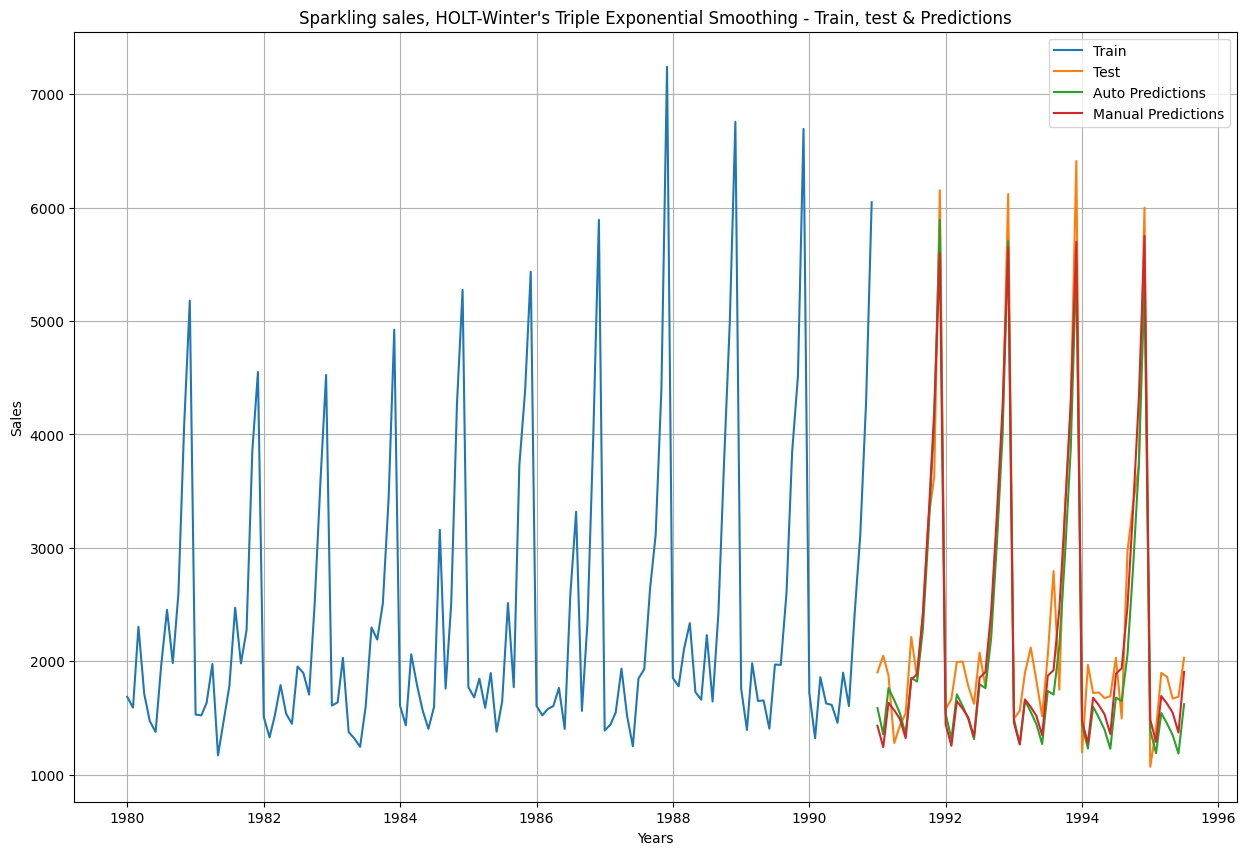

In [96]:
##
## now lets plot the train and test values

plt.figure(figsize = (15, 10))
plt.plot(TES_spark1_train['Sparkling'], label = 'Train')
plt.plot(TES_spark1_test['Sparkling'], label = 'Test')

plt.plot(TES_spark1_test['Auto_Predictions'], label = 'Auto Predictions')
plt.plot(TES_spark1_test['Predictions', 0.3, 0.3, 0.3], label = 'Manual Predictions')


plt.legend(loc = 'best')
plt.grid()
plt.title('Sparkling sales, HOLT-Winter\'s Triple Exponential Smoothing - Train, test & Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

In [97]:
##
## now lets find the root mean square error


rmse_TES_spark1_test = metrics.mean_squared_error(TES_spark1_test['Sparkling'], TES_spark1_test['Predictions', 0.3, 0.3, 0.3],
                                              squared = False).round(3)
print('Root mean square error for TES, where alpha is 0.3 and Beta is 0.3 and gamma is 0.3', rmse_TES_spark1_test)

Root mean square error for TES, where alpha is 0.3 and Beta is 0.3 and gamma is 0.3 361.397


In [98]:
##
## Results dataframe

Results_TES = pd.DataFrame({'Model': 'Triple_Exponential_Smoothing_Alpha_0.3_Beta_0.3_Gamma_0.3', 'Root Mean Square Error': [rmse_TES_spark1_test]})
Results_TES.head()

Model  Root Mean Square Error
0  Triple_Exponential_Smoothing_Alpha_0.3_Beta_0....                 361.397

In [99]:
##
## Lets add the values to the original results dataframe

Results = pd.concat([Results, Results_TES])
Results.head(11)

Model  Root Mean Square Error
0                                  Linear Regression                1389.135
0                Moving_Average_Trailing_by_2_points                 813.401
1                Moving_Average_Trailing_by_4_points                1156.590
2                Moving_Average_Trailing_by_6_points                1283.927
3                Moving_Average_Trailing_by_9_points                1346.278
4               Moving_Average_Trailing_by_12_points                1267.925
5               Moving_Average_Trailing_by_15_points                1173.813
0            Simple_Exponentail_Smoothing_Alpha_0.03                1304.927
0             Simple_Exponentail_Smoothing_Alpha_0.3                1935.507
0  Double_Exponentail_Smoothing_Alpha_0.68_Beta_9...                2007.239
0    Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3               18259.111

In [100]:
Results.head(20)

Model  Root Mean Square Error
0                                  Linear Regression                1389.135
0                Moving_Average_Trailing_by_2_points                 813.401
1                Moving_Average_Trailing_by_4_points                1156.590
2                Moving_Average_Trailing_by_6_points                1283.927
3                Moving_Average_Trailing_by_9_points                1346.278
4               Moving_Average_Trailing_by_12_points                1267.925
5               Moving_Average_Trailing_by_15_points                1173.813
0            Simple_Exponentail_Smoothing_Alpha_0.03                1304.927
0             Simple_Exponentail_Smoothing_Alpha_0.3                1935.507
0  Double_Exponentail_Smoothing_Alpha_0.68_Beta_9...                2007.239
0    Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3               18259.111
0  Triple_Exponentail_Smoothing_Alpha_0.11_Beta_0...                 403.706
0  Triple_Exponential_Smoothing_Alpha_0.3_Beta_0....                 361.397

### Naive forecasting



In [101]:
##
##

Naive_spark1_train = spark1_train.copy()
Naive_spark1_test = spark1_test.copy()

In [102]:
##
##

Naive_spark1_test['Predictions'] = np.asarray(Naive_spark1_train['Sparkling'])[len(np.asarray(Naive_spark1_train['Sparkling'])) - 1]
Naive_spark1_test.head()

Sparkling  Predictions
YearMonth                         
1991-01-01       1902         6047
1991-02-01       2049         6047
1991-03-01       1874         6047
1991-04-01       1279         6047
1991-05-01       1432         6047

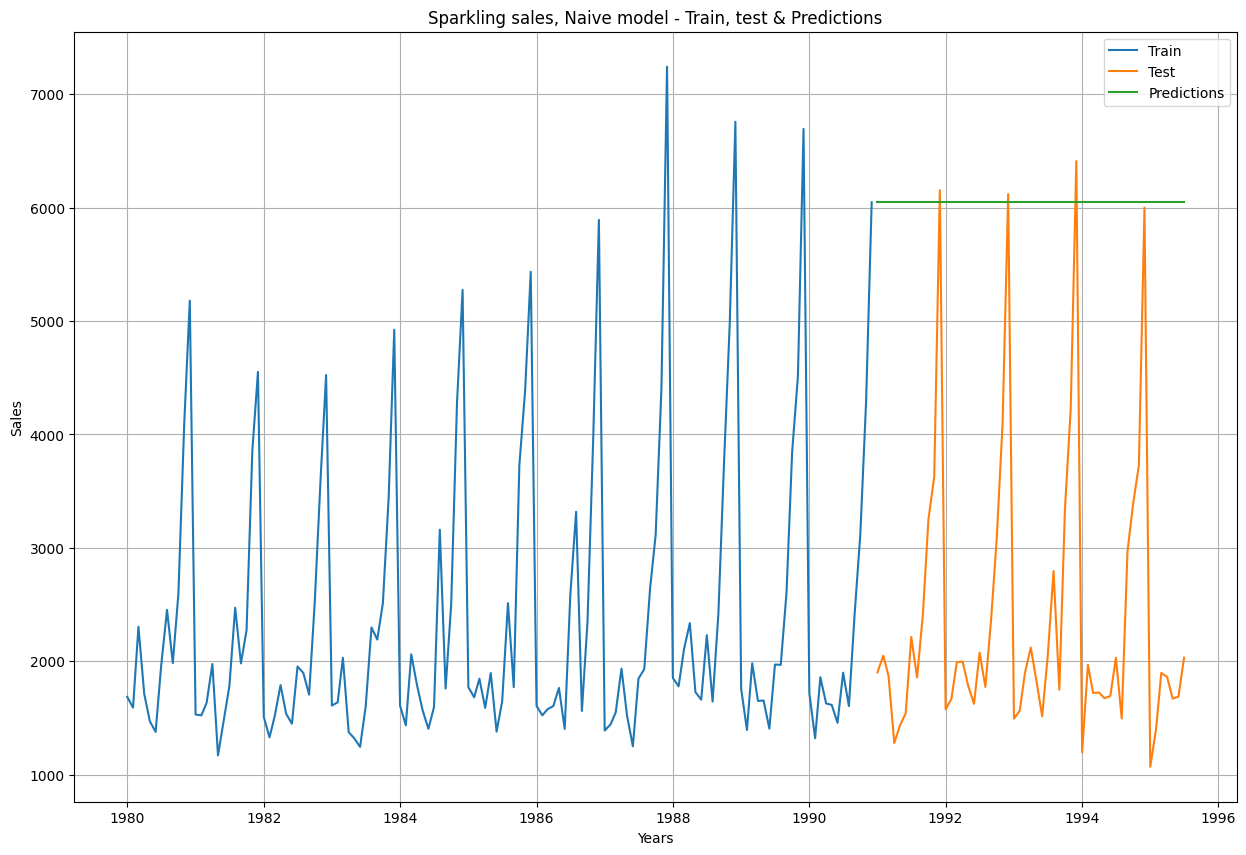

In [103]:
##
## now lets plot the train and test values

plt.figure(figsize = (15, 10))
plt.plot(Naive_spark1_train['Sparkling'], label = 'Train')
plt.plot(Naive_spark1_test['Sparkling'], label = 'Test')

plt.plot(Naive_spark1_test['Predictions'], label = 'Predictions')


plt.legend(loc = 'best')
plt.grid()
plt.title('Sparkling sales, Naive model - Train, test & Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()


In [104]:
##
## now lets find the root mean square error


rmse_Naive_spark1_test = metrics.mean_squared_error(Naive_spark1_test['Sparkling'], Naive_spark1_test['Predictions'],
                                              squared = False).round(3)
print('Root mean square error for Naive Model', rmse_Naive_spark1_test)

Root mean square error for Naive Model 3864.279


In [105]:
##
## Results dataframe

Results_Naive = pd.DataFrame({'Model': 'Naive_Model', 'Root Mean Square Error': [rmse_Naive_spark1_test]})
Results_Naive.head()

Model  Root Mean Square Error
0  Naive_Model                3864.279

In [106]:
##
## Lets add the values to the original results dataframe

Results = pd.concat([Results, Results_Naive])
Results.head(11)

Model  Root Mean Square Error
0                                  Linear Regression                1389.135
0                Moving_Average_Trailing_by_2_points                 813.401
1                Moving_Average_Trailing_by_4_points                1156.590
2                Moving_Average_Trailing_by_6_points                1283.927
3                Moving_Average_Trailing_by_9_points                1346.278
4               Moving_Average_Trailing_by_12_points                1267.925
5               Moving_Average_Trailing_by_15_points                1173.813
0            Simple_Exponentail_Smoothing_Alpha_0.03                1304.927
0             Simple_Exponentail_Smoothing_Alpha_0.3                1935.507
0  Double_Exponentail_Smoothing_Alpha_0.68_Beta_9...                2007.239
0    Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3               18259.111

### Sorted RMSE values

In [107]:
##
##

print('Sorted by RMSE values on the test dataframe', '\n',)
Results.sort_values(by = ['Root Mean Square Error'])

Sorted by RMSE values on the test dataframe 



Model  Root Mean Square Error
0  Triple_Exponential_Smoothing_Alpha_0.3_Beta_0....                 361.397
0  Triple_Exponentail_Smoothing_Alpha_0.11_Beta_0...                 403.706
0                Moving_Average_Trailing_by_2_points                 813.401
1                Moving_Average_Trailing_by_4_points                1156.590
5               Moving_Average_Trailing_by_15_points                1173.813
4               Moving_Average_Trailing_by_12_points                1267.925
2                Moving_Average_Trailing_by_6_points                1283.927
0            Simple_Exponentail_Smoothing_Alpha_0.03                1304.927
3                Moving_Average_Trailing_by_9_points                1346.278
0                                  Linear Regression                1389.135
0             Simple_Exponentail_Smoothing_Alpha_0.3                1935.507
0  Double_Exponentail_Smoothing_Alpha_0.68_Beta_9...                2007.239
0                                        Naive_Model                3864.279
0    Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3               18259.111

## 5) Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

Dickey-Fuller Test - Dicky Fuller Test on the timeseries is run to check for stationarity of data.

- Null Hypothesis H0
: Time Series is non-stationary.

- Alternate Hypothesis Ha
: Time Series is stationary.

So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .



In [108]:
##
## lets check for stationarity

## we have a package to test the stationarity of a dataset

from statsmodels.tsa.stattools import adfuller


In [109]:
##
##

def test_for_stationarity_plot(time_series, slider):

    ## lets set the rolling statistics
    rolling_mean = time_series.rolling(window = int(slider)).mean()
    rolling_std = time_series.rolling(window = int(slider)).std()

    ## lets plot
    original = plt.plot(time_series, color = 'red', label = 'Original')
    mean = plt.plot(rolling_mean, color = 'blue', label = 'Rolling Mean')
    std = plt.plot(rolling_std, color = 'green', label = 'Rolling Standard Deviation')
    plt.legend(loc = 'best')
    plt.title('Original, Rolling Mean and Standard Deviation')
    plt.show(block = False)







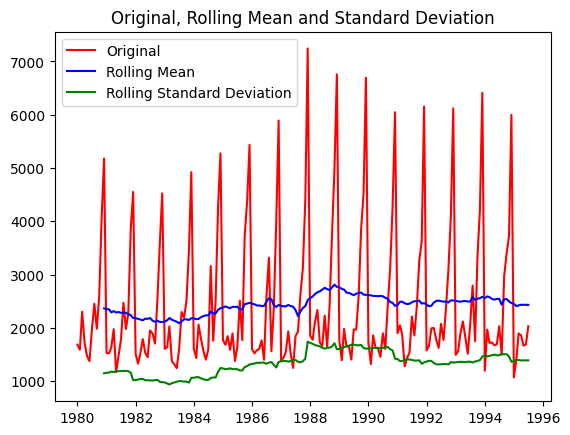

In [110]:
##
## Now lets call run the function for a window of 12

test_for_stationarity_plot(spark1['Sparkling'], '12')




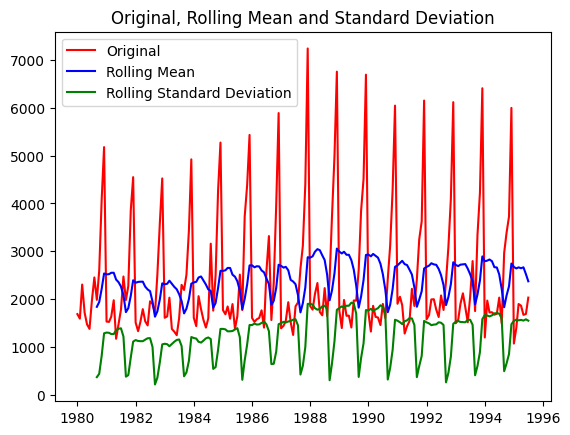

In [111]:
##
## Now lets call run the function for a window of 9

test_for_stationarity_plot(spark1['Sparkling'], '9')



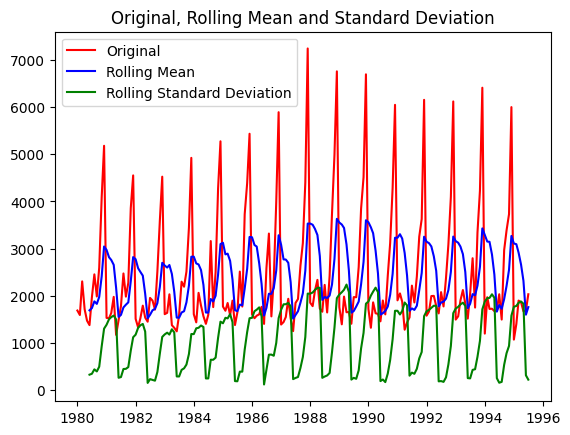

In [112]:
##
## Now lets call run the function for a window of 6

test_for_stationarity_plot(spark1['Sparkling'], '6')




In [113]:
##
##


def ADFuller_test_of_stationarity(time_series):
    ## perfomr the dicky-fuller test
    print('Results of ADFuller test - ')
    timeseries_test = adfuller(time_series, autolag = 'AIC')
    timeseries_output = pd.Series(timeseries_test[0:4], index = ['Test Statistic',
                                                                 'p-value',
                                                                 '# Lags used',
                                                                 'Number of Observations'])
    for key, value in timeseries_test[4].items():
        timeseries_output['Critical Value (%s)'%key] = value
    print(timeseries_output, '\n')



In [114]:
##
## now running the stationarity test to get the p-value


ADFuller_test_of_stationarity(spark1['Sparkling'])


## The p-value os greater than 0.05, hence we have failed to reject the null hypothesis *_*
## which means that the time series is non-stationary at 5% significance

## this mean we have find the order of difference where the time_series becomes stationary


Results of ADFuller test - 
Test Statistic             -1.360497
p-value                     0.601061
# Lags used                11.000000
Number of Observations    175.000000
Critical Value (1%)        -3.468280
Critical Value (5%)        -2.878202
Critical Value (10%)       -2.575653
dtype: float64 



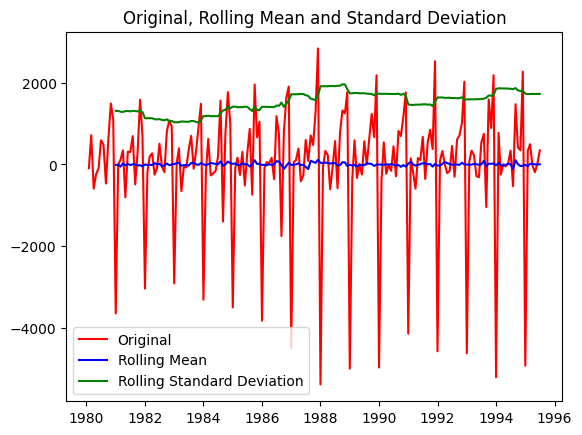

In [115]:
##
## Lets us take a difference of order of 1 and again perform ad_fuller test

test_for_stationarity_plot(spark1['Sparkling'].diff().dropna(), '12')

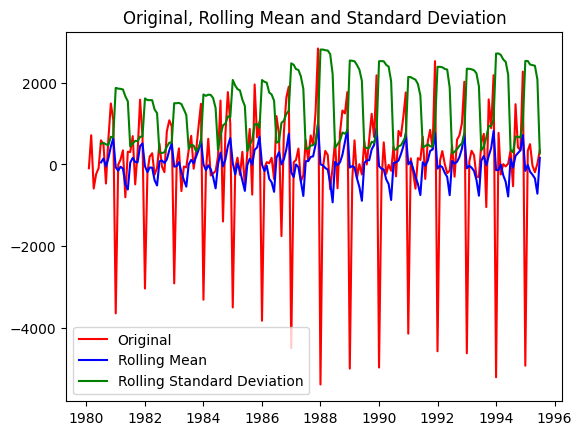

Results of ADFuller test - 
Test Statistic            -45.050301
p-value                     0.000000
# Lags used                10.000000
Number of Observations    175.000000
Critical Value (1%)        -3.468280
Critical Value (5%)        -2.878202
Critical Value (10%)       -2.575653
dtype: float64 



In [116]:
##
## Lets us take a difference of order of 1 and again perform ad_fuller test

test_for_stationarity_plot(spark1['Sparkling'].diff().dropna(), '6')
ADFuller_test_of_stationarity(spark1['Sparkling'].diff().dropna())


## Now the time_series p-value has sunk below 0.05, which means we are successfull in rejecting the null hypothesis.
## At difference of order 1, the time_series dataframe is stationary


## 6)Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Checking if the train dataframe is stationary or not, ACF and PACF

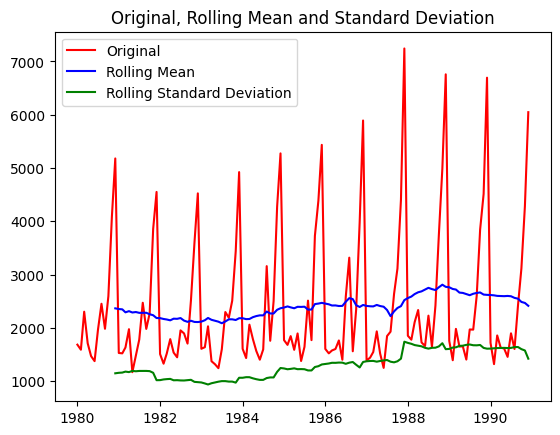

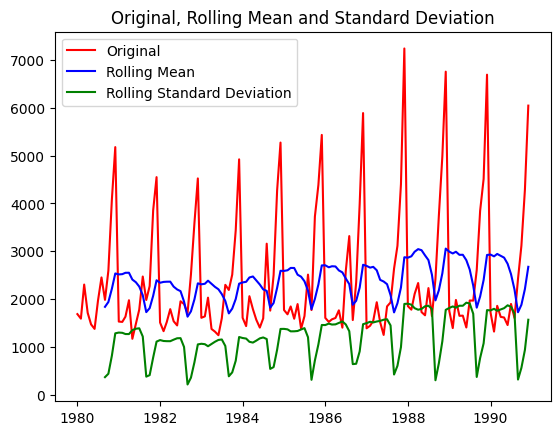

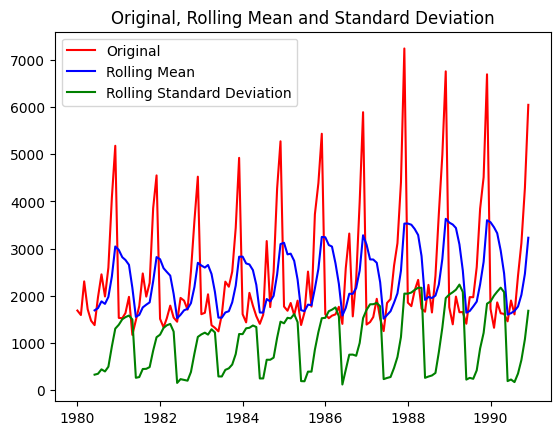

Results of ADFuller test - 
Test Statistic             -1.208926
p-value                     0.669744
# Lags used                12.000000
Number of Observations    119.000000
Critical Value (1%)        -3.486535
Critical Value (5%)        -2.886151
Critical Value (10%)       -2.579896
dtype: float64 



In [117]:
##
## checking the stationarity of the train dataframe

test_for_stationarity_plot(spark1_train['Sparkling'], '12')
test_for_stationarity_plot(spark1_train['Sparkling'], '9')
test_for_stationarity_plot(spark1_train['Sparkling'], '6')
ADFuller_test_of_stationarity(spark1_train['Sparkling'])


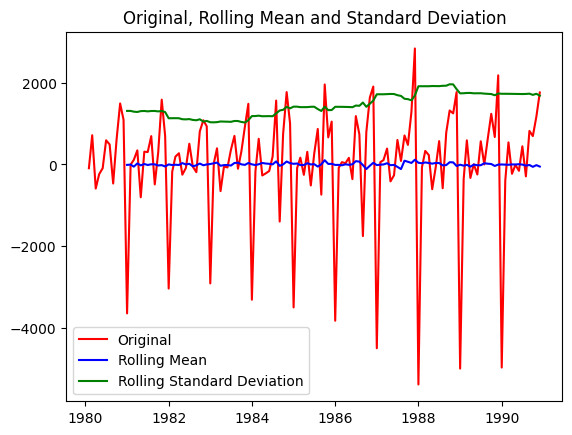

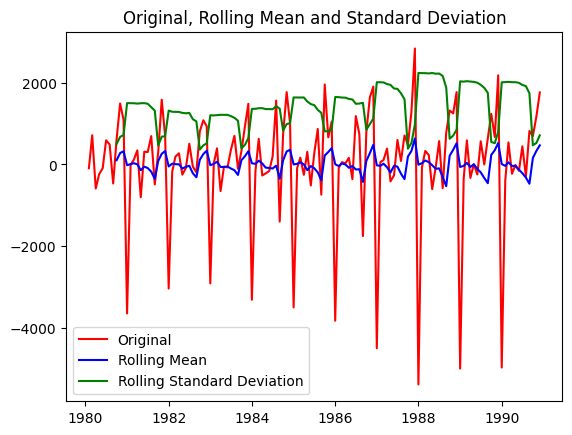

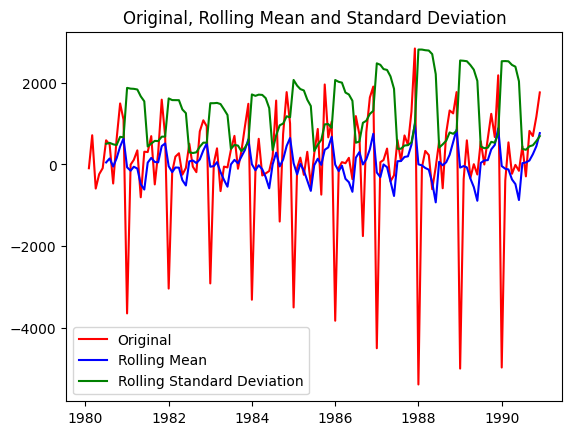

Results of ADFuller test - 
Test Statistic           -8.005007e+00
p-value                   2.280104e-12
# Lags used               1.100000e+01
Number of Observations    1.190000e+02
Critical Value (1%)      -3.486535e+00
Critical Value (5%)      -2.886151e+00
Critical Value (10%)     -2.579896e+00
dtype: float64 



In [118]:
##
## checking the stationarity of the train dataframe by taking differenciation of order 1

test_for_stationarity_plot(spark1_train['Sparkling'].diff().dropna(), '12')
test_for_stationarity_plot(spark1_train['Sparkling'].diff().dropna(), '9')
test_for_stationarity_plot(spark1_train['Sparkling'].diff().dropna(), '6')
ADFuller_test_of_stationarity(spark1_train['Sparkling'].diff().dropna())


## we can see that after taking a difference of order 1, stationarity has been achieved
## We are checking stationarity only for train dataframe, as ARIMA is built based on that.


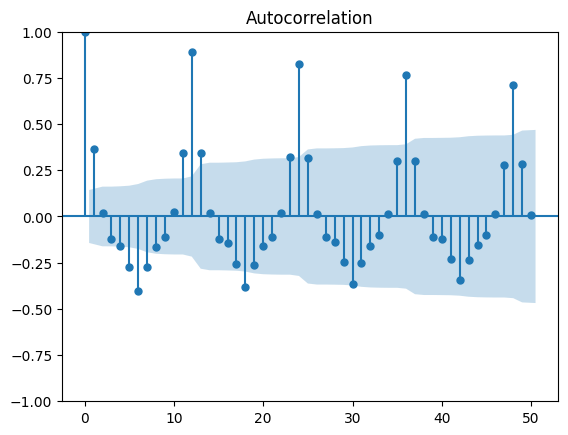

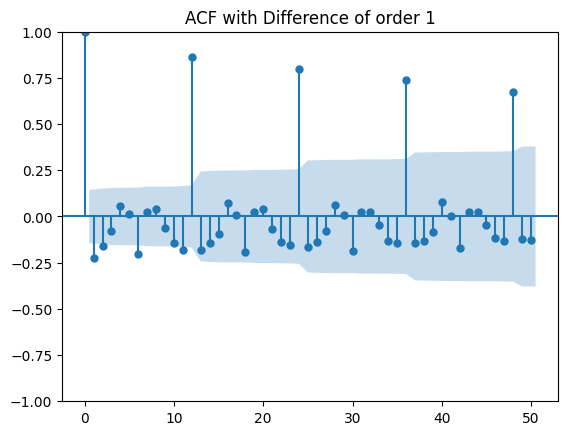

In [119]:
##
##

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(spark1['Sparkling'], lags = 50)
plot_acf(spark1['Sparkling'].diff().dropna(), lags = 50, title = 'ACF with Difference of order 1')
plt.show()

## Seasonality is definiately there in the dataframe


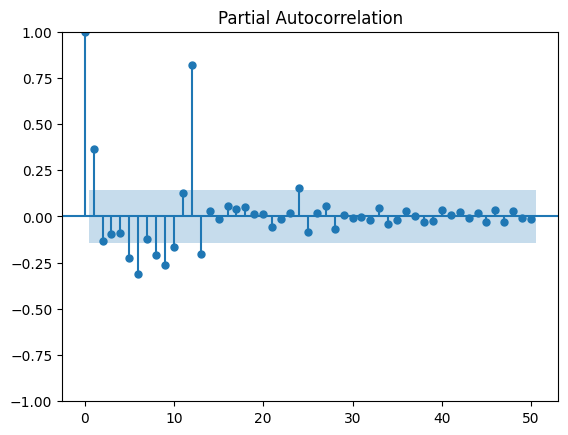

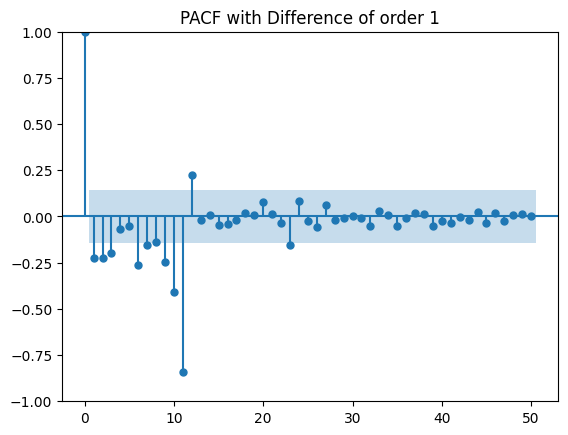

In [120]:
##
## pacf plot

plot_pacf(spark1['Sparkling'], lags = 50)
plot_pacf(spark1['Sparkling'].diff().dropna(), lags = 50, title = 'PACF with Difference of order 1')
plt.show()


## with the below plots, what we confirmed below seems to be a miss. seasonality does not seem to be *_*
## as clearly present
## but from the deocmposition we did at the start, we know there is seasonality with a value of 12



### Model: ARIMA

In [121]:
##
## The following loop helps us to get a combination of p and q, we are keeping d as 1 *_*
## since it took us a difference of order 1 to get the time series stationary


import itertools

p = q = range(0, 5)
d = range(1, 2)
pdq = list(itertools.product(p, d, q))

print('Some Parameter combinations - ')

for i in range(1, len(pdq)):
    print('Model: {}'.format(pdq[i]))



Some Parameter combinations - 
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [122]:
##
## lets create the hosting dataframe

arima_aic = pd.DataFrame(columns = ['Parameter', 'Akaike_Value'])
arima_aic

Empty DataFrame
Columns: [Parameter, Akaike_Value]
Index: []

In [123]:
##
## Now lets build the model based on the pdq variations we have

from statsmodels.tsa.arima.model import ARIMA


for parameter in pdq:
    arima_model = ARIMA(spark1_train['Sparkling'].values, order = parameter).fit()
    print('ARIMA{} - AIC : {}'.format(parameter, arima_model.aic))
    arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)



ARIMA(0, 1, 0) - AIC : 2267.6630357855465
ARIMA(0, 1, 1) - AIC : 2263.0600155919765
ARIMA(0, 1, 2) - AIC : 2234.4083231352784


<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)


ARIMA(0, 1, 3) - AIC : 2233.994857751357
ARIMA(0, 1, 4) - AIC : 2235.173736469605
ARIMA(1, 1, 0) - AIC : 2266.6085393190097


<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Para

ARIMA(1, 1, 1) - AIC : 2235.755094674255
ARIMA(1, 1, 2) - AIC : 2234.5272004518056


<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)


ARIMA(1, 1, 3) - AIC : 2235.607815816486


<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 4) - AIC : 2227.7369759577805
ARIMA(2, 1, 0) - AIC : 2260.36574396809
ARIMA(2, 1, 1) - AIC : 2233.777626238336


<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)


ARIMA(2, 1, 2) - AIC : 2213.5092125741553


<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)


ARIMA(2, 1, 3) - AIC : 2232.8129550828717
ARIMA(2, 1, 4) - AIC : 2222.9218323798623
ARIMA(3, 1, 0) - AIC : 2257.72337899794


<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)


ARIMA(3, 1, 1) - AIC : 2235.5004238522542


<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA para

ARIMA(3, 1, 2) - AIC : 2230.789978305661


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 3) - AIC : 2221.4573978076833


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)


ARIMA(3, 1, 4) - AIC : 2220.0076693662572
ARIMA(4, 1, 0) - AIC : 2259.7418413992673
ARIMA(4, 1, 1) - AIC : 2237.073057428225


<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-123

ARIMA(4, 1, 2) - AIC : 2233.090006837626
ARIMA(4, 1, 3) - AIC : 2222.9040973611823


<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 1, 4) - AIC : 2213.0368969498413


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-123-c01a9ba6f50f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)


In [124]:
##
## lets sort the values

arima_aic.sort_values(by = 'Akaike_Value', ascending = True)


Parameter  Akaike_Value
24  (4, 1, 4)   2213.036897
12  (2, 1, 2)   2213.509213
19  (3, 1, 4)   2220.007669
18  (3, 1, 3)   2221.457398
23  (4, 1, 3)   2222.904097
14  (2, 1, 4)   2222.921832
9   (1, 1, 4)   2227.736976
17  (3, 1, 2)   2230.789978
13  (2, 1, 3)   2232.812955
22  (4, 1, 2)   2233.090007
11  (2, 1, 1)   2233.777626
3   (0, 1, 3)   2233.994858
2   (0, 1, 2)   2234.408323
7   (1, 1, 2)   2234.527200
4   (0, 1, 4)   2235.173736
16  (3, 1, 1)   2235.500424
8   (1, 1, 3)   2235.607816
6   (1, 1, 1)   2235.755095
21  (4, 1, 1)   2237.073057
15  (3, 1, 0)   2257.723379
20  (4, 1, 0)   2259.741841
10  (2, 1, 0)   2260.365744
1   (0, 1, 1)   2263.060016
5   (1, 1, 0)   2266.608539
0   (0, 1, 0)   2267.663036

In [125]:
##
## now let us run the model using the pdq values that we have
## i am runnig the model with pdq as 2, 1, 2 since 4, 1, 4 though is marginally better shows how little they contribute.


auto_arima = ARIMA(spark1_train['Sparkling'], order = (2, 1, 2), freq = 'MS')

results_auto_arima = auto_arima.fit()

print(results_auto_arima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 09 Dec 2023   AIC                           2213.509
Time:                        03:35:24   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.215      0.0

In [126]:
##
## Prediction on the test dataframe using model built


predicted_auto_arima = results_auto_arima.forecast(steps = len(spark1_test['Sparkling']))



In [127]:
##
## Now that we have the predictions, lets find the RMSE


from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(spark1_test['Sparkling'], predicted_auto_arima, squared = False)


In [128]:
##
##

rmse

1299.9797494286825

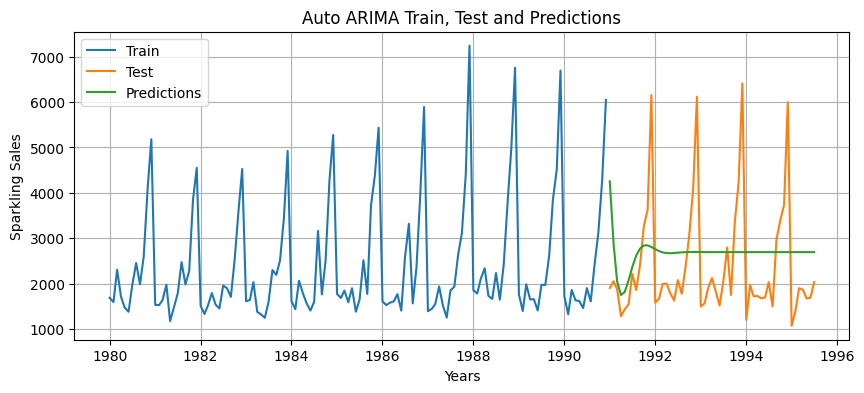

In [129]:
##
## Lets now plot the dataset

plt.figure(figsize = (10, 4))
plt.plot(spark1_train['Sparkling'], label = 'Train')
plt.plot(spark1_test['Sparkling'], label = 'Test')
plt.plot(predicted_auto_arima, label = 'Predictions')
plt.title("Auto ARIMA Train, Test and Predictions")
plt.grid()
plt.xlabel('Years')
plt.ylabel('Sparkling Sales')
plt.legend(loc = 'best')
plt.show()

In [130]:
##
## Now lets add the values to the results dataframe that we have setup

arima_temp = pd.DataFrame({'Root Mean Square Error': [rmse],
                           'Model': 'ARIMA_with_p_2_d_1_q_2'})

Results = pd.concat([Results, arima_temp])

In [131]:
##
##

Results.head(20)

Model  Root Mean Square Error
0                                  Linear Regression             1389.135000
0                Moving_Average_Trailing_by_2_points              813.401000
1                Moving_Average_Trailing_by_4_points             1156.590000
2                Moving_Average_Trailing_by_6_points             1283.927000
3                Moving_Average_Trailing_by_9_points             1346.278000
4               Moving_Average_Trailing_by_12_points             1267.925000
5               Moving_Average_Trailing_by_15_points             1173.813000
0            Simple_Exponentail_Smoothing_Alpha_0.03             1304.927000
0             Simple_Exponentail_Smoothing_Alpha_0.3             1935.507000
0  Double_Exponentail_Smoothing_Alpha_0.68_Beta_9...             2007.239000
0    Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3            18259.111000
0  Triple_Exponentail_Smoothing_Alpha_0.11_Beta_0...              403.706000
0  Triple_Exponential_Smoothing_Alpha_0.3_Beta_0....              361.397000
0                                        Naive_Model             3864.279000
0                             ARIMA_with_p_2_d_1_q_2             1299.979749

### Model: SARIMA


In [132]:
##
##

p = q = range(0, 5)
d = range(1, 2)
D = range(0, 2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]

print(' Some Parameter Combinations: ')

for i in range(1, len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))




 Some Parameter Combinations: 
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (0, 1, 4)(0, 0, 4, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 4)(0, 1, 4, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 4)(1, 0, 4, 12)
Model: (3, 1, 0)(1, 1, 0, 12)
Model: (3, 1, 1)(1, 1, 1, 12)
Model: (3, 1, 2)(1, 1, 2, 12)
Model: (3, 1, 3)(1, 1, 3, 12)
Model: (3, 1, 4)(1, 1, 4, 12)
Model: (4, 1, 0)(2, 0, 0, 12)
Model: (4, 1, 1)(2, 0, 1, 12)
Model: (4, 1, 2)(2, 0, 2, 12)
Model: (4, 1, 3)(2, 0, 3, 12)
Model: (4, 1, 4)(2, 0, 4, 12)


In [133]:
##
##

sarima_aic = pd.DataFrame(columns = ['Parameter', 'Seasonality', 'Akaike_Value'])
sarima_aic



Empty DataFrame
Columns: [Parameter, Seasonality, Akaike_Value]
Index: []

In [134]:
##
##


import statsmodels.api as sm


for parameter in pdq:
    for seasonality in model_pdq:
        sarima_model = sm.tsa.statespace.SARIMAX(spark1_train['Sparkling'].values,
                                                order = parameter,
                                                seasonal_order = seasonality,
                                                enforce_stationarity = False,
                                                enforce_invertibility = False)

        results_sarima = sarima_model.fit(maxiter = 1000)
        print('SARIMA{}X{} - AIC: {}'.format(parameter, seasonality, results_sarima.aic))
        sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)



SARIMA(0, 1, 0)X(0, 0, 0, 12) - AIC: 2251.3597196862966
SARIMA(0, 1, 0)X(0, 0, 1, 12) - AIC: 1956.2614616844573


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(0, 0, 2, 12) - AIC: 1723.153364023447


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 0)X(0, 0, 3, 12) - AIC: 4047.750993647416
SARIMA(0, 1, 0)X(0, 0, 4, 12) - AIC: 1307.2718951083937
SARIMA(0, 1, 0)X(0, 1, 0, 12) - AIC: 1822.982485206384


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(0, 1, 1, 12) - AIC: 1626.8626334678765


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(0, 1, 2, 12) - AIC: 1452.6773574251724


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)X(0, 1, 3, 12) - AIC: 3389.2144224403132


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)X(0, 1, 4, 12) - AIC: 1090.076172085995
SARIMA(0, 1, 0)X(1, 0, 0, 12) - AIC: 1837.4366022456677


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(1, 0, 1, 12) - AIC: 1806.990530138882


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(1, 0, 2, 12) - AIC: 1633.2108735791837


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 0)X(1, 0, 3, 12) - AIC: 4198.7747798418895
SARIMA(0, 1, 0)X(1, 0, 4, 12) - AIC: 1276.6279769090618
SARIMA(0, 1, 0)X(1, 1, 0, 12) - AIC: 1646.3778167661442


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(1, 1, 1, 12) - AIC: 1628.3243908187383


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(1, 1, 2, 12) - AIC: 1454.5289621307488


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 0)X(1, 1, 3, 12) - AIC: 2897.563863156753
SARIMA(0, 1, 0)X(1, 1, 4, 12) - AIC: 1086.7932911141042
SARIMA(0, 1, 0)X(2, 0, 0, 12) - AIC: 1648.3776153470858


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(2, 0, 1, 12) - AIC: 1647.2054158613616


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(2, 0, 2, 12) - AIC: 1630.9898053920804


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 0)X(2, 0, 3, 12) - AIC: 3534.298287308879
SARIMA(0, 1, 0)X(2, 0, 4, 12) - AIC: 1272.854773338738
SARIMA(0, 1, 0)X(2, 1, 0, 12) - AIC: 1466.6211360755017


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(2, 1, 1, 12) - AIC: 1468.500098186658


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(2, 1, 2, 12) - AIC: 1455.9911553654454


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 0)X(2, 1, 3, 12) - AIC: 3103.8942826970383
SARIMA(0, 1, 0)X(2, 1, 4, 12) - AIC: 1091.3264285172722
SARIMA(0, 1, 0)X(3, 0, 0, 12) - AIC: 1467.4574095308406


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(3, 0, 1, 12) - AIC: 1469.1871052625634


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(3, 0, 2, 12) - AIC: 1471.0594530064295


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 0)X(3, 0, 3, 12) - AIC: 1660.0206716336645
SARIMA(0, 1, 0)X(3, 0, 4, 12) - AIC: 1273.7609413056337
SARIMA(0, 1, 0)X(3, 1, 0, 12) - AIC: 1289.239819743992


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(3, 1, 1, 12) - AIC: 1291.2448875094396


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(3, 1, 2, 12) - AIC: 1288.6070380283952


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 0)X(3, 1, 3, 12) - AIC: 3065.795629435008
SARIMA(0, 1, 0)X(3, 1, 4, 12) - AIC: 1091.1691880935177


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(4, 0, 0, 12) - AIC: 1289.523636142718


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(4, 0, 1, 12) - AIC: 1291.5136924963303


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(4, 0, 2, 12) - AIC: 1289.187593793388


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 0)X(4, 0, 3, 12) - AIC: 2782.5198906687324
SARIMA(0, 1, 0)X(4, 0, 4, 12) - AIC: 1275.4693434083852


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(4, 1, 0, 12) - AIC: 1105.7417371769675


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(4, 1, 1, 12) - AIC: 1107.6019093259788


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(4, 1, 2, 12) - AIC: 1102.6050372797417


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)X(4, 1, 3, 12) - AIC: 2981.283437169737


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)X(4, 1, 4, 12) - AIC: 1092.9817725184214
SARIMA(0, 1, 1)X(0, 0, 0, 12) - AIC: 2230.162907850583


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(0, 0, 1, 12) - AIC: 1923.7688649566603


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(0, 0, 2, 12) - AIC: 1692.7089572783755


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(0, 0, 3, 12) - AIC: 3276.943173168113


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)X(0, 0, 4, 12) - AIC: 1275.2879407271578
SARIMA(0, 1, 1)X(0, 1, 0, 12) - AIC: 1760.6565719828463


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(0, 1, 1, 12) - AIC: 1569.6639234229956


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(0, 1, 2, 12) - AIC: 1399.1083846679549


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 1)X(0, 1, 3, 12) - AIC: 3616.479208798984
SARIMA(0, 1, 1)X(0, 1, 4, 12) - AIC: 1053.146166876223
SARIMA(0, 1, 1)X(1, 0, 0, 12) - AIC: 1797.179588183827


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(1, 0, 1, 12) - AIC: 1738.0903193744662


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(1, 0, 2, 12) - AIC: 1570.1509144550118


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)X(1, 0, 3, 12) - AIC: 3799.5363478099143


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)X(1, 0, 4, 12) - AIC: 1230.8876658305824


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(1, 1, 0, 12) - AIC: 1602.8594819023835


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(1, 1, 1, 12) - AIC: 1570.8550259195529


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(1, 1, 2, 12) - AIC: 1400.6709524137798


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(1, 1, 3, 12) - AIC: 3240.55690611188


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)X(1, 1, 4, 12) - AIC: 1050.3860234075626


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(2, 0, 0, 12) - AIC: 1605.675195417545


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(2, 0, 1, 12) - AIC: 1599.2245085437517


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(2, 0, 2, 12) - AIC: 1570.4018823125118


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 1)X(2, 0, 3, 12) - AIC: 3189.9386830433173
SARIMA(0, 1, 1)X(2, 0, 4, 12) - AIC: 1227.2147505196854


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(2, 1, 0, 12) - AIC: 1428.2448811088411


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(2, 1, 1, 12) - AIC: 1429.6168027963645


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(2, 1, 2, 12) - AIC: 1402.638588853176


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 1)X(2, 1, 3, 12) - AIC: 3902.0852933271894
SARIMA(0, 1, 1)X(2, 1, 4, 12) - AIC: 1053.9767505506902


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(3, 0, 0, 12) - AIC: 1428.4607679617193


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(3, 0, 1, 12) - AIC: 1428.8727984071902


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(3, 0, 2, 12) - AIC: 1429.589189125368


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 1)X(3, 0, 3, 12) - AIC: 3023.8301891730507
SARIMA(0, 1, 1)X(3, 0, 4, 12) - AIC: 1228.2681433530818


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(3, 1, 0, 12) - AIC: 1255.5784542932172


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(3, 1, 1, 12) - AIC: 1257.4558568591235


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(3, 1, 2, 12) - AIC: 1258.2925125564684


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)X(3, 1, 3, 12) - AIC: 3831.6685837677073


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)X(3, 1, 4, 12) - AIC: 1055.6991250281133


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(4, 0, 0, 12) - AIC: 1253.5353815305568


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(4, 0, 1, 12) - AIC: 1255.4740909399084


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(4, 0, 2, 12) - AIC: 1257.5099106050402


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(4, 0, 3, 12) - AIC: 2876.8054997676923


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)X(4, 0, 4, 12) - AIC: 1229.0285515078979


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(4, 1, 0, 12) - AIC: 1081.6086501677771


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(4, 1, 1, 12) - AIC: 1079.5030711776221


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(4, 1, 2, 12) - AIC: 1081.707494250279


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)X(4, 1, 3, 12) - AIC: 2681.8943473829963


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)X(4, 1, 4, 12) - AIC: 1055.1012249088853
SARIMA(0, 1, 2)X(0, 0, 0, 12) - AIC: 2187.4410101687213


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(0, 0, 1, 12) - AIC: 1887.91280072004


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(0, 0, 2, 12) - AIC: 1659.8789890551836


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 2)X(0, 0, 3, 12) - AIC: 6284.123732030959
SARIMA(0, 1, 2)X(0, 0, 4, 12) - AIC: 1251.0339157296535
SARIMA(0, 1, 2)X(0, 1, 0, 12) - AIC: 1741.3207220431827


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(0, 1, 1, 12) - AIC: 1554.7429039622775


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(0, 1, 2, 12) - AIC: 1382.484254078479


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(0, 1, 3, 12) - AIC: 3327.635517429523


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)X(0, 1, 4, 12) - AIC: 1036.7912530127633


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(1, 0, 0, 12) - AIC: 1790.0326332300617


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(1, 0, 1, 12) - AIC: 1724.1675071384861


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(1, 0, 2, 12) - AIC: 1557.1605068255703


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(1, 0, 3, 12) - AIC: 3432.34023261305


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)X(1, 0, 4, 12) - AIC: 1216.586074074662


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(1, 1, 0, 12) - AIC: 1601.7587293001163


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(1, 1, 1, 12) - AIC: 1556.1559716212305


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(1, 1, 2, 12) - AIC: 1384.3988672019505


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 2)X(1, 1, 3, 12) - AIC: 3249.3881399275024
SARIMA(0, 1, 2)X(1, 1, 4, 12) - AIC: 1034.206116744272


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(2, 0, 0, 12) - AIC: 1603.9654774532562


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(2, 0, 1, 12) - AIC: 1600.5438838382508


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(2, 0, 2, 12) - AIC: 1557.1215626972148


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 2)X(2, 0, 3, 12) - AIC: 3804.6447824360425
SARIMA(0, 1, 2)X(2, 0, 4, 12) - AIC: 1213.551479344134


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(2, 1, 0, 12) - AIC: 1427.0773416528766


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(2, 1, 1, 12) - AIC: 1428.5534767508834


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(2, 1, 2, 12) - AIC: 1386.0237342744488


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(2, 1, 3, 12) - AIC: 6098.457006139854


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)X(2, 1, 4, 12) - AIC: 1038.310377600336


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(3, 0, 0, 12) - AIC: 1428.5993407961116


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(3, 0, 1, 12) - AIC: 1429.7448370672455


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(3, 0, 2, 12) - AIC: 1430.688383548872


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 2)X(3, 0, 3, 12) - AIC: 3322.205726843127
SARIMA(0, 1, 2)X(3, 0, 4, 12) - AIC: 1213.285040042057


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(3, 1, 0, 12) - AIC: 1254.6525579265501


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(3, 1, 1, 12) - AIC: 1256.98666340235


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(3, 1, 2, 12) - AIC: 1257.4253258721528


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(3, 1, 3, 12) - AIC: 3301.2130532933197


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)X(3, 1, 4, 12) - AIC: 1040.0102255658678


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(4, 0, 0, 12) - AIC: 1254.6863903741876


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(4, 0, 1, 12) - AIC: 1256.6785128717243


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(4, 0, 2, 12) - AIC: 1258.6204321581172


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)X(4, 0, 3, 12) - AIC: 3199.7537484006816


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)X(4, 0, 4, 12) - AIC: 1215.6167213798537


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(4, 1, 0, 12) - AIC: 1080.1576529701206


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(4, 1, 1, 12) - AIC: 1077.8255797454592


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(4, 1, 2, 12) - AIC: 1081.4726735786433


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)X(4, 1, 3, 12) - AIC: 2901.1175135498675


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)X(4, 1, 4, 12) - AIC: 1035.8828786224026
SARIMA(0, 1, 3)X(0, 0, 0, 12) - AIC: 2168.092540844411


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(0, 0, 1, 12) - AIC: 1873.9770692090997


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(0, 0, 2, 12) - AIC: 1643.2973661747255


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(0, 0, 3, 12) - AIC: 6636.765801822946


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)X(0, 0, 4, 12) - AIC: 1239.0451097012458


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(0, 1, 0, 12) - AIC: 1727.2607378275559


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(0, 1, 1, 12) - AIC: 1540.794818431291


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(0, 1, 2, 12) - AIC: 1369.9603671034643


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)X(0, 1, 3, 12) - AIC: 3592.379434245709


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)X(0, 1, 4, 12) - AIC: 1024.356116150002


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(1, 0, 0, 12) - AIC: 1792.035952510638


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(1, 0, 1, 12) - AIC: 1710.6404080365744


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(1, 0, 2, 12) - AIC: 1542.7418986067191


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 3)X(1, 0, 3, 12) - AIC: 3653.7269785769613
SARIMA(0, 1, 3)X(1, 0, 4, 12) - AIC: 1203.1088364411248


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(1, 1, 0, 12) - AIC: 1602.1924100608728


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(1, 1, 1, 12) - AIC: 1542.6814540471319


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(1, 1, 2, 12) - AIC: 1371.736327140463


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)X(1, 1, 3, 12) - AIC: 3707.2278946057468


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)X(1, 1, 4, 12) - AIC: 1020.9478019113087


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(2, 0, 0, 12) - AIC: 1604.571580753606


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(2, 0, 1, 12) - AIC: 1601.067482215995


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(2, 0, 2, 12) - AIC: 1543.0488935642227


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 3)X(2, 0, 3, 12) - AIC: 2629.5394660769666
SARIMA(0, 1, 3)X(2, 0, 4, 12) - AIC: 1200.3372495579551


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(2, 1, 0, 12) - AIC: 1428.3896856876856


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(2, 1, 1, 12) - AIC: 1429.8265181250042


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(2, 1, 2, 12) - AIC: 1373.4524731838692


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)X(2, 1, 3, 12) - AIC: 101.21433341194584


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)X(2, 1, 4, 12) - AIC: 1026.0386936146367


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(3, 0, 0, 12) - AIC: 1429.6529426953575


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(3, 0, 1, 12) - AIC: 1441.1435175023973


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(3, 0, 2, 12) - AIC: 1431.0415242619088


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)X(3, 0, 3, 12) - AIC: 2369.8252315425707


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)X(3, 0, 4, 12) - AIC: 1202.1069855285548


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(3, 1, 0, 12) - AIC: 1256.002028109912


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(3, 1, 1, 12) - AIC: 1258.0747613576114


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(3, 1, 2, 12) - AIC: 1258.9452629524521


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(3, 1, 3, 12) - AIC: 3376.9079007487453


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)X(3, 1, 4, 12) - AIC: 1027.8350519112114


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(4, 0, 0, 12) - AIC: 1255.3274846639038


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(4, 0, 1, 12) - AIC: 1257.3085587400528


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(4, 0, 2, 12) - AIC: 1259.5937295575507


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)X(4, 0, 3, 12) - AIC: 3393.62715513712


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)X(4, 0, 4, 12) - AIC: 1202.9020779126179


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(4, 1, 0, 12) - AIC: 1081.705597635839


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(4, 1, 1, 12) - AIC: 1079.7225013399911


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(4, 1, 2, 12) - AIC: 1083.1749568433775


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)X(4, 1, 3, 12) - AIC: 2444.23577877717


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)X(4, 1, 4, 12) - AIC: 1023.0418127350888
SARIMA(0, 1, 4)X(0, 0, 0, 12) - AIC: 2153.076551153486


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(0, 0, 1, 12) - AIC: 1860.6759305347312


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(0, 0, 2, 12) - AIC: 1630.4699915021363


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 4)X(0, 0, 3, 12) - AIC: 1262.310535028646
SARIMA(0, 1, 4)X(0, 0, 4, 12) - AIC: 1226.9308537821212


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(0, 1, 0, 12) - AIC: 1714.188317875131


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(0, 1, 1, 12) - AIC: 1528.4392954625228


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(0, 1, 2, 12) - AIC: 1356.2358580871928


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 4)X(0, 1, 3, 12) - AIC: 2885.7231271641904


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)X(0, 1, 4, 12) - AIC: 1010.7942575234904


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(1, 0, 0, 12) - AIC: 1793.9865664358083


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(1, 0, 1, 12) - AIC: 1698.6817746319155


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(1, 0, 2, 12) - AIC: 1530.2479338861074


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 4)X(1, 0, 3, 12) - AIC: 3357.937453277428
SARIMA(0, 1, 4)X(1, 0, 4, 12) - AIC: 1190.4894130773043


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(1, 1, 0, 12) - AIC: 1603.515701428689


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(1, 1, 1, 12) - AIC: 1530.0906125216716


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(1, 1, 2, 12) - AIC: 1357.904440429813


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(1, 1, 3, 12) - AIC: 2695.9617544193216


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)X(1, 1, 4, 12) - AIC: 1008.6696537418565


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(2, 0, 0, 12) - AIC: 1605.69378805529


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(2, 0, 1, 12) - AIC: 1602.7617976914573


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(2, 0, 2, 12) - AIC: 1530.7631439757977


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 4)X(2, 0, 3, 12) - AIC: 3855.0355370286975
SARIMA(0, 1, 4)X(2, 0, 4, 12) - AIC: 1188.2605536489389


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(2, 1, 0, 12) - AIC: 1428.4293404676757


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(2, 1, 1, 12) - AIC: 1430.2040627835224


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(2, 1, 2, 12) - AIC: 1359.55924080215


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 4)X(2, 1, 3, 12) - AIC: 4292.1866989503305


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)X(2, 1, 4, 12) - AIC: 1011.1170885546492


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(3, 0, 0, 12) - AIC: 1429.798116177156


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(3, 0, 1, 12) - AIC: 1431.2579018120502


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(3, 0, 2, 12) - AIC: 1432.550863344608


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 4)X(3, 0, 3, 12) - AIC: 1214.0259646704799
SARIMA(0, 1, 4)X(3, 0, 4, 12) - AIC: 1190.024029729344


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(3, 1, 0, 12) - AIC: 1257.1773441407202


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(3, 1, 1, 12) - AIC: 1259.0984690135529


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(3, 1, 2, 12) - AIC: 1259.7536596849077


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 4)X(3, 1, 3, 12) - AIC: 3491.144540109394


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)X(3, 1, 4, 12) - AIC: 1014.2159388100346


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(4, 0, 0, 12) - AIC: 1256.9163065362961


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(4, 0, 1, 12) - AIC: 1258.9160850750884


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(4, 0, 2, 12) - AIC: 1261.1466840306828


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 4)X(4, 0, 3, 12) - AIC: 1866.5452259696426


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)X(4, 0, 4, 12) - AIC: 1189.7279096359175


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(4, 1, 0, 12) - AIC: 1083.0604002963735


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(4, 1, 1, 12) - AIC: 1081.0265829376667


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(4, 1, 2, 12) - AIC: 1083.8285649622414


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 4)X(4, 1, 3, 12) - AIC: 2908.6752876349456


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)X(4, 1, 4, 12) - AIC: 1011.0223009831169
SARIMA(1, 1, 0)X(0, 0, 0, 12) - AIC: 2250.3181267386713
SARIMA(1, 1, 0)X(0, 0, 1, 12) - AIC: 1954.3938339903289


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(0, 0, 2, 12) - AIC: 1721.268847635434


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(0, 0, 3, 12) - AIC: 2971.8271863301106


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)X(0, 0, 4, 12) - AIC: 1304.345717649847
SARIMA(1, 1, 0)X(0, 1, 0, 12) - AIC: 1810.9513015567377


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(0, 1, 1, 12) - AIC: 1613.7407033410198


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(0, 1, 2, 12) - AIC: 1441.4259994234092


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)X(0, 1, 3, 12) - AIC: 3177.7873364635716


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)X(0, 1, 4, 12) - AIC: 1085.0892458535989


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(1, 0, 0, 12) - AIC: 1811.2440279330658


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(1, 0, 1, 12) - AIC: 1788.534359458687


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(1, 0, 2, 12) - AIC: 1616.4894402580412


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 0)X(1, 0, 3, 12) - AIC: 4392.161515442373
SARIMA(1, 1, 0)X(1, 0, 4, 12) - AIC: 1268.2969016288073
SARIMA(1, 1, 0)X(1, 1, 0, 12) - AIC: 1619.6703363508145


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(1, 1, 1, 12) - AIC: 1615.7404485214083


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(1, 1, 2, 12) - AIC: 1443.1035528176606


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 0)X(1, 1, 3, 12) - AIC: 3946.432530930384
SARIMA(1, 1, 0)X(1, 1, 4, 12) - AIC: 1081.931430987376


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(2, 0, 0, 12) - AIC: 1621.6355080128674


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(2, 0, 1, 12) - AIC: 1617.1356132615317


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(2, 0, 2, 12) - AIC: 1616.5412067521577


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 0)X(2, 0, 3, 12) - AIC: 3400.165402506868
SARIMA(1, 1, 0)X(2, 0, 4, 12) - AIC: 1264.4526201552071


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(2, 1, 0, 12) - AIC: 1440.574162809955


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(2, 1, 1, 12) - AIC: 1442.5059371252378


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(2, 1, 2, 12) - AIC: 1444.4274245939591


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 0)X(2, 1, 3, 12) - AIC: 2473.573682664527
SARIMA(1, 1, 0)X(2, 1, 4, 12) - AIC: 1084.5864785420547


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(3, 0, 0, 12) - AIC: 1440.5134640390056


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(3, 0, 1, 12) - AIC: 1442.171978029332


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(3, 0, 2, 12) - AIC: 1443.766039380704


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 0)X(3, 0, 3, 12) - AIC: 3230.9087583856167
SARIMA(1, 1, 0)X(3, 0, 4, 12) - AIC: 1262.3911368486754


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(3, 1, 0, 12) - AIC: 1265.174764470474


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(3, 1, 1, 12) - AIC: 1267.1592027274482


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(3, 1, 2, 12) - AIC: 1263.9849695574756


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 0)X(3, 1, 3, 12) - AIC: 3355.7094629898393
SARIMA(1, 1, 0)X(3, 1, 4, 12) - AIC: 1085.2890452590436


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(4, 0, 0, 12) - AIC: 1264.1284440767404


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(4, 0, 1, 12) - AIC: 1262.4714499618433


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(4, 0, 2, 12) - AIC: 1264.4683063088728


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)X(4, 0, 3, 12) - AIC: 2813.1545259556706


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)X(4, 0, 4, 12) - AIC: 1264.358110573622


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(4, 1, 0, 12) - AIC: 1085.1433945090996


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(4, 1, 1, 12) - AIC: 1087.0744067871954


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(4, 1, 2, 12) - AIC: 1086.9620695796004


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)X(4, 1, 3, 12) - AIC: 3055.4741272496985


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)X(4, 1, 4, 12) - AIC: 1085.9321248197207
SARIMA(1, 1, 1)X(0, 0, 0, 12) - AIC: 2204.9340491545618


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(0, 0, 1, 12) - AIC: 1907.355897412228


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(0, 0, 2, 12) - AIC: 1678.0981352607707


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(0, 0, 3, 12) - AIC: 12.0


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)X(0, 0, 4, 12) - AIC: 1290.9397374032005
SARIMA(1, 1, 1)X(0, 1, 0, 12) - AIC: 1757.3654162744688


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(0, 1, 1, 12) - AIC: 1569.3827366812784


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(0, 1, 2, 12) - AIC: 1398.7561672221486


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 1)X(0, 1, 3, 12) - AIC: 3362.8660144244845
SARIMA(1, 1, 1)X(0, 1, 4, 12) - AIC: 1051.5498032119767


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(1, 0, 0, 12) - AIC: 1775.142446652882


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(1, 0, 1, 12) - AIC: 1739.5449249296978


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(1, 0, 2, 12) - AIC: 1571.3248863526987


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 1)X(1, 0, 3, 12) - AIC: 5573.375014604341
SARIMA(1, 1, 1)X(1, 0, 4, 12) - AIC: 1231.404360233173


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(1, 1, 0, 12) - AIC: 1588.0655672689222


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(1, 1, 1, 12) - AIC: 1570.672464457909


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(1, 1, 2, 12) - AIC: 1400.4523886147072


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)X(1, 1, 3, 12) - AIC: 2882.8413039209836


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)X(1, 1, 4, 12) - AIC: 1049.248658480376


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(2, 0, 0, 12) - AIC: 1590.616160687459


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(2, 0, 1, 12) - AIC: 1586.3140614241731


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(2, 0, 2, 12) - AIC: 1571.8069984366607


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)X(2, 0, 3, 12) - AIC: 3252.094810832675


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)X(2, 0, 4, 12) - AIC: 1228.5812002950513


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(2, 1, 0, 12) - AIC: 1413.5679859609463


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(2, 1, 1, 12) - AIC: 1414.8736681603777


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(2, 1, 2, 12) - AIC: 1402.273267280232


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)X(2, 1, 3, 12) - AIC: 921.0789694131773


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)X(2, 1, 4, 12) - AIC: 1052.548968875524


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(3, 0, 0, 12) - AIC: 1414.911207404006


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(3, 0, 1, 12) - AIC: 1415.9502486595763


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(3, 0, 2, 12) - AIC: 1417.090327836689


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)X(3, 0, 3, 12) - AIC: 3093.7689481618604


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)X(3, 0, 4, 12) - AIC: 1229.4556254557883


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(3, 1, 0, 12) - AIC: 1240.8275546124696


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(3, 1, 1, 12) - AIC: 1242.6640988944237


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(3, 1, 2, 12) - AIC: 1243.1145005399644


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)X(3, 1, 3, 12) - AIC: 3447.1850467876898


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)X(3, 1, 4, 12) - AIC: 1054.2730490137126


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(4, 0, 0, 12) - AIC: 1240.689035788374


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(4, 0, 1, 12) - AIC: 1242.6873636538553


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(4, 0, 2, 12) - AIC: 1244.6873158138844


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)X(4, 0, 3, 12) - AIC: 2801.6532446261003


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)X(4, 0, 4, 12) - AIC: 1229.0975125354457


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(4, 1, 0, 12) - AIC: 1066.377859846348


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(4, 1, 1, 12) - AIC: 1063.541096929793


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(4, 1, 2, 12) - AIC: 1067.451981289134


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(4, 1, 3, 12) - AIC: 2892.8350225900836


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)X(4, 1, 4, 12) - AIC: 1055.2523318832207
SARIMA(1, 1, 2)X(0, 0, 0, 12) - AIC: 2188.463345050468


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(0, 0, 1, 12) - AIC: 1889.7708307502326


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(0, 0, 2, 12) - AIC: 1659.6291421748363


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 2)X(0, 0, 3, 12) - AIC: 6283.676373329767
SARIMA(1, 1, 2)X(0, 0, 4, 12) - AIC: 1252.2535058885753


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(0, 1, 0, 12) - AIC: 1742.7366275443105


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(0, 1, 1, 12) - AIC: 1554.9584139016756


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(0, 1, 2, 12) - AIC: 1382.3477800332557


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)X(0, 1, 3, 12) - AIC: 3219.027823421915


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)X(0, 1, 4, 12) - AIC: 1036.157385136235


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(1, 0, 0, 12) - AIC: 1771.8259802510556


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(1, 0, 1, 12) - AIC: 1723.987186015647


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(1, 0, 2, 12) - AIC: 1555.584247263976


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 2)X(1, 0, 3, 12) - AIC: 3582.6198123902823
SARIMA(1, 1, 2)X(1, 0, 4, 12) - AIC: 1215.148259972984


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(1, 1, 0, 12) - AIC: 1585.7860900921346


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(1, 1, 1, 12) - AIC: 1556.1300441715719


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(1, 1, 2, 12) - AIC: 1384.1378738621952


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)X(1, 1, 3, 12) - AIC: 3106.2978206410403


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)X(1, 1, 4, 12) - AIC: 1034.4692175066716


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(2, 0, 0, 12) - AIC: 1588.4227861526329


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(2, 0, 1, 12) - AIC: 1585.5115793263108


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(2, 0, 2, 12) - AIC: 1555.9345629223185


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 2)X(2, 0, 3, 12) - AIC: 4054.98505417388
SARIMA(1, 1, 2)X(2, 0, 4, 12) - AIC: 1213.9612461458905


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(2, 1, 0, 12) - AIC: 1411.9924109675142


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(2, 1, 1, 12) - AIC: 1413.5918294469584


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(2, 1, 2, 12) - AIC: 1385.6887207877091


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)X(2, 1, 3, 12) - AIC: 2934.3822706621067


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)X(2, 1, 4, 12) - AIC: 1035.5623180481148


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(3, 0, 0, 12) - AIC: 1413.8102395610183


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(3, 0, 1, 12) - AIC: 1414.9146977133305


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(3, 0, 2, 12) - AIC: 1415.9690313638202


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 2)X(3, 0, 3, 12) - AIC: 3882.8178048915415
SARIMA(1, 1, 2)X(3, 0, 4, 12) - AIC: 1214.9618232184255


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(3, 1, 0, 12) - AIC: 1240.439793941226


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(3, 1, 1, 12) - AIC: 1242.3340377996963


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(3, 1, 2, 12) - AIC: 1242.9811908134984


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)X(3, 1, 3, 12) - AIC: 3780.4525176986754


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)X(3, 1, 4, 12) - AIC: 1034.5608632632327


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(4, 0, 0, 12) - AIC: 1239.4871141022263


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(4, 0, 1, 12) - AIC: 1244.7003603873948


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(4, 0, 2, 12) - AIC: 1243.414896339201


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)X(4, 0, 3, 12) - AIC: 3377.636733904198


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)X(4, 0, 4, 12) - AIC: 1216.4615319711297


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(4, 1, 0, 12) - AIC: 1066.0815204696576


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(4, 1, 1, 12) - AIC: 1064.938387301217


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(4, 1, 2, 12) - AIC: 1065.396710675117


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)X(4, 1, 3, 12) - AIC: 2894.112706782955


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)X(4, 1, 4, 12) - AIC: 1036.3862996158568
SARIMA(1, 1, 3)X(0, 0, 0, 12) - AIC: 2171.026403977359


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(0, 0, 1, 12) - AIC: 1869.938146899598


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(0, 0, 2, 12) - AIC: 1646.5217686263056


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 3)X(0, 0, 3, 12) - AIC: 16.0
SARIMA(1, 1, 3)X(0, 0, 4, 12) - AIC: 1238.7815659058276


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(0, 1, 0, 12) - AIC: 1727.0466394219568


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(0, 1, 1, 12) - AIC: 1541.6027947588193


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(0, 1, 2, 12) - AIC: 1370.6605716693703


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)X(0, 1, 3, 12) - AIC: 5481.840372385603


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)X(0, 1, 4, 12) - AIC: 1023.7904364576935


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(1, 0, 0, 12) - AIC: 1772.3921602495477


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(1, 0, 1, 12) - AIC: 1711.9554913593097


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(1, 0, 2, 12) - AIC: 1542.5053480990966


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 3)X(1, 0, 3, 12) - AIC: 3354.647278030982
SARIMA(1, 1, 3)X(1, 0, 4, 12) - AIC: 1203.0280482286398


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(1, 1, 0, 12) - AIC: 1587.7824819398536


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(1, 1, 1, 12) - AIC: 1544.6047622974995


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(1, 1, 2, 12) - AIC: 1372.2143069546812


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(1, 1, 3, 12) - AIC: 6114.745170044474


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)X(1, 1, 4, 12) - AIC: 1025.719747107933


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(2, 0, 0, 12) - AIC: 1590.4175178490484


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(2, 0, 1, 12) - AIC: 1587.9501271841716


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(2, 0, 2, 12) - AIC: 1543.173296744399


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 3)X(2, 0, 3, 12) - AIC: 3228.8986685112704
SARIMA(1, 1, 3)X(2, 0, 4, 12) - AIC: 1201.1740814303619


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(2, 1, 0, 12) - AIC: 1413.9496333324425


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(2, 1, 1, 12) - AIC: 1415.5604694468316


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(2, 1, 2, 12) - AIC: 1373.71530149004


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)X(2, 1, 3, 12) - AIC: 3518.738428667544


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)X(2, 1, 4, 12) - AIC: 1027.800662505256


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(3, 0, 0, 12) - AIC: 1415.772334573909


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(3, 0, 1, 12) - AIC: 1416.7527811191007


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(3, 0, 2, 12) - AIC: 1417.7649234323596


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 3)X(3, 0, 3, 12) - AIC: 3035.779136644602
SARIMA(1, 1, 3)X(3, 0, 4, 12) - AIC: 1203.174066153927


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(3, 1, 0, 12) - AIC: 1242.8330948723176


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(3, 1, 1, 12) - AIC: 1244.8227467702388


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(3, 1, 2, 12) - AIC: 1245.446624635903


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(3, 1, 3, 12) - AIC: 22.0


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)X(3, 1, 4, 12) - AIC: 1024.9231472564925


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(4, 0, 0, 12) - AIC: 1241.4020612748734


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(4, 0, 1, 12) - AIC: 1243.390225831611


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(4, 0, 2, 12) - AIC: 1245.336518274973


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)X(4, 0, 3, 12) - AIC: 2518.5870742507886


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)X(4, 0, 4, 12) - AIC: 1204.8851676395848


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(4, 1, 0, 12) - AIC: 1067.805452472587


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(4, 1, 1, 12) - AIC: 1068.9109416396195


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(4, 1, 2, 12) - AIC: 1071.7033655939213


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(4, 1, 3, 12) - AIC: 5461.880784033619


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)X(4, 1, 4, 12) - AIC: 1026.134310535706


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(0, 0, 0, 12) - AIC: 2141.279998580051


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(0, 0, 1, 12) - AIC: 1852.3508066495324


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(0, 0, 2, 12) - AIC: 1631.9207209478686


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 4)X(0, 0, 3, 12) - AIC: 18.0
SARIMA(1, 1, 4)X(0, 0, 4, 12) - AIC: 1226.6978565471547


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(0, 1, 0, 12) - AIC: 1714.3301495623139


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(0, 1, 1, 12) - AIC: 1529.4622710484132


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(0, 1, 2, 12) - AIC: 1357.7701893479903


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(0, 1, 3, 12) - AIC: 3143.9792829767744


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)X(0, 1, 4, 12) - AIC: 1010.9999060436272


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(1, 0, 0, 12) - AIC: 1774.43239865452


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(1, 0, 1, 12) - AIC: 1700.2585476402576


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(1, 0, 2, 12) - AIC: 1530.6234492829158


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 4)X(1, 0, 3, 12) - AIC: 3809.495114494898
SARIMA(1, 1, 4)X(1, 0, 4, 12) - AIC: 1190.6981672990214


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(1, 1, 0, 12) - AIC: 1589.6774816070026


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(1, 1, 1, 12) - AIC: 1531.1544390065237


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(1, 1, 2, 12) - AIC: 1359.279827556803


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 4)X(1, 1, 3, 12) - AIC: 3171.692886877493


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)X(1, 1, 4, 12) - AIC: 1010.3015846302244


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(2, 0, 0, 12) - AIC: 1594.884963299161


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(2, 0, 1, 12) - AIC: 1589.3900694746217


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(2, 0, 2, 12) - AIC: 1531.2319061449562


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(2, 0, 3, 12) - AIC: 3445.583728859538


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)X(2, 0, 4, 12) - AIC: 1190.1654845246908


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(2, 1, 0, 12) - AIC: 1415.3943962732806


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(2, 1, 1, 12) - AIC: 1417.129379712062


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(2, 1, 2, 12) - AIC: 1360.8579194858214


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(2, 1, 3, 12) - AIC: 6627.971415681277


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)X(2, 1, 4, 12) - AIC: 1014.1909769601375


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(3, 0, 0, 12) - AIC: 1417.1478239577318


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(3, 0, 1, 12) - AIC: 1418.4958536213696


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(3, 0, 2, 12) - AIC: 1419.7018697958667


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 4)X(3, 0, 3, 12) - AIC: 3710.6721696050063


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)X(3, 0, 4, 12) - AIC: 1191.2924978816995


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(3, 1, 0, 12) - AIC: 1244.190104471785


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(3, 1, 1, 12) - AIC: 1246.0844070811559


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(3, 1, 2, 12) - AIC: 1246.4056520526124


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 4)X(3, 1, 3, 12) - AIC: 3283.2147607525117


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)X(3, 1, 4, 12) - AIC: 1015.9707634077639


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(4, 0, 0, 12) - AIC: 1243.4017607739645


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(4, 0, 1, 12) - AIC: 1245.38774197684


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(4, 0, 2, 12) - AIC: 1247.2892595591477


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 4)X(4, 0, 3, 12) - AIC: 3227.964015149867


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)X(4, 0, 4, 12) - AIC: 1191.9839645219788


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(4, 1, 0, 12) - AIC: 1069.5501879324602


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(4, 1, 1, 12) - AIC: 1068.0439305458544


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(4, 1, 2, 12) - AIC: 1067.4610017460982


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 4)X(4, 1, 3, 12) - AIC: 5353.641039657611


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)X(4, 1, 4, 12) - AIC: 1016.2063423241492
SARIMA(2, 1, 0)X(0, 0, 0, 12) - AIC: 2227.302761872421


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(0, 0, 1, 12) - AIC: 1946.438343541249


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(0, 0, 2, 12) - AIC: 1711.4123039813517


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 0)X(0, 0, 3, 12) - AIC: 3416.2944001475253
SARIMA(2, 1, 0)X(0, 0, 4, 12) - AIC: 1299.7922677060803
SARIMA(2, 1, 0)X(0, 1, 0, 12) - AIC: 1779.6359486658964


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(0, 1, 1, 12) - AIC: 1599.8657465660465


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(0, 1, 2, 12) - AIC: 1429.6023214911147


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 0)X(0, 1, 3, 12) - AIC: 3346.062982819752
SARIMA(2, 1, 0)X(0, 1, 4, 12) - AIC: 1078.9708957994017
SARIMA(2, 1, 0)X(1, 0, 0, 12) - AIC: 1780.7646066057523


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(1, 0, 1, 12) - AIC: 1756.935734897795


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(1, 0, 2, 12) - AIC: 1600.9702204253579


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 0)X(1, 0, 3, 12) - AIC: 4469.820283929394
SARIMA(2, 1, 0)X(1, 0, 4, 12) - AIC: 1256.7791255378704


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(1, 1, 0, 12) - AIC: 1590.6714007730448


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(1, 1, 1, 12) - AIC: 1587.5144246574737


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(1, 1, 2, 12) - AIC: 1431.1873135879773


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)X(1, 1, 3, 12) - AIC: 2961.5350758525838


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)X(1, 1, 4, 12) - AIC: 1075.5421267153345


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(2, 0, 0, 12) - AIC: 1592.2403464863646


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(2, 0, 1, 12) - AIC: 1587.634498730537


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(2, 0, 2, 12) - AIC: 1585.9191732205206


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(2, 0, 3, 12) - AIC: 3573.2688366621624


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)X(2, 0, 4, 12) - AIC: 1252.8871776130993


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(2, 1, 0, 12) - AIC: 1413.6736725425847


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(2, 1, 1, 12) - AIC: 1415.6324293542557


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(2, 1, 2, 12) - AIC: 1417.3668472985619


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(2, 1, 3, 12) - AIC: 3261.949888558313


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)X(2, 1, 4, 12) - AIC: 1079.0966735942652


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(3, 0, 0, 12) - AIC: 1411.9449728030959


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(3, 0, 1, 12) - AIC: 1413.1017619717122


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(3, 0, 2, 12) - AIC: 1414.1975651252196


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 0)X(3, 0, 3, 12) - AIC: 2870.978301964189
SARIMA(2, 1, 0)X(3, 0, 4, 12) - AIC: 1252.6724259957152


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(3, 1, 0, 12) - AIC: 1240.8917512199325


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(3, 1, 1, 12) - AIC: 1242.8745815841555


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(3, 1, 2, 12) - AIC: 1242.7991703355403


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)X(3, 1, 3, 12) - AIC: 3310.9631295957975


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)X(3, 1, 4, 12) - AIC: 1080.3429781479742


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(4, 0, 0, 12) - AIC: 1237.7250976473088


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(4, 0, 1, 12) - AIC: 1239.6853980238222


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(4, 0, 2, 12) - AIC: 1240.0853231649064


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)X(4, 0, 3, 12) - AIC: 2772.9273081889664


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)X(4, 0, 4, 12) - AIC: 1240.2795956473794


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(4, 1, 0, 12) - AIC: 1063.5267362027407


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(4, 1, 1, 12) - AIC: 1065.5263507256723


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(4, 1, 2, 12) - AIC: 1065.9916541943078


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(4, 1, 3, 12) - AIC: 2859.1784633311654


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)X(4, 1, 4, 12) - AIC: 1067.4143260595704


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(0, 0, 0, 12) - AIC: 2199.8586131456577


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(0, 0, 1, 12) - AIC: 1905.0209494944486


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(0, 0, 2, 12) - AIC: 1675.42340803265


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(0, 0, 3, 12) - AIC: 4206.106203944456


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)X(0, 0, 4, 12) - AIC: 1270.973638451298


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(0, 1, 0, 12) - AIC: 1758.5616376866492


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(0, 1, 1, 12) - AIC: 1570.1755922610803


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(0, 1, 2, 12) - AIC: 1400.2098581807197


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 1)X(0, 1, 3, 12) - AIC: 3329.682497729084
SARIMA(2, 1, 1)X(0, 1, 4, 12) - AIC: 1053.0977031363993


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(1, 0, 0, 12) - AIC: 1792.8234289808818


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(1, 0, 1, 12) - AIC: 1740.0911247192607


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(1, 0, 2, 12) - AIC: 1571.9888282652937


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 1)X(1, 0, 3, 12) - AIC: 3741.6772793937753
SARIMA(2, 1, 1)X(1, 0, 4, 12) - AIC: 1232.23219254048


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(1, 1, 0, 12) - AIC: 1574.3724067255587


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(1, 1, 1, 12) - AIC: 1571.8577388007895


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(1, 1, 2, 12) - AIC: 1401.9104199706617


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)X(1, 1, 3, 12) - AIC: 3401.621251524781


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)X(1, 1, 4, 12) - AIC: 1050.8749074855145


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(2, 0, 0, 12) - AIC: 1577.123506121814


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(2, 0, 1, 12) - AIC: 1573.1595850570527


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(2, 0, 2, 12) - AIC: 1572.3428632512016


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)X(2, 0, 3, 12) - AIC: 2201.0237932454224


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)X(2, 0, 4, 12) - AIC: 1228.8799884909417


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(2, 1, 0, 12) - AIC: 1400.985406982317


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(2, 1, 1, 12) - AIC: 1401.9924735475054


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(2, 1, 2, 12) - AIC: 1403.8183456633553


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(2, 1, 3, 12) - AIC: 3078.5338455661795


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)X(2, 1, 4, 12) - AIC: 1054.4877485581153


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(3, 0, 0, 12) - AIC: 1402.467332719941


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(3, 0, 1, 12) - AIC: 1403.1307562657403


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(3, 0, 2, 12) - AIC: 1403.8241551149656


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)X(3, 0, 3, 12) - AIC: 2619.9340561614854


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)X(3, 0, 4, 12) - AIC: 1230.664854757725


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(3, 1, 0, 12) - AIC: 1228.3132766082786


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(3, 1, 1, 12) - AIC: 1230.1483342044285


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(3, 1, 2, 12) - AIC: 1230.7597823023646


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)X(3, 1, 3, 12) - AIC: 2933.6249613370683


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)X(3, 1, 4, 12) - AIC: 1056.1893343960983


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(4, 0, 0, 12) - AIC: 1227.407886330064


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(4, 0, 1, 12) - AIC: 1229.387247203013


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(4, 0, 2, 12) - AIC: 1231.460191808585


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)X(4, 0, 3, 12) - AIC: 2870.408633454104


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)X(4, 0, 4, 12) - AIC: 1231.7566800693885


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(4, 1, 0, 12) - AIC: 1053.4755506072654


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(4, 1, 1, 12) - AIC: 1050.495541999328


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(4, 1, 2, 12) - AIC: 1050.915952548956


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)X(4, 1, 3, 12) - AIC: 2854.1332988936692


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)X(4, 1, 4, 12) - AIC: 1056.921721352886


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(0, 0, 0, 12) - AIC: 2176.8681147132393


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(0, 0, 1, 12) - AIC: 1892.237262743659


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(0, 0, 2, 12) - AIC: 1661.5523433365638


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 2)X(0, 0, 3, 12) - AIC: 16.0
SARIMA(2, 1, 2)X(0, 0, 4, 12) - AIC: 1253.0476443218204


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(0, 1, 0, 12) - AIC: 1742.2930707824685


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(0, 1, 1, 12) - AIC: 1556.94673241158


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(0, 1, 2, 12) - AIC: 1384.3176180644857


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)X(0, 1, 3, 12) - AIC: 2892.616094351384


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)X(0, 1, 4, 12) - AIC: 1037.8614581345746


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(1, 0, 0, 12) - AIC: 1757.2140931131357


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(1, 0, 1, 12) - AIC: 1725.6086053156514


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(1, 0, 2, 12) - AIC: 1557.3404038114372


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 2)X(1, 0, 3, 12) - AIC: 3436.2610409243825
SARIMA(2, 1, 2)X(1, 0, 4, 12) - AIC: 1217.1760550099261


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(1, 1, 0, 12) - AIC: 1573.116864441172


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(1, 1, 1, 12) - AIC: 1558.120089247496


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(1, 1, 2, 12) - AIC: 1386.0972419967175


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)X(1, 1, 3, 12) - AIC: 2831.7725301081377


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)X(1, 1, 4, 12) - AIC: 1036.066002466342


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(2, 0, 0, 12) - AIC: 1576.045591329368


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(2, 0, 1, 12) - AIC: 1573.5476009026572


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(2, 0, 2, 12) - AIC: 1560.469447348402


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 2)X(2, 0, 3, 12) - AIC: 3396.3204157457785
SARIMA(2, 1, 2)X(2, 0, 4, 12) - AIC: 1215.8509589518922


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(2, 1, 0, 12) - AIC: 1399.7756339989385


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(2, 1, 1, 12) - AIC: 1401.183216121288


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(2, 1, 2, 12) - AIC: 1387.6277846240398


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(2, 1, 3, 12) - AIC: 5961.237380150468


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)X(2, 1, 4, 12) - AIC: 1037.4672618682116


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(3, 0, 0, 12) - AIC: 1401.43761420789


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(3, 0, 1, 12) - AIC: 1402.5040264571587


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(3, 0, 2, 12) - AIC: 1403.4359824478286


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 2)X(3, 0, 3, 12) - AIC: 3165.7860787200943
SARIMA(2, 1, 2)X(3, 0, 4, 12) - AIC: 1217.0563994290637


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(3, 1, 0, 12) - AIC: 1228.3971677410614


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(3, 1, 1, 12) - AIC: 1230.209370705512


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(3, 1, 2, 12) - AIC: 1230.6856803820324


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)X(3, 1, 3, 12) - AIC: 1805.5822748066344


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)X(3, 1, 4, 12) - AIC: 1036.343832347568


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(4, 0, 0, 12) - AIC: 1227.853916102916


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(4, 0, 1, 12) - AIC: 1264.6955539806731


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(4, 0, 2, 12) - AIC: 1230.4635891245052


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)X(4, 0, 3, 12) - AIC: 2686.063401930343


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)X(4, 0, 4, 12) - AIC: 1218.639443073856


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(4, 1, 0, 12) - AIC: 1052.9553846097203


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(4, 1, 1, 12) - AIC: 1050.715753219112


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(4, 1, 2, 12) - AIC: 1051.301112401024


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)X(4, 1, 3, 12) - AIC: 3263.0250734345536


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)X(4, 1, 4, 12) - AIC: 1038.087323199513


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(0, 0, 0, 12) - AIC: 2171.039587198276


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(0, 0, 1, 12) - AIC: 1865.0411607554447


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(0, 0, 2, 12) - AIC: 1646.7072777246556


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 3)X(0, 0, 3, 12) - AIC: 967.8812164642379
SARIMA(2, 1, 3)X(0, 0, 4, 12) - AIC: 1240.7340618397782


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(0, 1, 0, 12) - AIC: 1729.0080415047394


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(0, 1, 1, 12) - AIC: 1539.8879477270405


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(0, 1, 2, 12) - AIC: 1368.1431502465252


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(0, 1, 3, 12) - AIC: 6178.5885705562


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)X(0, 1, 4, 12) - AIC: 1025.7578783299602


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(1, 0, 0, 12) - AIC: 1757.8357867512277


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(1, 0, 1, 12) - AIC: 1710.8433052076248


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(1, 0, 2, 12) - AIC: 1540.529528644017


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 3)X(1, 0, 3, 12) - AIC: 3505.852968653049
SARIMA(2, 1, 3)X(1, 0, 4, 12) - AIC: 1203.6276201297103


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(1, 1, 0, 12) - AIC: 1571.566914211234


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(1, 1, 1, 12) - AIC: 1541.4638638151066


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(1, 1, 2, 12) - AIC: 1369.7747549416536


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(1, 1, 3, 12) - AIC: 20.0


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)X(1, 1, 4, 12) - AIC: 1023.69261791033


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(2, 0, 0, 12) - AIC: 1577.6922359082062


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(2, 0, 1, 12) - AIC: 1575.6340789557064


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(2, 0, 2, 12) - AIC: 1544.018588948214


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 3)X(2, 0, 3, 12) - AIC: 3490.8815097221723
SARIMA(2, 1, 3)X(2, 0, 4, 12) - AIC: 1204.0819852248521


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(2, 1, 0, 12) - AIC: 1396.0596575310813


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(2, 1, 1, 12) - AIC: 1397.864031779296


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(2, 1, 2, 12) - AIC: 1370.3569853736747


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(2, 1, 3, 12) - AIC: 6035.593704269449


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)X(2, 1, 4, 12) - AIC: 1029.7754916061097


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(3, 0, 0, 12) - AIC: 1402.9426629580946


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(3, 0, 1, 12) - AIC: 1404.4671402964093


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(3, 0, 2, 12) - AIC: 1401.438506315989


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(3, 0, 3, 12) - AIC: 3321.255932452016


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)X(3, 0, 4, 12) - AIC: 1210.5354404534353


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(3, 1, 0, 12) - AIC: 1229.4698531403403


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(3, 1, 1, 12) - AIC: 1227.8251333122648


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(3, 1, 2, 12) - AIC: 1229.1523694264154


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(3, 1, 3, 12) - AIC: 24.0


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)X(3, 1, 4, 12) - AIC: 1028.526100795879


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(4, 0, 0, 12) - AIC: 1229.853408104629


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(4, 0, 1, 12) - AIC: 1240.7392581924628


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(4, 0, 2, 12) - AIC: 1234.9246497420263


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(4, 0, 3, 12) - AIC: 2874.667756186982


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)X(4, 0, 4, 12) - AIC: 1205.9435069926144


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(4, 1, 0, 12) - AIC: 1051.827786046168


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(4, 1, 1, 12) - AIC: 1053.2429376351176


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(4, 1, 2, 12) - AIC: 1053.1694564144875


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(4, 1, 3, 12) - AIC: 5386.209938339127


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)X(4, 1, 4, 12) - AIC: 1028.4661502606018


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(0, 0, 0, 12) - AIC: 2139.218738254027


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(0, 0, 1, 12) - AIC: 1859.475686899896


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(0, 0, 2, 12) - AIC: 1628.5545074844474


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)X(0, 0, 3, 12) - AIC: 3264.9318258125036


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)X(0, 0, 4, 12) - AIC: 1228.822731076857


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(0, 1, 0, 12) - AIC: 1716.2587178274125


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(0, 1, 1, 12) - AIC: 1525.478174386333


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(0, 1, 2, 12) - AIC: 1359.8173814593736


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)X(0, 1, 3, 12) - AIC: 20.0


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)X(0, 1, 4, 12) - AIC: 1009.8800682475696


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(1, 0, 0, 12) - AIC: 1761.0119103407173


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(1, 0, 1, 12) - AIC: 1700.2491264895616


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(1, 0, 2, 12) - AIC: 1531.0382280740246


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 4)X(1, 0, 3, 12) - AIC: 4808.07277438926
SARIMA(2, 1, 4)X(1, 0, 4, 12) - AIC: 1186.9372257259868


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(1, 1, 0, 12) - AIC: 1576.9308577465647


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(1, 1, 1, 12) - AIC: 1528.887553757134


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(1, 1, 2, 12) - AIC: 1361.2518472195372


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)X(1, 1, 3, 12) - AIC: 4030.8761939744372


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)X(1, 1, 4, 12) - AIC: 1012.1377006997016


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(2, 0, 0, 12) - AIC: 1577.036310398521


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(2, 0, 1, 12) - AIC: 1571.3652664748568


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(2, 0, 2, 12) - AIC: 1532.7474566571118


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 4)X(2, 0, 3, 12) - AIC: 2800.9623506154617
SARIMA(2, 1, 4)X(2, 0, 4, 12) - AIC: 1192.1654103639714


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(2, 1, 0, 12) - AIC: 1397.8434953393016


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(2, 1, 1, 12) - AIC: 1409.6709540182699


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(2, 1, 2, 12) - AIC: 1366.7829111027756


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)X(2, 1, 3, 12) - AIC: 24.0


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)X(2, 1, 4, 12) - AIC: 1014.0903308208802


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(3, 0, 0, 12) - AIC: 1401.7850934285514


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(3, 0, 1, 12) - AIC: 1402.018397833638


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(3, 0, 2, 12) - AIC: 1403.1054145724186


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)X(3, 0, 3, 12) - AIC: 1757.2126225574327


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)X(3, 0, 4, 12) - AIC: 1193.0486875087668


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(3, 1, 0, 12) - AIC: 1232.3528332927253


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(3, 1, 1, 12) - AIC: 1237.0295604287546


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(3, 1, 2, 12) - AIC: 1234.5812938476017


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)X(3, 1, 3, 12) - AIC: 6075.63127945115


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)X(3, 1, 4, 12) - AIC: 1012.3977916120994


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(4, 0, 0, 12) - AIC: 1232.2990562791458


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(4, 0, 1, 12) - AIC: 1233.8357233076836


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(4, 0, 2, 12) - AIC: 1234.277877736053


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)X(4, 0, 3, 12) - AIC: 2109.054416974035


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)X(4, 0, 4, 12) - AIC: 1189.8619197136281


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(4, 1, 0, 12) - AIC: 1052.3643622033915


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(4, 1, 1, 12) - AIC: 1054.4425000268718


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(4, 1, 2, 12) - AIC: 1055.1434423816056


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)X(4, 1, 3, 12) - AIC: 28.0


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)X(4, 1, 4, 12) - AIC: 1014.3521740897271
SARIMA(3, 1, 0)X(0, 0, 0, 12) - AIC: 2208.40250139061


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(0, 0, 1, 12) - AIC: 1946.3686291419203


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(0, 0, 2, 12) - AIC: 1709.508992314936


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)X(0, 0, 3, 12) - AIC: 2616.5225305725685


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)X(0, 0, 4, 12) - AIC: 1300.1158499583923
SARIMA(3, 1, 0)X(0, 1, 0, 12) - AIC: 1761.4099815082702


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(0, 1, 1, 12) - AIC: 1600.5023389440373


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(0, 1, 2, 12) - AIC: 1430.3126536702628


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(0, 1, 3, 12) - AIC: 3394.9027380745356


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)X(0, 1, 4, 12) - AIC: 1080.04259221914
SARIMA(3, 1, 0)X(1, 0, 0, 12) - AIC: 1762.796110470312


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(1, 0, 1, 12) - AIC: 1740.378383415513


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(1, 0, 2, 12) - AIC: 1600.047197409605


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 0)X(1, 0, 3, 12) - AIC: 4319.218576908423
SARIMA(3, 1, 0)X(1, 0, 4, 12) - AIC: 1256.701502786818


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(1, 1, 0, 12) - AIC: 1576.830956716879


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(1, 1, 1, 12) - AIC: 1574.5127601470117


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(1, 1, 2, 12) - AIC: 1431.9534628514893


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)X(1, 1, 3, 12) - AIC: 2876.441125009422


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)X(1, 1, 4, 12) - AIC: 1075.7759357653238


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(2, 0, 0, 12) - AIC: 1578.2748025576573


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(2, 0, 1, 12) - AIC: 1572.933081276019


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(2, 0, 2, 12) - AIC: 1571.680819344032


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)X(2, 0, 3, 12) - AIC: 3564.0118316252974


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)X(2, 0, 4, 12) - AIC: 1251.9310560240406


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(2, 1, 0, 12) - AIC: 1398.5970048039412


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(2, 1, 1, 12) - AIC: 1400.4740803601167


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(2, 1, 2, 12) - AIC: 1402.5527499411783


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)X(2, 1, 3, 12) - AIC: 2666.095544680415


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)X(2, 1, 4, 12) - AIC: 1080.8766056839272


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(3, 0, 0, 12) - AIC: 1396.8678620464523


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(3, 0, 1, 12) - AIC: 1397.6774721286013


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(3, 0, 2, 12) - AIC: 1398.3074696950464


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)X(3, 0, 3, 12) - AIC: 2445.3840720373046


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)X(3, 0, 4, 12) - AIC: 1251.8630063902492


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(3, 1, 0, 12) - AIC: 1227.463082482604


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(3, 1, 1, 12) - AIC: 1229.4324419589416


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(3, 1, 2, 12) - AIC: 1229.1153342193452


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(3, 1, 3, 12) - AIC: 3300.8958786671847


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)X(3, 1, 4, 12) - AIC: 1082.1387191094527


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(4, 0, 0, 12) - AIC: 1223.660763782637


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(4, 0, 1, 12) - AIC: 1225.4090268957648


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(4, 0, 2, 12) - AIC: 1227.2871473541093


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)X(4, 0, 3, 12) - AIC: 3237.7658715178964


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)X(4, 0, 4, 12) - AIC: 1225.3628166389062


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(4, 1, 0, 12) - AIC: 1050.365963889269


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(4, 1, 1, 12) - AIC: 1047.817863765357


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(4, 1, 2, 12) - AIC: 1049.5693174669348


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)X(4, 1, 3, 12) - AIC: 2328.3038192506388


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)X(4, 1, 4, 12) - AIC: 1052.216299857233
SARIMA(3, 1, 1)X(0, 0, 0, 12) - AIC: 2188.222098337308


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(0, 0, 1, 12) - AIC: 1906.9690698454679


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(0, 0, 2, 12) - AIC: 1677.423405047583


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 1)X(0, 0, 3, 12) - AIC: 3910.2997654685687
SARIMA(3, 1, 1)X(0, 0, 4, 12) - AIC: 1287.9167568400421


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(0, 1, 0, 12) - AIC: 1744.693937545085


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(0, 1, 1, 12) - AIC: 1572.0715279677743


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(0, 1, 2, 12) - AIC: 1401.6807316912227


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(0, 1, 3, 12) - AIC: 3265.8619972593506


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)X(0, 1, 4, 12) - AIC: 1055.032290894566


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(1, 0, 0, 12) - AIC: 1746.2222527515712


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(1, 0, 1, 12) - AIC: 1727.3085065123987


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(1, 0, 2, 12) - AIC: 1573.6844971872513


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 1)X(1, 0, 3, 12) - AIC: 3726.2608697481683
SARIMA(3, 1, 1)X(1, 0, 4, 12) - AIC: 1234.1411688513467


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(1, 1, 0, 12) - AIC: 1561.8477975463643


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(1, 1, 1, 12) - AIC: 1559.6931631943316


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(1, 1, 2, 12) - AIC: 1403.3936812937357


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)X(1, 1, 3, 12) - AIC: 3082.5870750480185


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)X(1, 1, 4, 12) - AIC: 1052.740397410238


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(2, 0, 0, 12) - AIC: 1564.9377505381594


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(2, 0, 1, 12) - AIC: 1576.295985362487


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(2, 0, 2, 12) - AIC: 1576.349816493047


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 1)X(2, 0, 3, 12) - AIC: 2074.970248303267
SARIMA(3, 1, 1)X(2, 0, 4, 12) - AIC: 1231.3478237983898


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(2, 1, 0, 12) - AIC: 1385.8871646619446


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(2, 1, 1, 12) - AIC: 1387.520374753139


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(2, 1, 2, 12) - AIC: 1389.4969785736607


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)X(2, 1, 3, 12) - AIC: 20.0


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)X(2, 1, 4, 12) - AIC: 1056.1127171040373


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(3, 0, 0, 12) - AIC: 1387.7883313484


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(3, 0, 1, 12) - AIC: 1388.6814848045503


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(3, 0, 2, 12) - AIC: 1389.1958993340922


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 1)X(3, 0, 3, 12) - AIC: 3353.382516544666
SARIMA(3, 1, 1)X(3, 0, 4, 12) - AIC: 1230.3682876190683


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(3, 1, 0, 12) - AIC: 1215.8987770406984


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(3, 1, 1, 12) - AIC: 1217.713894777445


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(3, 1, 2, 12) - AIC: 1218.416043648242


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)X(3, 1, 3, 12) - AIC: 2748.78573231353


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)X(3, 1, 4, 12) - AIC: 1057.8793443647555


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(4, 0, 0, 12) - AIC: 1215.252263883754


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(4, 0, 1, 12) - AIC: 1229.2596244205433


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(4, 0, 2, 12) - AIC: 1218.6398967319797


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)X(4, 0, 3, 12) - AIC: 2585.9089495083235


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)X(4, 0, 4, 12) - AIC: 1218.7964412226524


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(4, 1, 0, 12) - AIC: 1041.0804458223436


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(4, 1, 1, 12) - AIC: 1038.277797256328


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(4, 1, 2, 12) - AIC: 1041.8826156705145


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)X(4, 1, 3, 12) - AIC: 2802.791346657982


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)X(4, 1, 4, 12) - AIC: 1044.8729458756825


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(0, 0, 0, 12) - AIC: 2187.314727214668


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(0, 0, 1, 12) - AIC: 1888.3537312315382


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(0, 0, 2, 12) - AIC: 1662.502847383927


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 2)X(0, 0, 3, 12) - AIC: 3113.761514348549
SARIMA(3, 1, 2)X(0, 0, 4, 12) - AIC: 1252.5364740982386


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(0, 1, 0, 12) - AIC: 1744.1714487303368


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(0, 1, 1, 12) - AIC: 1560.2179699800852


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(0, 1, 2, 12) - AIC: 1385.8754542228564


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(0, 1, 3, 12) - AIC: 3102.0569559389182


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)X(0, 1, 4, 12) - AIC: 1039.724145428358


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(1, 0, 0, 12) - AIC: 1744.963586390583


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(1, 0, 1, 12) - AIC: 1727.365037707072


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(1, 0, 2, 12) - AIC: 1559.4364178263256


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 2)X(1, 0, 3, 12) - AIC: 4044.297020826533
SARIMA(3, 1, 2)X(1, 0, 4, 12) - AIC: 1219.348439131886


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(1, 1, 0, 12) - AIC: 1563.1682989366782


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(1, 1, 1, 12) - AIC: 1559.6863577475056


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(1, 1, 2, 12) - AIC: 1387.7123926578304


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(1, 1, 3, 12) - AIC: 3060.804944926521


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)X(1, 1, 4, 12) - AIC: 1037.9976643275936


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(2, 0, 0, 12) - AIC: 1564.292695733014


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(2, 0, 1, 12) - AIC: 1560.7899094276165


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(2, 0, 2, 12) - AIC: 1559.8053837370503


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 2)X(2, 0, 3, 12) - AIC: 3503.0511827850833
SARIMA(3, 1, 2)X(2, 0, 4, 12) - AIC: 1234.9550248790802


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(2, 1, 0, 12) - AIC: 1387.8884447447251


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(2, 1, 1, 12) - AIC: 1387.2131038492869


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(2, 1, 2, 12) - AIC: 1389.2046663182546


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)X(2, 1, 3, 12) - AIC: 3589.90978317137


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)X(2, 1, 4, 12) - AIC: 1039.417774880486


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(3, 0, 0, 12) - AIC: 1400.9485795861128


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(3, 0, 1, 12) - AIC: 1388.6026117418776


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(3, 0, 2, 12) - AIC: 1389.7019989820783


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 2)X(3, 0, 3, 12) - AIC: 2468.8052750545785
SARIMA(3, 1, 2)X(3, 0, 4, 12) - AIC: 1218.29644610153


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(3, 1, 0, 12) - AIC: 1216.8591795622938


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(3, 1, 1, 12) - AIC: 1218.9913842245444


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(3, 1, 2, 12) - AIC: 1219.2599785802704


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(3, 1, 3, 12) - AIC: 3307.213728467882


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)X(3, 1, 4, 12) - AIC: 1038.3422894306527


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(4, 0, 0, 12) - AIC: 1215.8068213273402


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(4, 0, 1, 12) - AIC: 1217.7536127274316


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(4, 0, 2, 12) - AIC: 1224.5034967443917


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)X(4, 0, 3, 12) - AIC: 2583.4208901411994


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)X(4, 0, 4, 12) - AIC: 1220.345619452726


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(4, 1, 0, 12) - AIC: 1040.969179331682


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(4, 1, 1, 12) - AIC: 1041.956620494746


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(4, 1, 2, 12) - AIC: 1039.3186607401658


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)X(4, 1, 3, 12) - AIC: 5115.294702236324


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)X(4, 1, 4, 12) - AIC: 1041.0052714596484
SARIMA(3, 1, 3)X(0, 0, 0, 12) - AIC: 2155.774954204588


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(0, 0, 1, 12) - AIC: 1864.9171392692886


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(0, 0, 2, 12) - AIC: 1643.7830075282327


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(0, 0, 3, 12) - AIC: 7084.07764534011


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)X(0, 0, 4, 12) - AIC: 1244.7717821466588


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(0, 1, 0, 12) - AIC: 1730.9862392918078


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(0, 1, 1, 12) - AIC: 1541.428666999747


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(0, 1, 2, 12) - AIC: 1372.4124945484548


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)X(0, 1, 3, 12) - AIC: 3147.2494167593027


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)X(0, 1, 4, 12) - AIC: 1026.860336994423


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(1, 0, 0, 12) - AIC: 1748.6754615206478


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(1, 0, 1, 12) - AIC: 1715.4453321791977


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(1, 0, 2, 12) - AIC: 1542.7967136515101


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 3)X(1, 0, 3, 12) - AIC: 3970.0718660516113
SARIMA(3, 1, 3)X(1, 0, 4, 12) - AIC: 1200.401292250995


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(1, 1, 0, 12) - AIC: 1559.5315909920519


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(1, 1, 1, 12) - AIC: 1543.6142595769409


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(1, 1, 2, 12) - AIC: 1374.311826719388


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(1, 1, 3, 12) - AIC: 3231.893944225915


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)X(1, 1, 4, 12) - AIC: 1025.106663203142


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(2, 0, 0, 12) - AIC: 1567.1764349851906


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(2, 0, 1, 12) - AIC: 1561.9215025913222


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(2, 0, 2, 12) - AIC: 1554.784529696875


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(2, 0, 3, 12) - AIC: 3470.015203994333


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)X(2, 0, 4, 12) - AIC: 1203.9187321735096


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(2, 1, 0, 12) - AIC: 1381.7509433824362


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(2, 1, 1, 12) - AIC: 1383.6137074245887


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(2, 1, 2, 12) - AIC: 1372.2207404970873


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)X(2, 1, 3, 12) - AIC: 116.01143027517507


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)X(2, 1, 4, 12) - AIC: 1026.7076449214642


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(3, 0, 0, 12) - AIC: 1387.4970144007075


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(3, 0, 1, 12) - AIC: 1393.5524942984243


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(3, 0, 2, 12) - AIC: 1391.6943518148207


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)X(3, 0, 3, 12) - AIC: 3316.2011724326226


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)X(3, 0, 4, 12) - AIC: 1206.9759766043064


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(3, 1, 0, 12) - AIC: 1213.2825693916811


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(3, 1, 1, 12) - AIC: 1214.878591718897


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(3, 1, 2, 12) - AIC: 1216.4801292013694


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(3, 1, 3, 12) - AIC: 26.0


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)X(3, 1, 4, 12) - AIC: 1026.4893967337046


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(4, 0, 0, 12) - AIC: 1236.3861566125156


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(4, 0, 1, 12) - AIC: 1221.995768616443


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(4, 0, 2, 12) - AIC: 1223.9564399033898


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)X(4, 0, 3, 12) - AIC: 2513.2141271628


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)X(4, 0, 4, 12) - AIC: 1212.4100242844283


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(4, 1, 0, 12) - AIC: 1038.306190567666


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(4, 1, 1, 12) - AIC: 1039.161282648809


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(4, 1, 2, 12) - AIC: 1041.3154133242647


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)X(4, 1, 3, 12) - AIC: 4818.74723420061


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)X(4, 1, 4, 12) - AIC: 1030.3423681908214


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(0, 0, 0, 12) - AIC: 2134.026900491264


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(0, 0, 1, 12) - AIC: 1872.902525727952


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(0, 0, 2, 12) - AIC: 1628.7395320982241


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 4)X(0, 0, 3, 12) - AIC: 3579.3464848834838
SARIMA(3, 1, 4)X(0, 0, 4, 12) - AIC: 1230.0253148813606


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(0, 1, 0, 12) - AIC: 1715.16217996872


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(0, 1, 1, 12) - AIC: 1530.936219206052


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(0, 1, 2, 12) - AIC: 1360.153826043632


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(0, 1, 3, 12) - AIC: 3251.751134405152


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)X(0, 1, 4, 12) - AIC: 1012.5804121138293


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(1, 0, 0, 12) - AIC: 1743.3797512935312


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(1, 0, 1, 12) - AIC: 1698.7150839852447


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(1, 0, 2, 12) - AIC: 1531.093563944532


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 4)X(1, 0, 3, 12) - AIC: 2770.637129632287
SARIMA(3, 1, 4)X(1, 0, 4, 12) - AIC: 1188.4652044505349


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(1, 1, 0, 12) - AIC: 1562.9038855885692


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(1, 1, 1, 12) - AIC: 1532.7986420257544


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(1, 1, 2, 12) - AIC: 1361.7733898002027


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)X(1, 1, 3, 12) - AIC: 1203.3577577529331


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)X(1, 1, 4, 12) - AIC: 1014.0735292916643


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(2, 0, 0, 12) - AIC: 1567.1028385469963


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(2, 0, 1, 12) - AIC: 1564.1347639975152


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(2, 0, 2, 12) - AIC: 1531.6910822783188


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)X(2, 0, 3, 12) - AIC: 3472.813577910494


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)X(2, 0, 4, 12) - AIC: 1193.1699210899078


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(2, 1, 0, 12) - AIC: 1388.2196261463803


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(2, 1, 1, 12) - AIC: 1389.1567863243401


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(2, 1, 2, 12) - AIC: 1363.2937363512017


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)X(2, 1, 3, 12) - AIC: 3908.8588063024004


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)X(2, 1, 4, 12) - AIC: 1015.4924564293708


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(3, 0, 0, 12) - AIC: 1386.898760164615


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(3, 0, 1, 12) - AIC: 1388.5506670609348


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(3, 0, 2, 12) - AIC: 1398.1339681053933


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(3, 0, 3, 12) - AIC: 3468.158838300217


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)X(3, 0, 4, 12) - AIC: 1189.8813227943222


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(3, 1, 0, 12) - AIC: 1218.2377408322295


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(3, 1, 1, 12) - AIC: 1220.1936724426228


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(3, 1, 2, 12) - AIC: 1215.63962453175


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)X(3, 1, 3, 12) - AIC: 28.0


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)X(3, 1, 4, 12) - AIC: 1009.4499080674842


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(4, 0, 0, 12) - AIC: 1216.0547090366167


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(4, 0, 1, 12) - AIC: 1220.5739693097767


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(4, 0, 2, 12) - AIC: 1218.21756461445


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)X(4, 0, 3, 12) - AIC: 2613.8412475164414


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)X(4, 0, 4, 12) - AIC: 1194.4697028443952


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(4, 1, 0, 12) - AIC: 1042.2912650524383


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(4, 1, 1, 12) - AIC: 1040.988822877526


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(4, 1, 2, 12) - AIC: 1040.5977285212007


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(4, 1, 3, 12) - AIC: 3733.9215577037485


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)X(4, 1, 4, 12) - AIC: 1014.38632540553
SARIMA(4, 1, 0)X(0, 0, 0, 12) - AIC: 2194.1831130779087


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(0, 0, 1, 12) - AIC: 1948.1658493122775


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(0, 0, 2, 12) - AIC: 1709.7551207803888


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(4, 1, 0)X(0, 0, 3, 12) - AIC: 2144.0843093768112
SARIMA(4, 1, 0)X(0, 0, 4, 12) - AIC: 1298.9885195135146
SARIMA(4, 1, 0)X(0, 1, 0, 12) - AIC: 1743.4544151099076


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(0, 1, 1, 12) - AIC: 1594.325038393551


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(0, 1, 2, 12) - AIC: 1425.7528129268946


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)X(0, 1, 3, 12) - AIC: 3545.256193115361


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)X(0, 1, 4, 12) - AIC: 1075.5870834771574


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(1, 0, 0, 12) - AIC: 1744.707335093157


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(1, 0, 1, 12) - AIC: 1719.7687793512328


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(1, 0, 2, 12) - AIC: 1596.022687043439


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(1, 0, 3, 12) - AIC: 4404.935361671035


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)X(1, 0, 4, 12) - AIC: 1253.4302376027229


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(1, 1, 0, 12) - AIC: 1556.3174973774587


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(1, 1, 1, 12) - AIC: 1554.259653208668


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(1, 1, 2, 12) - AIC: 1427.2489433623857


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)X(1, 1, 3, 12) - AIC: 3502.4762533123194


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)X(1, 1, 4, 12) - AIC: 1077.5761641108904


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(2, 0, 0, 12) - AIC: 1557.798881660235


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(2, 0, 1, 12) - AIC: 1553.0056267767397


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(2, 0, 2, 12) - AIC: 1551.9804382453722


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(4, 1, 0)X(2, 0, 3, 12) - AIC: 4200.464144024804
SARIMA(4, 1, 0)X(2, 0, 4, 12) - AIC: 1248.4229533228627


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(2, 1, 0, 12) - AIC: 1380.8868723075252


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(2, 1, 1, 12) - AIC: 1382.668573723997


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(2, 1, 2, 12) - AIC: 1384.6080890638655


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)X(2, 1, 3, 12) - AIC: 3611.173557542879


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)X(2, 1, 4, 12) - AIC: 1079.5258653498577


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(3, 0, 0, 12) - AIC: 1379.7286555047585


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(3, 0, 1, 12) - AIC: 1380.6537178903836


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(3, 0, 2, 12) - AIC: 1381.5326792035726


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(4, 1, 0)X(3, 0, 3, 12) - AIC: 3209.8744390105517
SARIMA(4, 1, 0)X(3, 0, 4, 12) - AIC: 1248.670710448956


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(3, 1, 0, 12) - AIC: 1209.7571786243855


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(3, 1, 1, 12) - AIC: 1211.6550413946452


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(3, 1, 2, 12) - AIC: 1211.7526784349805


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)X(3, 1, 3, 12) - AIC: 3013.4024506217665


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)X(3, 1, 4, 12) - AIC: 1079.0217648726623


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(4, 0, 0, 12) - AIC: 1205.9577849724174


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(4, 0, 1, 12) - AIC: 1207.8988951115423


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(4, 0, 2, 12) - AIC: 1209.7083153839826


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)X(4, 0, 3, 12) - AIC: 3397.0963061848256


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)X(4, 0, 4, 12) - AIC: 1209.9919471560145


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(4, 1, 0, 12) - AIC: 1032.424944258953


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(4, 1, 1, 12) - AIC: 1029.609254455109


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(4, 1, 2, 12) - AIC: 1031.3682825258152


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(4, 1, 3, 12) - AIC: 2755.863250701111


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)X(4, 1, 4, 12) - AIC: 1037.0600002619844
SARIMA(4, 1, 1)X(0, 0, 0, 12) - AIC: 2173.752200514215


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(0, 0, 1, 12) - AIC: 1907.9504661716167


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(0, 0, 2, 12) - AIC: 1696.6898397326129


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(4, 1, 1)X(0, 0, 3, 12) - AIC: 2717.3454747483283
SARIMA(4, 1, 1)X(0, 0, 4, 12) - AIC: 1273.6782058793265


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(0, 1, 0, 12) - AIC: 1731.1117076299386


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(0, 1, 1, 12) - AIC: 1570.8753312679821


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(0, 1, 2, 12) - AIC: 1402.1642234045873


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(0, 1, 3, 12) - AIC: 3354.4720581899674


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)X(0, 1, 4, 12) - AIC: 1055.3271527959243


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(1, 0, 0, 12) - AIC: 1732.120555264527


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(1, 0, 1, 12) - AIC: 1712.391880826267


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(1, 0, 2, 12) - AIC: 1574.2689426538


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)X(1, 0, 3, 12) - AIC: 3951.208593684043


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)X(1, 0, 4, 12) - AIC: 1234.4215849828722


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(1, 1, 0, 12) - AIC: 1547.5057500341927


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(1, 1, 1, 12) - AIC: 1544.4328265104675


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(1, 1, 2, 12) - AIC: 1403.6926771641095


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(1, 1, 3, 12) - AIC: 3308.103608025693


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)X(1, 1, 4, 12) - AIC: 1054.6170620412872


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(2, 0, 0, 12) - AIC: 1549.9446897453454


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(2, 0, 1, 12) - AIC: 1556.2883894546621


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(2, 0, 2, 12) - AIC: 1545.79323141838


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)X(2, 0, 3, 12) - AIC: 3513.413559670134


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)X(2, 0, 4, 12) - AIC: 1232.5118883090643


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(2, 1, 0, 12) - AIC: 1372.3922324632274


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(2, 1, 1, 12) - AIC: 1373.9866351921346


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(2, 1, 2, 12) - AIC: 1375.9865881266028


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(2, 1, 3, 12) - AIC: 3220.821210185532


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)X(2, 1, 4, 12) - AIC: 1054.1374251279924


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(3, 0, 0, 12) - AIC: 1373.8502696227108


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(3, 0, 1, 12) - AIC: 1375.245072369985


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(3, 0, 2, 12) - AIC: 1376.3889890202054


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)X(3, 0, 3, 12) - AIC: 3573.9308103278104


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)X(3, 0, 4, 12) - AIC: 1231.2981551703822


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(3, 1, 0, 12) - AIC: 1202.7961608454564


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(3, 1, 1, 12) - AIC: 1204.9082247162166


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(3, 1, 2, 12) - AIC: 1203.9257876000868


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(3, 1, 3, 12) - AIC: 3172.5390508286255


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)X(3, 1, 4, 12) - AIC: 1058.1012407988333


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(4, 0, 0, 12) - AIC: 1202.273888692088


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(4, 0, 1, 12) - AIC: 1205.4468212627407


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(4, 0, 2, 12) - AIC: 1205.87762602075


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)X(4, 0, 3, 12) - AIC: 1531.657925449781


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)X(4, 0, 4, 12) - AIC: 1207.6689093493378


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(4, 1, 0, 12) - AIC: 1027.7233291988923


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(4, 1, 1, 12) - AIC: 1025.3898653907313


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(4, 1, 2, 12) - AIC: 1027.871718283619


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)X(4, 1, 3, 12) - AIC: 2709.327243486023


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)X(4, 1, 4, 12) - AIC: 1031.6087329962756


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(0, 0, 0, 12) - AIC: 2198.183075569095


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(0, 0, 1, 12) - AIC: 3632.117938964386


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(0, 0, 2, 12) - AIC: 3260.6008972329237


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(4, 1, 2)X(0, 0, 3, 12) - AIC: nan
SARIMA(4, 1, 2)X(0, 0, 4, 12) - AIC: 2478.8802003948026


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(0, 1, 0, 12) - AIC: 1730.7452161866167


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(0, 1, 1, 12) - AIC: 1558.7549223023398


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(0, 1, 2, 12) - AIC: 1387.5864643988102


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(0, 1, 3, 12) - AIC: 6030.286265005208


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)X(0, 1, 4, 12) - AIC: 1040.6658870520773


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(1, 0, 0, 12) - AIC: 3322.837979326133


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(1, 0, 1, 12) - AIC: 3476.151424742105


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(1, 0, 2, 12) - AIC: 2994.142556867651


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)X(1, 0, 3, 12) - AIC: nan


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)X(1, 0, 4, 12) - AIC: 2308.8589077142087


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(1, 1, 0, 12) - AIC: 1550.304160948468


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(1, 1, 1, 12) - AIC: 1548.4700805803234


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(1, 1, 2, 12) - AIC: 1389.459128782639


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(1, 1, 3, 12) - AIC: 22.0


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)X(1, 1, 4, 12) - AIC: 1039.749576200371


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(2, 0, 0, 12) - AIC: 3124.960416663822


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(2, 0, 1, 12) - AIC: 3138.4791379732665


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(2, 0, 2, 12) - AIC: 3218.173936440989


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)X(2, 0, 3, 12) - AIC: nan


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)X(2, 0, 4, 12) - AIC: 2537.113766327853


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(2, 1, 0, 12) - AIC: 1375.238075078045


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(2, 1, 1, 12) - AIC: 1377.2372196455515


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(2, 1, 2, 12) - AIC: 1377.075303399474


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(2, 1, 3, 12) - AIC: 404.7692351683526


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)X(2, 1, 4, 12) - AIC: 1040.5390617668263


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(3, 0, 0, 12) - AIC: 1382.6181366047326


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(3, 0, 1, 12) - AIC: 1383.5893101407094


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(3, 0, 2, 12) - AIC: 2878.909994058558


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)X(3, 0, 3, 12) - AIC: 8221.482974779528


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)X(3, 0, 4, 12) - AIC: 2539.149969171969


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(3, 1, 0, 12) - AIC: 1205.0154225534245


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(3, 1, 1, 12) - AIC: 1206.934080454216


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(3, 1, 2, 12) - AIC: 1207.3571394986209


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)X(3, 1, 3, 12) - AIC: 26.0


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)X(3, 1, 4, 12) - AIC: 1040.06535355686


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(4, 0, 0, 12) - AIC: 1208.4247534876054


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(4, 0, 1, 12) - AIC: 2410.265193132863


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(4, 0, 2, 12) - AIC: 2502.5259228265086


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)X(4, 0, 3, 12) - AIC: nan


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)X(4, 0, 4, 12) - AIC: 2509.628314997314


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(4, 1, 0, 12) - AIC: 1028.3717019327214


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(4, 1, 1, 12) - AIC: 1028.370435831718


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(4, 1, 2, 12) - AIC: 1027.1204003154974


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(4, 1, 3, 12) - AIC: 28.0


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)X(4, 1, 4, 12) - AIC: 1028.2719525247066


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(0, 0, 0, 12) - AIC: 2152.0373996218013


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(0, 0, 1, 12) - AIC: 1873.6920774438406


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(0, 0, 2, 12) - AIC: 1645.4915249825954


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)X(0, 0, 3, 12) - AIC: 4830.149497957086


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(0, 0, 4, 12) - AIC: 1241.5982747109954


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(0, 1, 0, 12) - AIC: 1732.6127128972068


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(0, 1, 1, 12) - AIC: 1543.3440746069994


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(0, 1, 2, 12) - AIC: 1374.2611672728356


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)X(0, 1, 3, 12) - AIC: 4774.8943768545305


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(0, 1, 4, 12) - AIC: 1028.2806247624162


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(1, 0, 0, 12) - AIC: 1733.000004214785


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(1, 0, 1, 12) - AIC: 1716.6384031021687


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(1, 0, 2, 12) - AIC: 1544.4038173541026


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)X(1, 0, 3, 12) - AIC: 3070.86813022571


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(1, 0, 4, 12) - AIC: 1202.3985259095332


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(1, 1, 0, 12) - AIC: 1551.8924991417175


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(1, 1, 1, 12) - AIC: 1545.1018574641498


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(1, 1, 2, 12) - AIC: 1376.1197382490182


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)X(1, 1, 3, 12) - AIC: 4805.645272340823


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(1, 1, 4, 12) - AIC: 1026.147367036875


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(2, 0, 0, 12) - AIC: 1552.8180441290676


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(2, 0, 1, 12) - AIC: 1546.803594608192


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(2, 0, 2, 12) - AIC: 1548.4318152352423


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)X(2, 0, 3, 12) - AIC: 4552.19103453408


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(2, 0, 4, 12) - AIC: 1256.678365849211


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(2, 1, 0, 12) - AIC: 1370.2508868417274


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(2, 1, 1, 12) - AIC: 1372.2139193470925


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(2, 1, 2, 12) - AIC: 1373.7733886523458


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)X(2, 1, 3, 12) - AIC: 4742.690952671213


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(2, 1, 4, 12) - AIC: 1027.0418199346273


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(3, 0, 0, 12) - AIC: 1377.4506139472762


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(3, 0, 1, 12) - AIC: 1379.2343495953542


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(3, 0, 2, 12) - AIC: 1374.6143329341512


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)X(3, 0, 3, 12) - AIC: 4517.776428287714


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(3, 0, 4, 12) - AIC: 1209.1170475447177


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(3, 1, 0, 12) - AIC: 1200.3412079197224


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(3, 1, 1, 12) - AIC: 1202.2775134845492


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(3, 1, 2, 12) - AIC: 1207.9808500753884


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)X(3, 1, 3, 12) - AIC: 4835.073282675012


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(3, 1, 4, 12) - AIC: 1027.8938750586126


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(4, 0, 0, 12) - AIC: 1205.6676740413877


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(4, 0, 1, 12) - AIC: 1204.4163752687846


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(4, 0, 2, 12) - AIC: 1204.0350002839768


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)X(4, 0, 3, 12) - AIC: 3717.8697966864424


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(4, 0, 4, 12) - AIC: 1210.7068906430738


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(4, 1, 0, 12) - AIC: 1029.1606168610288


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(4, 1, 1, 12) - AIC: 1027.1067237284024


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(4, 1, 2, 12) - AIC: 1028.087168350883


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(4, 1, 3, 12) - AIC: 3910.1918483335944


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(4, 1, 4, 12) - AIC: 1031.9670131385124


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(0, 0, 0, 12) - AIC: 2132.298447621658


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(0, 0, 1, 12) - AIC: 1865.3740627719808


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(0, 0, 2, 12) - AIC: 1626.9775206343668


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(0, 0, 3, 12) - AIC: 2429.34966957092


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(0, 0, 4, 12) - AIC: 1224.543492334141


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(0, 1, 0, 12) - AIC: 1714.902586785629


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(0, 1, 1, 12) - AIC: 1533.3047845142487


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(0, 1, 2, 12) - AIC: 1361.822822134001


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(0, 1, 3, 12) - AIC: 2913.9278809891393


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(0, 1, 4, 12) - AIC: 1013.6232892560766


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(1, 0, 0, 12) - AIC: 1734.4764679854877


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(1, 0, 1, 12) - AIC: 1698.0649426181856


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(1, 0, 2, 12) - AIC: 1532.4665178931923


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(1, 0, 3, 12) - AIC: 2250.9674463736665


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(1, 0, 4, 12) - AIC: 1189.4446105565903


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(1, 1, 0, 12) - AIC: 1550.7632069893425


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(1, 1, 1, 12) - AIC: 1534.5016941408812


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(1, 1, 2, 12) - AIC: 1363.7583752981946


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(1, 1, 3, 12) - AIC: 3418.849866064216


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(1, 1, 4, 12) - AIC: 1016.261150609185


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(2, 0, 0, 12) - AIC: 1553.3438252687001


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(2, 0, 1, 12) - AIC: 1547.4692574944222


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(2, 0, 2, 12) - AIC: 1535.03150018929


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(2, 0, 3, 12) - AIC: 2550.732299908476


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(2, 0, 4, 12) - AIC: 1194.0923124030965


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(2, 1, 0, 12) - AIC: 1376.522666423218


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(2, 1, 1, 12) - AIC: 1377.1684525331923


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(2, 1, 2, 12) - AIC: 1365.2524249445555


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(2, 1, 3, 12) - AIC: 3835.4022716969844


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(2, 1, 4, 12) - AIC: 1014.8139613358148


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(3, 0, 0, 12) - AIC: 1376.4330653270113


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(3, 0, 1, 12) - AIC: 1378.008785196343


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(3, 0, 2, 12) - AIC: 1377.9959832955742


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(3, 0, 3, 12) - AIC: 2350.7640999793293


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(3, 0, 4, 12) - AIC: 1194.2640687247915


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(3, 1, 0, 12) - AIC: 1206.526684142598


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(3, 1, 1, 12) - AIC: 1208.389195114652


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(3, 1, 2, 12) - AIC: 1203.6965209448535


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(3, 1, 3, 12) - AIC: 3585.616141049253


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(3, 1, 4, 12) - AIC: 1011.1260685800928


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(4, 0, 0, 12) - AIC: 1205.8245564508443


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(4, 0, 1, 12) - AIC: 1207.764970660324


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(4, 0, 2, 12) - AIC: 1208.8344981621422


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(4, 0, 3, 12) - AIC: 1508.7278723473808


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(4, 0, 4, 12) - AIC: 1192.4539576188768


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(4, 1, 0, 12) - AIC: 1029.8761330305895


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(4, 1, 1, 12) - AIC: 1030.1927914219564


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(4, 1, 2, 12) - AIC: 1029.030450695529


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(4, 1, 3, 12) - AIC: 32.0


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(4, 1, 4, 12) - AIC: 1016.1262615475094


<ipython-input-134-5ab0bc38981b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


In [135]:
##
##


sarima_aic.sort_values(by = ['Akaike_Value']).head()

Parameter    Seasonality  Akaike_Value
303  (1, 1, 1)  (0, 0, 3, 12)          12.0
403  (1, 1, 3)  (0, 0, 3, 12)          16.0
603  (2, 1, 2)  (0, 0, 3, 12)          16.0
453  (1, 1, 4)  (0, 0, 3, 12)          18.0
828  (3, 1, 1)  (2, 1, 3, 12)          20.0

In [136]:
##
##

sarima_aic.shape

(1250, 3)

In [137]:
##
##

import statsmodels.api as sm


auto_sarima = sm.tsa.statespace.SARIMAX(spark1_train['Sparkling'].values,
                                        order = (1, 1, 1),
                                        seasonal_order = (0, 0, 3, 12),
                                        enforce_stationarity = False,
                                        enfore_invertibility = False)

results_auto_sarima = auto_sarima.fit(maxiter = 1000)
print(results_auto_sarima.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enfore_invertibility']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                         SARIMAX Results                                          
Dep. Variable:                                          y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(0, 0, [1, 2, 3], 12)   Log Likelihood                -729.657
Date:                                    Sat, 09 Dec 2023   AIC                           1471.313
Time:                                            06:33:45   BIC                           1486.509
Sample:                                                 0   HQIC                          1477.449
                                                    - 132                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3239      0.098      3.320      0

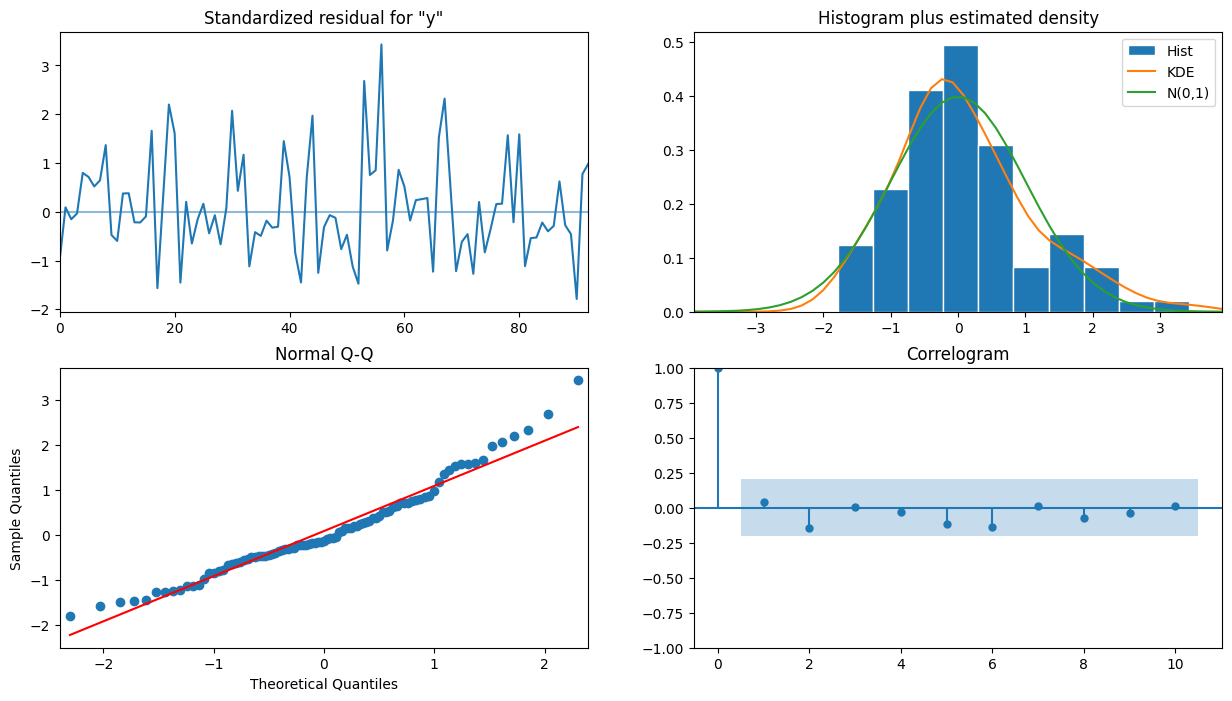

In [138]:
##
## disagnostics plot

#plt.figure(figsize = (15, 8))
results_auto_sarima.plot_diagnostics(figsize = (15, 8))
plt.show()

In [139]:
##
##

predicted_auto_sarima = results_auto_sarima.get_forecast(steps = len(spark1_test['Sparkling']))


In [140]:
##
##

predicted_auto_sarima.summary_frame(alpha = 0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  2171.410967  571.731385    1050.838043    3291.983891
1  1696.187982  596.324713     527.413021    2864.962944
2  2064.195556  600.704153     886.837050    3241.554062
3  1814.963637  601.342949     636.353115    2993.574159
4  2022.747908  601.440847     843.945509    3201.550308

In [141]:
##
##

rmse = mean_squared_error(spark1_test['Sparkling'], predicted_auto_sarima.predicted_mean, squared = False)
print(rmse)


1072.7453302416623


In [142]:
##
## Now lets add the values to the results dataframe that we have setup

sarima_temp = pd.DataFrame({'Root Mean Square Error': [rmse],
                           'Model': 'SARIMA_with_p_1_d_1_q_1_seasonality_(0, 0, 3, 12)'})

Results = pd.concat([Results, sarima_temp])


In [143]:
##
##

Results.head(30)


## there is a difference when we use SARIMA over ARIMA, but still exponential smoothing has taken the crowm this time.


Model  Root Mean Square Error
0                                  Linear Regression             1389.135000
0                Moving_Average_Trailing_by_2_points              813.401000
1                Moving_Average_Trailing_by_4_points             1156.590000
2                Moving_Average_Trailing_by_6_points             1283.927000
3                Moving_Average_Trailing_by_9_points             1346.278000
4               Moving_Average_Trailing_by_12_points             1267.925000
5               Moving_Average_Trailing_by_15_points             1173.813000
0            Simple_Exponentail_Smoothing_Alpha_0.03             1304.927000
0             Simple_Exponentail_Smoothing_Alpha_0.3             1935.507000
0  Double_Exponentail_Smoothing_Alpha_0.68_Beta_9...             2007.239000
0    Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3            18259.111000
0  Triple_Exponentail_Smoothing_Alpha_0.11_Beta_0...              403.706000
0  Triple_Exponential_Smoothing_Alpha_0.3_Beta_0....              361.397000
0                                        Naive_Model             3864.279000
0                             ARIMA_with_p_2_d_1_q_2             1299.979749
0  SARIMA_with_p_1_d_1_q_1_seasonality_(0, 0, 3, 12)             1072.745330

In [147]:
##
##


print(Results.sort_values(by = 'Root Mean Square Error', ascending = True))


                                               Model  Root Mean Square Error
0  Triple_Exponential_Smoothing_Alpha_0.3_Beta_0....              361.397000
0  Triple_Exponentail_Smoothing_Alpha_0.11_Beta_0...              403.706000
0                Moving_Average_Trailing_by_2_points              813.401000
0  SARIMA_with_p_1_d_1_q_1_seasonality_(0, 0, 3, 12)             1072.745330
1                Moving_Average_Trailing_by_4_points             1156.590000
5               Moving_Average_Trailing_by_15_points             1173.813000
4               Moving_Average_Trailing_by_12_points             1267.925000
2                Moving_Average_Trailing_by_6_points             1283.927000
0                             ARIMA_with_p_2_d_1_q_2             1299.979749
0            Simple_Exponentail_Smoothing_Alpha_0.03             1304.927000
3                Moving_Average_Trailing_by_9_points             1346.278000
0                                  Linear Regression             1389.135000

## 7) Model summary

In [151]:
##
##

## Set the display options to overcome cell truncation
pd.set_option('display.max_colwidth', 200)  # or you can use a large number instead of None
pd.set_option('display.max_columns', None)  # To show all columns if you have more


Results.sort_values(by = 'Root Mean Square Error', ascending = True)

Model  \
0     Triple_Exponential_Smoothing_Alpha_0.3_Beta_0.3_Gamma_0.3   
0  Triple_Exponentail_Smoothing_Alpha_0.11_Beta_0.04_Gamma_0.36   
0                           Moving_Average_Trailing_by_2_points   
0             SARIMA_with_p_1_d_1_q_1_seasonality_(0, 0, 3, 12)   
1                           Moving_Average_Trailing_by_4_points   
5                          Moving_Average_Trailing_by_15_points   
4                          Moving_Average_Trailing_by_12_points   
2                           Moving_Average_Trailing_by_6_points   
0                                        ARIMA_with_p_2_d_1_q_2   
0                       Simple_Exponentail_Smoothing_Alpha_0.03   
3                           Moving_Average_Trailing_by_9_points   
0                                             Linear Regression   
0                        Simple_Exponentail_Smoothing_Alpha_0.3   
0         Double_Exponentail_Smoothing_Alpha_0.68_Beta_9.99e-05   
0                                                   Naive_Model   
0               Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3   

   Root Mean Square Error  
0              361.397000  
0              403.706000  
0              813.401000  
0             1072.745330  
1             1156.590000  
5             1173.813000  
4             1267.925000  
2             1283.927000  
0             1299.979749  
0             1304.927000  
3             1346.278000  
0             1389.135000  
0             1935.507000  
0             2007.239000  
0             3864.279000  
0            18259.111000

## 8) Forecating 17 months into the future on the highest rated model

In [164]:
##
## The best rated model for us was Triple exponential smoothing with alpha, beta and gamma all as 0.3

## Instantiate and Fit the model
model = ExponentialSmoothing(spark1['Sparkling'],
                                 trend = 'additive',
                                 seasonal = 'multiplicative',
                                 freq = 'MS',
                                 seasonal_periods = 12).fit(smoothing_level = 0.3,
                                                            smoothing_trend = 0.3,
                                                            smoothing_seasonal = 0.3)

## Forecast 17 months ahead
forecast = model.forecast(steps = 17)




In [174]:
##
##

forecast


1995-08-01    1855.825254
1995-09-01    2487.392425
1995-10-01    3323.826473
1995-11-01    4225.778223
1995-12-01    6828.439792
1996-01-01    1584.373605
1996-02-01    2060.523030
1996-03-01    2416.983167
1996-04-01    2389.425277
1996-05-01    2156.979109
1996-06-01    2036.459036
1996-07-01    2423.757719
1996-08-01    2345.249907
1996-09-01    3129.269649
1996-10-01    4163.490947
1996-11-01    5271.283969
1996-12-01    8483.745251
Freq: MS, dtype: float64

In [167]:
##
## Calculate the standard deviation of the residuals

residuals_std = model.resid.std()
residuals_std

423.0875873631783

In [168]:
##
## Define the confidence level

from scipy.stats import norm


confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)

print(z_score)

1.959963984540054


In [169]:
##
## Calculate the confidence intervals


interval_size = z_score * residuals_std
lower_bounds = forecast - interval_size
upper_bounds = forecast + interval_size



In [170]:
##
##

interval_size

829.2364335377731

In [171]:
##
##

lower_bounds

1995-08-01    1026.588820
1995-09-01    1658.155991
1995-10-01    2494.590039
1995-11-01    3396.541789
1995-12-01    5999.203359
1996-01-01     755.137172
1996-02-01    1231.286596
1996-03-01    1587.746734
1996-04-01    1560.188843
1996-05-01    1327.742675
1996-06-01    1207.222603
1996-07-01    1594.521285
1996-08-01    1516.013473
1996-09-01    2300.033215
1996-10-01    3334.254513
1996-11-01    4442.047536
1996-12-01    7654.508818
Freq: MS, dtype: float64

In [172]:
##
##

upper_bounds

1995-08-01    2685.061687
1995-09-01    3316.628858
1995-10-01    4153.062906
1995-11-01    5055.014656
1995-12-01    7657.676226
1996-01-01    2413.610039
1996-02-01    2889.759463
1996-03-01    3246.219601
1996-04-01    3218.661710
1996-05-01    2986.215543
1996-06-01    2865.695470
1996-07-01    3252.994153
1996-08-01    3174.486340
1996-09-01    3958.506083
1996-10-01    4992.727380
1996-11-01    6100.520403
1996-12-01    9312.981685
Freq: MS, dtype: float64

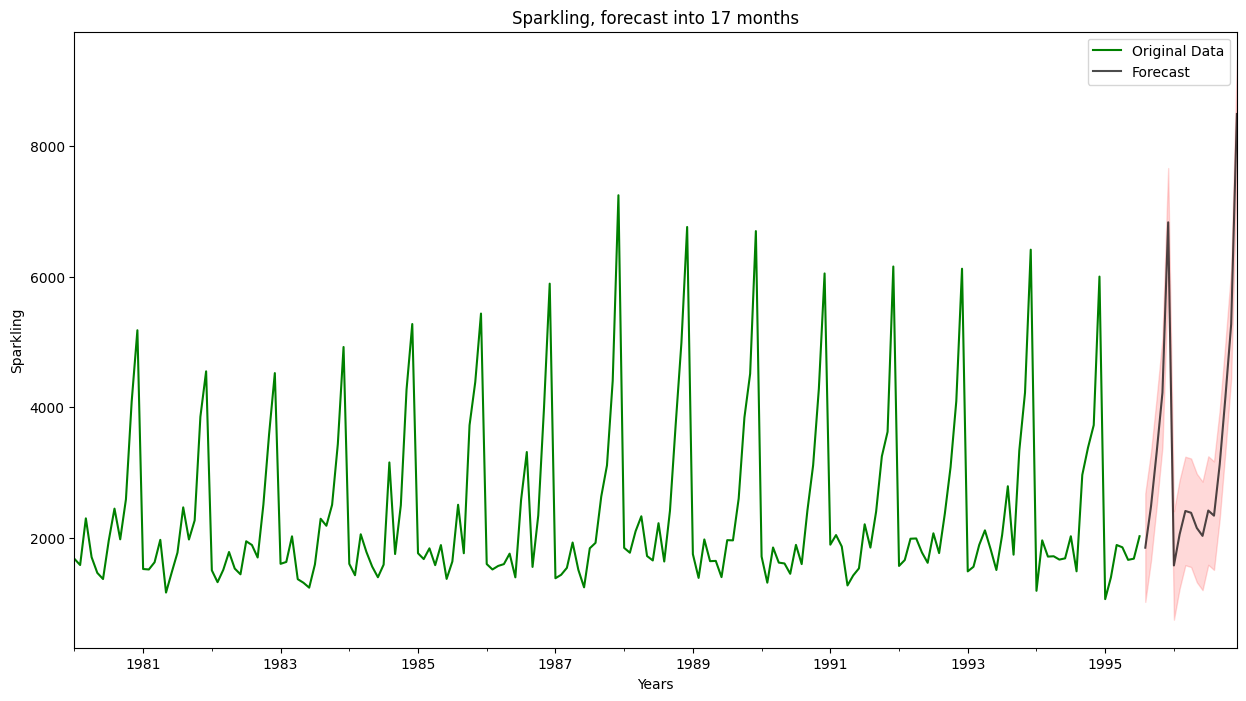

In [185]:
##
## plot the forecast along with the confidence band

plt.figure(figsize = (15, 8))
ax = spark1['Sparkling'].plot(label = 'Original Data', color = 'green', title = 'Sparkling, forecast into 17 months')
forecast.plot(ax = ax, label = 'Forecast', alpha = 0.7, color = 'black')
ax.fill_between(forecast.index,
                  lower_bounds,
                  upper_bounds,
                  color = 'red',
                  alpha = 0.15)


ax.set_xlabel('Years')
ax.set_ylabel('Sparkling')
plt.legend(loc = 'best')
plt.show()